In [2]:
import pandas as pd
import numpy as np
import re

# PREMIERS EXEMPLES DANS LE COURS DE DATA CLEANING

In [3]:
###Chargement des fichers
data = pd.read_csv('personnes.csv')
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  Côte d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5             24  3.45m  
6          Bénin  1.45m  


De façon générale, on évitera d'utiliser la fonction  print()  sur un dataframe. Ici, n'ayant que 7 lignes, cela n'est pas du tout problématique. Mais avec des fichiers de plusieurs milliers, voire millions de lignes, vous admettrez que regarder l'ensemble des lignes n'est pas très pertinent. On préférera dans ce cas utiliser les méthodes  .head()  ou  .tail()  des dataframes qui permettent de voir les 5 premières ou dernières lignes d'un dataframe.

In [4]:
## Nombre de valeurs manquantes par variable
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [5]:
## Recherche de doublons dans le JDD , 'email' pour chercher en fonction des mails'
data.loc[data['email'].duplicated(keep=False),:]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


## Traiter les doublons

Cette ligne de code sélectionne toutes les lignes d'un DataFrame `data` dont la colonne 'email' contient des valeurs dupliquées. Voici une explication détaillée :

1. `data['email'].duplicated(keep=False)` : Cette partie du code crée une série booléenne de la même longueur que le DataFrame `data`. Pour chaque ligne, la valeur est `True` si la valeur de la colonne 'email' est dupliquée, sinon elle est `False`. L'argument `keep=False` signifie que toutes les occurrences des doublons seront marquées comme `True`, pas seulement les secondes et suivantes (qui est le comportement par défaut de `keep='first'`).

2. `data.loc[...,:]` : La méthode `loc` est utilisée pour sélectionner des lignes et des colonnes par étiquette. Ici, `data.loc[...]` sélectionne toutes les lignes pour lesquelles l'expression entre crochets est `True`.

3. `, :` : Après la virgule, les deux-points indiquent que toutes les colonnes doivent être incluses dans la sélection.

En résumé, cette ligne de code extrait toutes les lignes du DataFrame `data` où la colonne 'email' contient des valeurs dupliquées, et renvoie toutes les colonnes pour ces lignes.

Que ce soit en Python ou en R, actualiser une colonne d'un dataframe se fait de cette manière :

"data['nom_colonne'] = nouvelle_colonne" 
Ici, on cherche à remplacer les valeurs de la colonne (ou variable)  nom_colonne. Si le dataframe a 7 lignes, alors la colonne  nom_colonne  contient 7 valeurs. Pour les remplacer,  nouvelle_colonne  doit ainsi être une liste de 7 valeurs.
Il se peut qu'à certains moments, on ne souhaite pas modifier l'entièreté de la colonne mais seulement une partie, comme l'ensemble des valeurs satisfaisant une certaine condition. Pour cela, le plus simple reste de stocker la condition dans un mask, qui pourra ensuite être utilisé :

Il se peut qu'à certains moments, on ne souhaite pas modifier l'entièreté de la colonne mais seulement une partie, comme l'ensemble des valeurs satisfaisant une certaine condition. Pour cela, le plus simple reste de stocker la condition dans un mask, qui pourra ensuite être utilisé 

mask = # condition à vérifier pour cibler spécifiquement certaines lignes // 
-data.loc[mask, 'ma_colonne'] = nouvelles_valeurs

Dans l'exemple ci-dessus, on a stocké une condition dans la variable  mask(comme par exemple :  data['email'].duplicated(keep=False)  pour reprendre l'exemple ci-dessus). ma_colonne  correspond forcément à une colonne existante, et seules les lignes satisfaisant la condition stockée dans mask au sein de cette colonne verront leurs valeurs modifiées. Naturellement et comme précédemment, si votre condition ne concerne que 4 valeurs, il faudra également que  nouvelles_valeurs  soit une liste de 4 valeurs.

## Traitez les pays
Pour les pays, nous avions un problème majeur qui était la valeur 24
 , à la 5e ligne. La première approche pourrait être de considérer que l'ensemble de mes pays doivent être des chaînes de caractères, et donc que toutes les valeurs numériques doivent être remplacées par des valeurs manquantes. Mais pour faire la chose encore plus "proprement", on pourrait définir une liste de pays valides, et remplacer toutes les valeurs qui ne concordent pas avec la liste par des valeurs manquantes :

In [6]:
VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne' , 'USA']
mask = ~data['pays'].isin(VALID_COUNTRIES)
data.loc[mask, 'pays'] = np.nan

Ici, ma condition utilisant  .isin()  renvoie True si la valeur est dans la liste passée en paramètre (donc ici  VALID_COUNTRIES  ), False sinon : ainsi, le  .loc()  permet de ne sélectionner que les lignes dont le pays est dans la liste définie.
Oui mais attends... ce n'était pas l'inverse que nous voulions faire ? >_<
Tout à fait ! Et tout se joue dans le petit symbole  ~  placé en amont de la condition. Ce dernier permet de prendre l'exact inverse de la condition, donc ici, l'ensemble des lignes dont le pays n'est pas dans la liste définie. On remplace ensuite l'ensemble des valeurs de pays de ces lignes par np.nan  , qui est la valeur utilisée par les librairies  Numpy  et  Pandas  pour spécifier qu'une valeur est inconnue. C'est en quelque sorte un équivalent de  None  .

Ce code effectue une vérification et un nettoyage des données dans une colonne `pays` d'un DataFrame `data` en suivant ces étapes :

1. **Définition de la liste des pays valides** :
    ```python
    VALID_COUNTRIES = ['France', 'Côte d\'ivoire', 'Madagascar', 'Bénin', 'Allemagne' , 'USA']
    ```
    Cette ligne crée une liste appelée `VALID_COUNTRIES` contenant les noms de pays considérés comme valides.

2. **Création d'un masque pour les pays non valides** :
    ```python
    mask = ~data['pays'].isin(VALID_COUNTRIES)
    ```
    - `data['pays'].isin(VALID_COUNTRIES)` vérifie si chaque élément de la colonne `pays` se trouve dans la liste `VALID_COUNTRIES`. Le résultat est une série booléenne où chaque élément est `True` si le pays est dans la liste et `False` sinon.
    - `~` est l'opérateur de négation logique qui inverse les valeurs de la série booléenne, transformant `True` en `False` et vice versa. Donc, `mask` est une série booléenne où chaque élément est `True` si le pays n'est pas dans la liste `VALID_COUNTRIES` et `False` si le pays est dans la liste.

3. **Remplacement des pays non valides par NaN** :
    ```python
    data.loc[mask, 'pays'] = np.nan
    ```
    - `data.loc[mask, 'pays']` sélectionne toutes les lignes du DataFrame `data` où le masque `mask` est `True` (c'est-à-dire, les lignes où le pays n'est pas dans la liste `VALID_COUNTRIES`).
    - `data.loc[mask, 'pays'] = np.nan` remplace les valeurs dans la colonne `pays` de ces lignes par `NaN` (Not a Number), indiquant des valeurs manquantes ou invalides.

En résumé, ce code identifie les entrées de la colonne `pays` qui ne sont pas dans la liste `VALID_COUNTRIES` et les remplace par `NaN`. Cela permet de nettoyer les données en marquant explicitement les valeurs de pays non valides comme manquantes.

In [7]:
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  Côte d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  
5            NaN  3.45m  
6          Bénin  1.45m  


## traiter les emails

In [8]:
data['email'] = data['email'].str.split(',', n=1, expand=True)[0]

In [9]:
print(data)

   prenom                     email date_naissance           pays taille
0   Leila         leila@example.com     23/01/1990         France  1.49m
1  Samuel    samuel_329@example.com     20/09/2001            NaN  1.67m
2   Radia  choupipoune@supermail.eu  12 sept. 1984  Côte d'ivoire  153cm
3    Marc       marco23@example.com     10/02/1978         France  1.65m
4    Heri   helloworld@supermail.eu     05/03/2008     Madagascar  1.34m
5   Hanna    hanna2019@supermail.eu     01/01/1970            NaN  3.45m
6  samuël    samuel_329@example.com            NaN          Bénin  1.45m


La ligne de code `data['email'] = data['email'].str.split(',', n=1, expand=True)[0]` effectue les opérations suivantes :

1. **`data['email'].str.split(',', n=1, expand=True)`** : Cette partie du code prend la colonne 'email' du DataFrame `data` et divise chaque chaîne de caractères de cette colonne au premier (et uniquement au premier) caractère de virgule `,`. 
    - `n=1` spécifie que la division doit se faire une seule fois (au premier caractère de virgule).
    - `expand=True` signifie que le résultat sera un DataFrame avec autant de colonnes qu'il y a de segments dans chaque chaîne après la division.

2. **`[0]`** : Après la division, nous obtenons un DataFrame avec plusieurs colonnes (dans ce cas, deux colonnes puisque nous divisons une seule fois). Le `[0]` sélectionne la première colonne de ce DataFrame résultant.

En résumé, cette ligne de code remplace la colonne 'email' dans `data` par la première partie de chaque chaîne de la colonne originale, jusqu'à la première virgule. Par exemple, si une cellule dans la colonne 'email' contient "john.doe@example.com, secondary@example.com", après cette opération, elle contiendra seulement "john.doe@example.com".
L'attribut `.str` dans pandas est utilisé pour accéder aux fonctions de manipulation de chaînes de caractères disponibles pour les séries contenant des chaînes de caractères. Voici ce que fait `.str` dans différents contextes :

1. **Accéder aux méthodes de chaîne de caractères** : `.str` permet d'appliquer des méthodes de chaîne de caractères à chaque élément d'une série pandas. Par exemple :
   - `data['column_name'].str.lower()` convertit chaque chaîne de la colonne 'column_name' en minuscules.
   - `data['column_name'].str.upper()` convertit chaque chaîne de la colonne 'column_name' en majuscules.
   - `data['column_name'].str.strip()` supprime les espaces blancs au début et à la fin de chaque chaîne de la colonne 'column_name'.

2. **Manipuler des chaînes** : `.str` permet des manipulations plus complexes comme la division, le remplacement, l'extraction de sous-chaînes, etc.
   - `data['column_name'].str.split(',')` divise chaque chaîne de la colonne 'column_name' au caractère virgule et retourne une liste de segments.
   - `data['column_name'].str.replace('old', 'new')` remplace toutes les occurrences de 'old' par 'new' dans chaque chaîne de la colonne 'column_name'.
   - `data['column_name'].str.contains('pattern')` renvoie une série booléenne indiquant si chaque chaîne de la colonne 'column_name' contient le motif spécifié.

3. **Accéder aux éléments** : Vous pouvez utiliser `.str` pour accéder à des parties spécifiques des chaînes de caractères.
   - `data['column_name'].str[0]` accède au premier caractère de chaque chaîne dans la colonne 'column_name'.
   - `data['column_name'].str[-1]` accède au dernier caractère de chaque chaîne dans la colonne 'column_name'.

En résumé, `.str` est un moyen pratique d'appliquer des opérations de chaînes de caractères à chaque élément d'une série pandas contenant des chaînes. Dans votre cas, `data['email'].str.split(',', n=1, expand=True)` utilise `.str` pour diviser chaque chaîne de la colonne 'email' en deux parties autour de la première virgule, et `[0]` sélectionne la première partie de chaque division.

Vous trouverez des choses similaires si vous souhaitez accéder aux méthodes de datetime, via le .dt

## Traiter les tailles

Nous aurons besoin d'effectuer deux opérations :

Convertir les tailles en nombres décimaux. Nous en profiterons pour remplacer l'ensemble des tailles non conformes par des valeurs manquantes.

Remplacer les valeurs manquantes par la moyenne de notre échantillon.

Pour la première étape, comme l'ensemble de nos valeurs sont censées avoir pour format X.XXm (avec X correspondant à un chiffre), on peut par exemple supprimer le dernier caractère de la colonne et convertir l'ensemble de la colonne en numérique. Ce faisant, les valeurs non valides seront automatiquement remplacées par des valeurs manquantes, via l'argument  errors  que nous spécifions :

In [10]:
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')

Ce code modifie la colonne `taille` d'un DataFrame `data` en suivant ces étapes :

1. **Suppression du dernier caractère de chaque chaîne de caractères dans la colonne `taille`** :
    ```python
    data['taille'] = data['taille'].str[:-1]
    ```
    - `data['taille'].str[:-1]` utilise l'attribut `.str` pour appliquer une opération de découpe de chaîne sur chaque élément de la colonne `taille`.
    - `[:-1]` signifie "tout sauf le dernier caractère" pour chaque chaîne. Cela élimine le dernier caractère de chaque chaîne de la colonne `taille`.
    - Par exemple, si un élément de `data['taille']` est "170cm", après cette opération, il deviendra "170c".

2. **Conversion de la colonne `taille` en valeurs numériques** :
    ```python
    data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
    ```
    - `pd.to_numeric(data['taille'], errors='coerce')` tente de convertir chaque élément de la colonne `taille` en un nombre.
    - `errors='coerce'` signifie que si la conversion échoue pour un élément (par exemple, si l'élément ne peut pas être interprété comme un nombre), cet élément sera remplacé par `NaN` (Not a Number).

En résumé, ce code supprime le dernier caractère de chaque chaîne de la colonne `taille` (probablement pour enlever des unités comme "cm") et ensuite convertit les valeurs résultantes en nombres, en remplaçant les valeurs non convertibles par `NaN`. Cela est utile pour transformer une colonne de chaînes de caractères représentant des tailles (avec unités) en une colonne de valeurs numériques exploitables pour des calculs.

In [11]:
print(data)

   prenom                     email date_naissance           pays  taille
0   Leila         leila@example.com     23/01/1990         France    1.49
1  Samuel    samuel_329@example.com     20/09/2001            NaN    1.67
2   Radia  choupipoune@supermail.eu  12 sept. 1984  Côte d'ivoire     NaN
3    Marc       marco23@example.com     10/02/1978         France    1.65
4    Heri   helloworld@supermail.eu     05/03/2008     Madagascar    1.34
5   Hanna    hanna2019@supermail.eu     01/01/1970            NaN    3.45
6  samuël    samuel_329@example.com            NaN          Bénin    1.45


La ligne `data['taille'] = pd.to_numeric(data['taille'], errors='coerce')` ne supprime pas les caractères "cm" mais convertit les chaînes de caractères en valeurs numériques, en remplaçant les chaînes non convertibles par `NaN`. Pour que les caractères "cm" disparaissent, ils doivent avoir été supprimés avant cette conversion. Voici un déroulement précis de ce qui se passe :

### Code initial

```python
data['taille'] = data['taille'].str[:-1]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
```

1. **Suppression du dernier caractère** :
   ```python
   data['taille'] = data['taille'].str[:-1]
   ```
   - Cela coupe le dernier caractère de chaque chaîne dans la colonne `taille`. Par exemple, "170cm" devient "170c".

2. **Conversion en numérique** :
   ```python
   data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
   ```
   - Cette ligne tente de convertir les chaînes résultantes ("170c") en nombres.
   - "170c" ne peut pas être converti en nombre, donc `errors='coerce'` remplace ces valeurs par `NaN`.

### Explication du comportement observé

Vous voyez que "cm" a disparu car après la première ligne, le dernier caractère "m" est supprimé, laissant des chaînes telles que "170c". La seconde ligne essaie de convertir ces valeurs en nombres, et comme "170c" n'est pas convertible, il est remplacé par `NaN`. 

### Correction pour supprimer "cm"

Pour supprimer "cm" et non seulement "m", utilisez `[:-2]` :

```python
data['taille'] = data['taille'].str[:-2]
data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
```

Avec cette correction :
1. **Suppression des deux derniers caractères** :
   ```python
   data['taille'] = data['taille'].str[:-2]
   ```
   - "170cm" devient "170".

2. **Conversion en numérique** :
   ```python
   data['taille'] = pd.to_numeric(data['taille'], errors='coerce')
   ```
   - "170" est directement convertible en nombre sans aucune erreur.

### Résumé

- Utiliser `[:-1]` coupe seulement le dernier caractère, ce qui laisse encore des chaînes non convertibles (par exemple, "170c").
- Utiliser `[:-2]` coupe les deux derniers caractères, en supprimant effectivement "cm" et laissant des chaînes convertibles en nombres (par exemple, "170").

Pour résoudre votre problème et correctement supprimer "cm", assurez-vous d'utiliser `[:-2]` avant la conversion en valeurs numériques.

## Outliers
Utiliser le z-score pour repérer les valeurs aberrantes (outliers) dans un jeu de données est une méthode statistique courante. Le z-score mesure le nombre d'écarts-types qu'une donnée est éloignée de la moyenne. Voici un guide étape par étape pour identifier les valeurs aberrantes à l'aide du z-score en utilisant Python et pandas :

### Étapes

1. **Importer les bibliothèques nécessaires** :
    ```python
    import pandas as pd
    import numpy as np
    from scipy import stats
    ```

2. **Charger les données dans un DataFrame** :
    ```python
    # Exemple de chargement de données
    data = pd.read_csv('votre_fichier.csv')
    ```

3. **Calculer le z-score pour chaque valeur d'une colonne spécifique** :
    Supposons que vous souhaitez identifier les valeurs aberrantes dans une colonne nommée `colonne_interet` :
    ```python
    data['z_score'] = np.abs(stats.zscore(data['colonne_interet']))
    ```

4. **Définir un seuil pour le z-score** :
    Un seuil communément utilisé est 3.0. Les valeurs ayant un z-score supérieur à ce seuil peuvent être considérées comme des valeurs aberrantes.
    ```python
    seuil = 3.0
    ```

5. **Filtrer les valeurs aberrantes** :
    ```python
    valeurs_aberrantes = data[data['z_score'] > seuil]
    ```

6. **Supprimer ou traiter les valeurs aberrantes** :
    Si vous souhaitez supprimer les valeurs aberrantes du DataFrame original :
    ```python
    data_sans_aberrantes = data[data['z_score'] <= seuil]
    ```

### Exemple complet

Voici un exemple complet du processus :

```python
import pandas as pd
import numpy as np
from scipy import stats

# Chargement des données
data = pd.read_csv('votre_fichier.csv')

# Calcul du z-score
data['z_score'] = np.abs(stats.zscore(data['colonne_interet']))

# Définir le seuil pour les valeurs aberrantes
seuil = 3.0

# Filtrer les valeurs aberrantes
valeurs_aberrantes = data[data['z_score'] > seuil]

# Afficher les valeurs aberrantes
print(valeurs_aberrantes)

# Optionnel: Supprimer les valeurs aberrantes
data_sans_aberrantes = data[data['z_score'] <= seuil]

# Afficher le DataFrame sans les valeurs aberrantes
print(data_sans_aberrantes)
```

### Notes

- **np.abs** : Utilisé pour obtenir la valeur absolue du z-score, car nous nous intéressons à la distance par rapport à la moyenne, que ce soit en dessous ou au-dessus de celle-ci.
- **stats.zscore** : Calcule le z-score pour une colonne spécifique. Il est possible de l'appliquer à plusieurs colonnes si nécessaire.

En utilisant le z-score de cette manière, vous pouvez facilement repérer et traiter les valeurs aberrantes dans votre jeu de données, ce qui peut aider à améliorer la qualité de vos analyses statistiques et de vos modèles prédictifs.

Pour les valeurs extrêmes, des méthodes comme celles de l'écart interquartile ou du Z-score permettent assez facilement de mettre en valeur des outliers

Recettes Z Score

La recette du Z Score : Un exemple

Voici l’équation essentielle du score z pour un exemple :

z = (x – μ)/σ

Par exemple, supposons que vous ayez un score de 190 à un test. Le test a une moyenne (μ) de 150 et un écart-type (σ) de 25. Dans l’attente d’un transport typique, votre score z serait de

z = (x – μ)/σ

= 190 – 150/25 = 1.6.

Le score z vous indique le nombre d’écarts types par rapport à la moyenne de votre score. Dans ce modèle, votre score est de 1,6 écart-type par rapport à la moyenne.

échanger le z-score, vous pouvez également observer l’équation du z-score apparue d’un côté. C’est la même recette que z = x – μ/σ, mais là encore, on utilise en fait x̄ (la moyenne de l’exemple) plutôt que μ (la moyenne de la population) et s (l’écart type de l’exemple) plutôt que σ (l’écart type de la population). Néanmoins, les moyens pour l’expliquer sont en fait équivalents.

Équation de score Z : Erreur type de la moyenne

Au moment où vous avez de nombreux exemples et où vous avez besoin de décrire l’écart type de ces exemples (la bévue standard), vous utiliserez cette équation du score z :

z = (x – μ)/(σ/√n)

Ce z-score vous révélera le nombre de bévues standard entre la moyenne de l’exemple et la moyenne de la population.

Question test : en règle générale, la stature moyenne des femmes est 65″ avec un écart type de 3,5″. Quelle est la probabilité de trouver un exemple irrégulier de 50 femmes ayant une taille moyenne de 70″, en acceptant que les statures soient normalement transmises ?

z = (x – μ)/(σ/√n)

= (70 – 65)/(3.5/√50) = 5/0.495 = 10.1

**Les scores z**

*Une distribution centrée réduite*

Les scores z sont un type de scores standards, c’est-à-dire de scores dont la moyenne et l'écart-type de la distribution sont conventionnels et connus de ceux qui les utilisent, ce qui facilite l’interprétation de ces scores. Parmi les scores standards les plus connus, on trouve donc les scores z ($\mu = 0$, $\sigma = 1$), les scores T ($\mu = 50$, $\sigma = 10$), les QI ($\mu = 100$, $\sigma = 15$)\footnote{En statistique, on désigne par des lettres grecques les paramètres des populations et par des lettres latines les statistiques des échantillons pour bien les distinguer. Pour la population, on note la moyenne « $\mu$ » et l’écart-type « $\sigma$ ». Pour les échantillons issus de cette population, on note les moyennes « $m$ » et les écart-types « $s$ ». Ainsi, la distribution des scores z dans la population a une moyenne $\mu$ et un écart-type $\sigma$.}. Il est possible de transformer n’importe quelle distribution de notes en scores z en appliquant la formule (1) ci-dessous où $x$ est la note brute d’une personne, $m_x$ la moyenne de la distribution des notes et $s_x$, l’écart-type de la distribution des notes\footnote{Ici, nous utilisons les notations « $m$ » et « $s$ » puisqu’en pratique, nous connaissons rarement la moyenne et l’écart-type de notre population d’intérêt. À défaut, nous utilisons la moyenne et l’écart-type de l’échantillon ayant servi à étalonner / normer le test. Les notations « SD » (pour l’anglais Standard Deviation) et « ET » (pour Ecart-Type) sont à éviter (« ET » étant employé pour désigner l’erreur-type), de même que l’anglicisme « deviation standard » pour désigner les écart-types.}\textsuperscript{3} :

\[
z = \frac{x - m_x}{s_x} \tag{1}
\]

Cette simple opération arithmétique aura pour effet de centrer la moyenne de la distribution sur 0 et de réduire l’écart-type sur 1, quelle que soit la forme de la distribution originelle des notes. On obtient ainsi une distribution des scores dite « centrée réduite » où chaque score z exprime directement la « distance » du patient à la moyenne en nombre d’écart-types. Un patient ayant un score z = +2 a une performance se situant au-dessus de la moyenne et plus précisément, une performance deux fois supérieure à la variation moyenne autour de la moyenne dans sa population de référence. Cependant, il est très important de noter que connaître la distance d’un individu à sa moyenne en nombre d’écart-types (que cette information soit « brute » ou standardisée) n’apporte aucune information sur la rareté ou la fréquence de son score si on ignore quelle est la forme de la distribution de fréquence des scores dans la population de référence. Si on regarde la distribution des scores z de la figure 2, on constate qu’avoir un score à -1,8 écart-types de la moyenne ($z = -1,8$) est plus fréquent qu’avoir un score $z = -1,2$ ou $z = 1,5$ écart-type de la moyenne.


## Exemple
Maintenant que nous avons pu voir tout ces rappels théoriques nous allons néttoyer un jeu de donnée qui comporte des oprération bancaires

In [12]:
### import des bibliothèques dont nous avons besoin :
import pandas as pd
import numpy as np
from scipy import stats


In [13]:
#Pour préserver notre jeu de données original nous allons copier le jeu de donnée avant de travailler dessus 
data1=pd.read_csv('operations.csv')
data=data1.copy()
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   



Il est à présent temps de mettre en pratique tout ce que nous avons vu sur notre jeu de données de transactions bancaires. Plusieurs **erreurs** se sont glissées dans ce jeu de données. Votre mission, si toutefois vous l'acceptez, va être de les **trouver** et de **proposer des solutions** adéquates pour les gérer.

### 1. Erreurs de type

Le premier reflexe devrait être de vérifier que les variables ont bien été importées dans le bon type :

In [14]:
data.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

La seule chose qui semble être problématique est la variable date qui n'est pas considérée comme une date. On peut corriger cela facilement via la fonction `to_datetime` de pandas :

In [15]:
data['date_operation'] = pd.to_datetime(data['date_operation'])
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

### Valeurs manquantes

In [16]:
## Nombre de valeurs manquantes par variable
print(data.isnull().sum())

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64


Il y a deux classes vides dans la colonne montant que nous pouvons retrouver par déduction avec la colonne solde avant opération.
Nous pouvons également remplir la catégorie vide par la valeur carte .Nous chargerons donc le nouveau jeu de donnée dans la variable data.

In [17]:
# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data.loc[data['montant'].isnull(),:]


# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant à partir des soldes précédents et actuels
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']

Cette ligne de code effectue une opération de filtrage sur un DataFrame `data` en utilisant pandas, en sélectionnant uniquement les lignes où la valeur dans la colonne 'montant' est nulle (`NaN` ou `None`). Voici ce que fait chaque partie de la ligne de code :

1. `data['montant'].isnull()` : Cette partie crée un masque booléen qui indique True pour chaque ligne où la valeur dans la colonne 'montant' est nulle (NaN).

2. `data.loc[]` : C'est une méthode pour accéder à un groupe de lignes et de colonnes par étiquettes ou un masque booléen.

3. `data.loc[data['montant'].isnull(), :]` : Cela filtre le DataFrame `data` pour inclure uniquement les lignes où le masque `data['montant'].isnull()` est True. Le deuxième argument, `:`, spécifie que toutes les colonnes doivent être incluses dans le résultat.

### Exemple illustratif :

Supposons que vous avez un DataFrame `data` comme ceci :

```python
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'client': ['A', 'B', 'C', 'D'],
    'montant': [100, np.nan, 150, np.nan],
    'produit': ['X', 'Y', 'Z', 'X']
})

# Affichage du DataFrame initial
print("DataFrame initial :")
print(data)

# Filtrer les lignes où 'montant' est nul
data_na = data.loc[data['montant'].isnull(), :]

# Affichage des lignes où 'montant' est nul
print("\nLignes où 'montant' est nul :")
print(data_na)
```

### Résultat :

```plaintext
DataFrame initial :
  client  montant produit
0      A    100.0       X
1      B      NaN       Y
2      C    150.0       Z
3      D      NaN       X

Lignes où 'montant' est nul :
  client  montant produit
1      B      NaN       Y
3      D      NaN       X
```

Dans cet exemple :

- `data['montant'].isnull()` crée un masque booléen `[False, True, False, True]` pour les lignes où le 'montant' est nul.
- `data.loc[data['montant'].isnull(), :]` sélectionne les lignes où ce masque est True, c'est-à-dire les lignes 1 et 3 où 'montant' est nul.

Ainsi, `data_na` contiendra un sous-ensemble de `data` contenant uniquement les lignes où le montant est manquant (NaN).

On peut voir que nous n'avons plus de valeurs manquantes.On peut maintenant rechercher les doublons dans divers catégories on peut essater dans les soldes avant opération car il est peu probable que l'on retrouve deux soldes différents exacts

In [18]:
print(data.isnull().sum())

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             1
dtype: int64


Observons la catégorie contenant un élément manquant 

In [19]:
data.loc[data['categ'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN


On observe toutes les opérations dont le libelle est similaire 

In [20]:
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


On peut donc par conséquent déduire qu'il s'agit d'une dépense de téléphone 

In [21]:
data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'
print(data.isnull().sum())

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             0
dtype: int64


### Duplicats

In [22]:
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


On va par conséquent supprimer la ligne 43

In [23]:
data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True)
data = data.reset_index(drop=True)
data.loc[data[['date_operation', 'libelle', 'montant', 'solde_avt_ope']].duplicated(keep=False),:]

,date_operation,libelle,montant,solde_avt_ope,categ


Pour supprimer une colonne spécifique dans un DataFrame pandas en Python, vous pouvez utiliser la méthode `.drop()` avec l'argument `axis=1`. Voici comment faire :

### Exemple :

Supposons que vous avez un DataFrame `data` comme celui-ci :

```python
import pandas as pd

# Exemple de DataFrame
data = pd.DataFrame({
    'Nom': ['Alice', 'Bob', 'Charlie', 'David'],
    'Âge': [25, 30, 35, 40],
    'Ville': ['Paris', 'New York', 'London', 'Berlin']
})

# Afficher le DataFrame initial
print("DataFrame initial :")
print(data)
```

Pour supprimer la colonne 'Âge' dans ce DataFrame, vous pouvez utiliser `.drop()` comme suit :

```python
# Supprimer la colonne 'Âge'
data = data.drop('Âge', axis=1)

# Afficher le DataFrame après suppression de la colonne
print("\nDataFrame après suppression de la colonne 'Âge' :")
print(data)
```

### Explication :

1. **Utilisation de `.drop()`** :
   - `data.drop('Âge', axis=1)` supprime la colonne avec le nom 'Âge'.
   - L'argument `axis=1` spécifie que nous voulons supprimer une colonne (si vous vouliez supprimer une ligne, vous utiliseriez `axis=0`).

2. **Affectation du résultat** :
   - Nous affectons le résultat de `data.drop('Âge', axis=1)` à `data` pour mettre à jour le DataFrame avec la colonne supprimée.

3. **Affichage du résultat** :
   - Nous affichons le DataFrame avant et après la suppression de la colonne pour voir l'effet de l'opération.

### Remarques :

- Assurez-vous de spécifier le bon nom de la colonne que vous souhaitez supprimer.
- Si vous avez plusieurs colonnes à supprimer, vous pouvez fournir une liste de noms de colonnes à la méthode `.drop()`.
- Cette méthode ne modifie pas le DataFrame d'origine par défaut, à moins que vous ne réaffectiez explicitement le résultat à la variable d'origine (`data = data.drop('Âge', axis=1)` dans cet exemple).

En utilisant cette méthode, vous pouvez facilement supprimer une colonne spécifique dans un DataFrame pandas en Python, ce qui est utile pour manipuler et nettoyer vos données.

On vérifie qu'on a bien supprimé notre case

In [24]:
data.loc[data['solde_avt_ope'].duplicated(keep=False),:]

,date_operation,libelle,montant,solde_avt_ope,categ


### Outliers

On va maintenant rechercher les outliers en utilisant le zscore sur les montants d'opérations

In [25]:
data.describe()

,montant,solde_avt_ope
count,308.000000,308.000000
mean,-45.782013,3395.301071
std,872.818105,667.109412
min,-15000.000000,1416.810000
25%,-20.447500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


In [26]:
i = data.loc[data['montant']==-15000,:].index[0] # récupération de l'index de la transaction à -15000

data.iloc[i-1:i+2,:] # on regarde la transaction précédente et la suivante

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [27]:
data.loc[data['montant']==-15000.00, 'montant'] = -14.39
data.describe()

,montant,solde_avt_ope
count,308.000000,308.000000
mean,2.872565,3395.301071
std,176.089858,667.109412
min,-602.270000,1416.810000
25%,-20.047500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


## TEST
On va maintenant effectuer le test du chapitre 2 du cours sur open classroom

In [28]:
#Pour préserver notre jeu de données original nous allons copier le jeu de donnée avant de travailler dessus 
d1=pd.read_csv('course+-+Quiz+P2-V2.csv',sep=';')
d=d1.copy()
print(d)

     Position Sexe     Temps  Dept Temps_secondes   Age
0           1    M  00:32:23    76           1943  40.0
1           2    M  00:32:40    27           1960  34.0
2           3    M  00:33:15    76           1995  44.0
3           4    M  00:33:23    76           2003  46.0
4           5    M  00:33:29    76           2009  26.0
5           6    M  00:33:34    76           2014  22.0
6           7    M  00:33:39    76           2019  34.0
7           8    M  00:33:41    27           2021  37.0
8           9    M  00:33:44    76           2024  25.0
9          10    M  00:34:16    76           2056  48.0
10         11    M  00:34:20    14           2060  30.0
11         12    M  00:34:23    76           2063  22.0
12         13    M  00:34:29    76           2069  35.0
13         14    M  00:34:30    76           2070  29.0
14         15    M  00:34:45    76           2085  32.0
15         16    M  00:35:05    76           2105  30.0
16         17    M  00:35:12    27           211

Ici il est utile de spécifier que le séparateur est ';' dans l'importation afin que pandas formate correctement le fichier et tienne compte des colonnes .

In [29]:
d.dtypes

Position            int64
Sexe               object
Temps              object
Dept                int64
Temps_secondes     object
Age               float64
dtype: object

In [30]:
print(d.head())


   Position Sexe     Temps  Dept Temps_secondes   Age
0         1    M  00:32:23    76           1943  40.0
1         2    M  00:32:40    27           1960  34.0
2         3    M  00:33:15    76           1995  44.0
3         4    M  00:33:23    76           2003  46.0
4         5    M  00:33:29    76           2009  26.0


In [31]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
Position          340 non-null int64
Sexe              338 non-null object
Temps             340 non-null object
Dept              340 non-null int64
Temps_secondes    340 non-null object
Age               336 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 16.0+ KB
None


In [32]:
print(d.columns)

Index(['Position', 'Sexe', 'Temps', 'Dept', 'Temps_secondes', 'Age'], dtype='object')


## Formatage des colones pour que le nom des colones soit bien propre on enleve les espaces dans les titres de colones et on remplace tout espace par _

In [33]:
d.columns = d.columns.str.strip()  # Supprime les espaces de début et de fin
d.columns = d.columns.str.replace(' ', '_')  # Remplace les espaces par des underscores (optionnel)


## modification du format de la colone

In [34]:
d['Age'] = pd.to_numeric(d['Age'], errors='coerce')
d['Temps'] = pd.to_timedelta(d['Temps'], errors='coerce')
d['Age'] = pd.to_numeric(d['Age'], errors='coerce')
d['Temps_secondes'] = pd.to_numeric(d['Temps_secondes'], errors='coerce')

In [35]:
print(d.isnull().sum())

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    1
Age               4
dtype: int64


In [36]:
d_na = d.loc[d['Temps_secondes'].isnull(),:]
d_na

,Position,Sexe,Temps,Dept,Temps_secondes,Age
250,251,M,00:54:47,27,NaN,42.0


In [37]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 6 columns):
Position          340 non-null int64
Sexe              338 non-null object
Temps             340 non-null timedelta64[ns]
Dept              340 non-null int64
Temps_secondes    339 non-null float64
Age               336 non-null float64
dtypes: float64(2), int64(2), object(1), timedelta64[ns](1)
memory usage: 16.0+ KB
None


In [38]:
d.describe()

,Position,Temps,Dept,Temps_secondes,Age
count,340.000000,340,340.000000,339.000000,336.000000
mean,177.061765,0 days 00:49:13.123529,56.991176,2952.138643,42.145833
std,166.584054,0 days 00:08:34.526264,25.059279,514.965773,13.963690
min,-100.000000,0 days 00:32:23,14.000000,1943.000000,18.000000
25%,85.750000,0 days 00:43:20.500000,27.000000,2600.000000,34.000000
50%,170.500000,0 days 00:48:56.500000,76.000000,2936.000000,41.500000
75%,255.250000,0 days 00:55:06.500000,76.000000,3307.000000,49.250000
max,2640.000000,0 days 01:10:31,78.000000,4231.000000,174.000000


In [39]:
print(d)

     Position Sexe    Temps  Dept  Temps_secondes   Age
0           1    M 00:32:23    76          1943.0  40.0
1           2    M 00:32:40    27          1960.0  34.0
2           3    M 00:33:15    76          1995.0  44.0
3           4    M 00:33:23    76          2003.0  46.0
4           5    M 00:33:29    76          2009.0  26.0
5           6    M 00:33:34    76          2014.0  22.0
6           7    M 00:33:39    76          2019.0  34.0
7           8    M 00:33:41    27          2021.0  37.0
8           9    M 00:33:44    76          2024.0  25.0
9          10    M 00:34:16    76          2056.0  48.0
10         11    M 00:34:20    14          2060.0  30.0
11         12    M 00:34:23    76          2063.0  22.0
12         13    M 00:34:29    76          2069.0  35.0
13         14    M 00:34:30    76          2070.0  29.0
14         15    M 00:34:45    76          2085.0  32.0
15         16    M 00:35:05    76          2105.0  30.0
16         17    M 00:35:12    27          2112.

In [40]:
d_na = d.loc[d['Temps_secondes'].isnull(),:]
d_na

,Position,Sexe,Temps,Dept,Temps_secondes,Age
250,251,M,00:54:47,27,NaN,42.0


In [41]:
for index in data_na.index:
    data.loc[index, 'Temps_secondes'] = 3287

In [42]:
d_na = d.loc[d['Age'].isnull(),:]
d_na

,Position,Sexe,Temps,Dept,Temps_secondes,Age
73,74,M,00:42:05,14,2525.0,NaN
133,134,M,00:45:46,76,2746.0,NaN
190,191,M,00:49:52,27,2992.0,NaN
231,232,M,00:53:11,76,3191.0,NaN


## Imputation par la moyenne pour la catégorie age

In [43]:
for index in data_na.index:
    d.loc[d['Age'].isnull(),:]=42.145833

In [44]:
d_na = d.loc[d['Age'].isnull(),:]
d_na

,Position,Sexe,Temps,Dept,Temps_secondes,Age


In [45]:
d_na = d.loc[d['Temps_secondes'].isnull(),:]
d_na
for index in data_na.index:
    d.loc[d['Temps_secondes'].isnull(),:]=3287

In [46]:
# Sélectionner les colonnes d'intérêt
colonnes_interet = ['Position', 'Age', 'Temps_secondes']

# Calculer les Z-Scores
z_scores = np.abs(stats.zscore(d[colonnes_interet]))

# Ajouter les Z-Scores au DataFrame original
df_z_scores = pd.DataFrame(z_scores, columns=[f'z_score_{col}' for col in colonnes_interet])

# Combiner les Z-Scores avec le DataFrame original
d = pd.concat([d, df_z_scores], axis=1)

print(d)

     Position Sexe            Temps  Dept  Temps_secondes   Age  \
0         1.0    M  0 days 00:32:23  76.0          1943.0  40.0   
1         2.0    M  0 days 00:32:40  27.0          1960.0  34.0   
2         3.0    M  0 days 00:33:15  76.0          1995.0  44.0   
3         4.0    M  0 days 00:33:23  76.0          2003.0  46.0   
4         5.0    M  0 days 00:33:29  76.0          2009.0  26.0   
5         6.0    M  0 days 00:33:34  76.0          2014.0  22.0   
6         7.0    M  0 days 00:33:39  76.0          2019.0  34.0   
7         8.0    M  0 days 00:33:41  27.0          2021.0  37.0   
8         9.0    M  0 days 00:33:44  76.0          2024.0  25.0   
9        10.0    M  0 days 00:34:16  76.0          2056.0  48.0   
10       11.0    M  0 days 00:34:20  14.0          2060.0  30.0   
11       12.0    M  0 days 00:34:23  76.0          2063.0  22.0   
12       13.0    M  0 days 00:34:29  76.0          2069.0  35.0   
13       14.0    M  0 days 00:34:30  76.0          2070.0  29.

In [47]:
seuil_zscore = 3
d_outliers = d[(d['z_score_Position'] > seuil_zscore) | (d['z_score_Position'] < -seuil_zscore)]
d_outliers

,Position,Sexe,Temps,Dept,Temps_secondes,Age,z_score_Position,z_score_Age,z_score_Temps_secondes
250,3287.0,3287,3287,3287.0,3287.0,3287.0,13.085450,18.354938,0.610332
264,2640.0,M,0 days 00:56:21,76.0,3381.0,51.0,10.356475,0.003914,0.766627


In [48]:
d_outliers1 = d[(d['z_score_Age'] > seuil_zscore) | (d['z_score_Age'] < -seuil_zscore)]
d_outliers1

,Position,Sexe,Temps,Dept,Temps_secondes,Age,z_score_Position,z_score_Age,z_score_Temps_secondes
250,3287.0,3287,3287,3287.0,3287.0,3287.0,13.08545,18.354938,0.610332


In [49]:
d_outliers2 = d[(d['z_score_Temps_secondes'] > seuil_zscore) | (d['z_score_Temps_secondes'] < -seuil_zscore)]
d_outliers2

,Position,Sexe,Temps,Dept,Temps_secondes,Age,z_score_Position,z_score_Age,z_score_Temps_secondes
73,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942
133,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942
190,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942
231,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942


In [50]:
d.loc[d['Position'].duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,z_score_Position,z_score_Age,z_score_Temps_secondes
73,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942
133,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942
190,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942
231,42.145833,42.1458,42.1458,42.145833,42.145833,42.145833,0.600987,0.054147,4.784942


In [51]:
d.drop_duplicates(subset=['Position'], inplace=True)
d.loc[d['Position'].duplicated(keep=False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,z_score_Position,z_score_Age,z_score_Temps_secondes


Ce code modifie une colonne existante appelée `status` dans un DataFrame Pandas (`df`). Voici une explication détaillée de ce qu'il fait:

1. **`df["status"]`**: Cela sélectionne la colonne `status` du DataFrame `df`.
2. **`.map(process)`**: Cette méthode applique une fonction, appelée `process`, à chaque élément de la colonne `status`.

Le résultat de cette opération est que chaque valeur de la colonne `status` est transformée par la fonction `process`. La colonne `status` est ensuite mise à jour avec les nouvelles valeurs transformées.

### Exemple

Imaginons un DataFrame `df` comme suit:

```python
import pandas as pd

data = {
    "id": [1, 2, 3],
    "status": ["active", "inactive", "pending"]
}

df = pd.DataFrame(data)
```

Et une fonction `process` qui pourrait ressembler à ceci:

```python
def process(status):
    if status == "active":
        return "A"
    elif status == "inactive":
        return "I"
    elif status == "pending":
        return "P"
    else:
        return "Unknown"
```

Lorsque vous exécutez le code `df["status"] = df["status"].map(process)`, voici ce qui se passe:

1. La fonction `process` est appliquée à chaque valeur de la colonne `status`.
2. La colonne `status` est mise à jour avec les valeurs retournées par la fonction `process`.

Le DataFrame `df` ressemblera alors à ceci:

```python
   id status
0   1      A
1   2      I
2   3      P
```

En résumé, ce code transforme les valeurs de la colonne `status` en utilisant la fonction `process` et met à jour la colonne avec les nouvelles valeurs transformées.

# Représentation de variables (chapitre 2)

In [52]:
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   

Jusqu'à maintenant, nous avons vu comment afficher un échantillon de transactions bancaires (sous forme de tableau où chaque ligne représente un individu, et chaque colonne une variable). Pour représenter la variable categ par exemple, on pourrait sélectionner la colonne categ du tableau, et l'afficher telle quelle :

Mais il faut avouer que c'est assez illisible ! :waw: En plus, il est fréquent d'avoir des échantillons de 1 000 individus ou plus. Une colonne avec 1 000 valeurs dedans, c'est très moche et très difficile à interpréter. Il y a une solution bien meilleure, qui consiste à dire :

Il y a 39 fois la valeur COURSES, 212 fois la valeur AUTRE, 21 fois la valeur TRANSPORT, etc.

Cette formulation est appelée distribution empirique. C'est cette distribution que l'on se propose de représenter graphiquement ici.



## représenter une distribution empirique

### variable qualitative

Les différentes "possibilités" que l'on peut observer pour la variable categ sont ses modalités. Les modalités de la variable categ sont : courses, transport, autre, loyer, etc. Pour une variable quantitative cependant, on les appelle les valeurs possibles. On associe à chaque modalité (ou valeur) un effectif. L'effectif de la modalité courses est  ncourses=39
  .

En divisant un effectif par le nombre d'individus de l'échantillon (noté n
 ), on obtient une fréquence.

La distribution empirique d'une variable, c'est l’ensemble des valeurs (ou modalités) prises par cette variable, ainsi que leurs effectifs associés. On trouve aussi une autre version : l’ensemble des valeurs (ou modalités) prises par cette variable, ainsi que leurs fréquences associées. On peut présenter ceci sous forme de tableau. Nous approfondirons cette présentation dans le chapitre suivant :

La distribution empirique de la variable categ, avec les colonnes modalité, effectif et fréquence.
La distribution empirique de la variable categ
Passons maintenant aux représentations graphiques.

À gauche, vous avez le diagramme en secteurs, plus connu sous le nom de diagramme en camembert. Si les francophones y voient un camembert (fleuron de la gastronomie française), les anglophones y voient plutôt une tarte, et l'appellent donc pie chart. Ici, l'angle de chaque secteur est proportionnel à l'effectif de chaque modalité.

À droite, c'est le diagramme en tuyaux d'orgue, appelé en anglais bar chart. La hauteur des tuyaux est égale à l'effectif de chaque modalité, ou bien (au choix) égale à la fréquence de chaque modalité, comme c'est le cas ici.

La hauteur des tuyaux représente le nombre (ou la fréquence) d'opérations bancaires d'une catégorie donnée, et non pas la somme de leurs montants. Si vous avez 2 opérations de catégorie transport, l'une de 20 € et l'autre de 300 €, la hauteur du tuyau sera de 2 (ou de 2n
 ), pas de 320.

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('15112739298466_pie_bar.png')
# Obtenir les dimensions de l'image
height, width, _ = img.shape

# Configurer la taille de la figure pour qu'elle corresponde à celle de l'image
fig = plt.figure(figsize=(width / 100, height / 100), dpi=100)
imgplot = plt.imshow(img)
plt.show()

<Figure size 794x349 with 1 Axes>

Voici le code ayant mené à ces deux figures

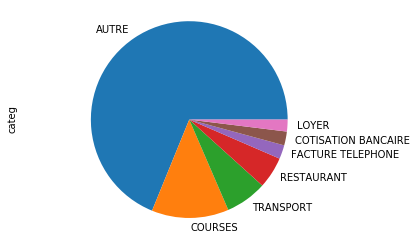

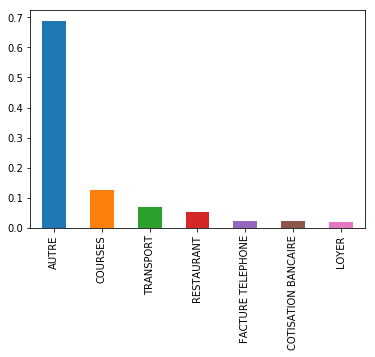

In [54]:
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

Ici, nous reprenons le même raisonnement qu'au début de ce chapitre. On commence par sélectionner la colonne souhaitée  data['categ']  , puis on compte le nombre d'apparitions de chaque modalité :  data['categ'].value_counts()  .

Pour obtenir les fréquences, on peut éventuellement ajouter  normalize=True. On obtient donc la distribution empirique. Pour l'afficher, on fait appel à la méthode  plot, à laquelle on spécifie le type de graphique souhaité ( pie  ou  bar  ).

Si la variable est qualitative ordinale, alors il suffit de classer sur le graphique les modalités en ordre croissant.

### Variables quantitatives

Pour les variables discrètes, on les représente par un équivalent du diagramme en tuyaux d'orgue : le diagramme en bâtons. Cependant, avec les variables qualitatives, on pouvait placer les tuyaux un peu n'importe où sur l'axe horizontal. Mais avec une variable quantitative, on est contraint à placer précisément les bâtons sur l'axe horizontal. Comme on doit être précis, on préfère que les bâtons soient très fins. 

Pour représenter cela, nous allons créer une variable  quart_mois  pouvant prendre les valeurs 1, 2, 3 ou 4, et indiquant l'avancée dans le mois (1 : début, ..., 4 : fin de mois) :

In [55]:
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

La ligne de code que vous avez fournie effectue une opération spécifique sur une colonne d'un DataFrame `data` de pandas. Voici une décomposition et une explication détaillée de ce qu'elle fait :

```python
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]
```

#### Explications détaillées

1. **`data["date_operation"].dt.day`** :
   - `data["date_operation"]` sélectionne la colonne `date_operation` du DataFrame `data`.
   - `.dt.day` extrait le jour du mois de chaque date dans cette colonne. Cela produit une série d'entiers représentant les jours du mois.

2. **Compréhension de liste** :
   - `[ ... for jour in data["date_operation"].dt.day]` crée une nouvelle liste en itérant sur chaque jour dans la série extraite.

3. **Calcul à l'intérieur de la compréhension de liste** :
   - `int((jour-1)*4/31)+1` :
     - `jour-1` ajuste le jour pour qu'il commence à 0 (le 1er jour du mois devient 0, le 2ème jour devient 1, etc.).
     - `(jour-1)*4/31` divise l'intervalle de jours en quatre parties égales. 31 est utilisé ici comme approximation du nombre de jours dans un mois. Cette opération convertit les jours en quartiles (quart_mois).
     - `int(...)+1` convertit le résultat en entier et ajoute 1 pour que les quartiles commencent à 1 (plutôt qu'à 0).

#### Résultat

- Chaque jour du mois est converti en un quartile :
  - Les jours du 1er au 7/8ème sont dans le 1er quartile.
  - Les jours du 8/9ème au 15/16ème sont dans le 2ème quartile.
  - Les jours du 16/17ème au 23/24ème sont dans le 3ème quartile.
  - Les jours du 24/25ème au 31ème sont dans le 4ème quartile.

#### Exemples
- Pour le 1er jour du mois : `(1-1)*4/31 + 1` = `0*4/31 + 1` = `1`
- Pour le 15ème jour du mois : `(15-1)*4/31 + 1` = `14*4/31 + 1` ≈ `2.8 + 1` ≈ `3`
- Pour le 31ème jour du mois : `(31-1)*4/31 + 1` = `30*4/31 + 1` ≈ `3.87 + 1` ≈ `4`

#### Utilisation
Cette ligne de code est utile pour diviser un mois en quartiles, ce qui peut être pratique pour l'analyse de données chronologiques où vous voulez voir des tendances ou des comportements au cours des différentes périodes d'un mois.

In [56]:
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   

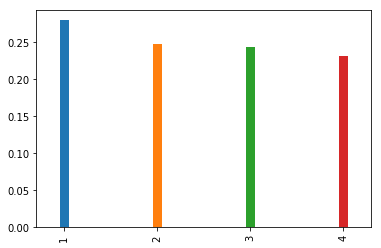

In [57]:
# Diagramme en bâtons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

In [58]:
data = data.drop(columns=['Temps_secondes'])
print(data)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
5       2023-04-03                             CARTE XX XX XX XX   -14.39   
6       2023-04-05                          CARTE XX XX XX XX XX   -15.20   
7       2023-04-05                             CARTE XX XX XX XX   -12.00   
8       2023-04-05                PRELEVEMENT XX TELEPHONE XX XX    -7.02   
9       2023-04-05           CARTE XX XX LES ANCIENS ROBINSON XX    -6.80   
10      2023-04-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.84   
11      2023-04-07        VIREMENT XX XX XX XX XX XX XX XX XX XX   992.80   

### Variables quantitatives continues 

Prenons l'exemple de la taille d'une personne : c'est une variable continue. On peut très bien avoir une personne de taille 1,47801 m et une autre de 1,47802 m. Ces deux tailles sont différentes : faut-il alors afficher sur notre graphique 2 bâtons, un pour chacune des 2 tailles ?

Tu chipotes, 1,47801 m et 1,47802 m, c'est quasiment la même valeur, il faut donc que tu les considères comme égales !

Tout à fait ! Considérer que 1,47801 m et 1,47802 m sont presque égales, c'est regrouper ces valeurs. On dit alors que l'on agrège des valeurs en classes. Si on décide d'agréger en classes de taille 0,2 m, alors ces 2 valeurs seront toutes les deux situées dans la classe [1.4m;1.6m[
 

Notez qu'il est possible d'agréger en classes de largeurs inégales. Par exemple, on peut avoir des classes de largeur 0,5 m pour les tailles inférieures à 1 m, puis des classes de largeur 0,2 m pour les tailles supérieures à 1 m. On aura ceci : [0m;0.5m[
 , [0.5m;1m[
 , [1m;1.2m[
 , [1.2m;1.4m[
 , etc.

Le fait d'agréger une variable s'appelle la discrétisation (en anglais : binning, bucketing ou discretization).

Ainsi, pour les variables continues, on utilise l'histogramme, dans lequel les valeurs sont agrégées. Ici, comme on représente des classes (ou des intervalles, si vous préférez), on n'utilise plus de fins bâtons, mais des rectangles dont la largeur correspond à la largeur de la classe.

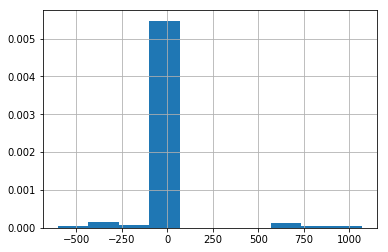

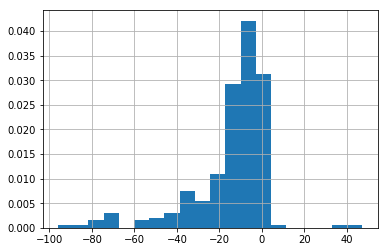

In [59]:
# Histogramme
data["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

Ce code affiche deux histogrammes basés sur la colonne `montant` d'un DataFrame `data` en utilisant la bibliothèque `pandas` pour la manipulation des données et `matplotlib` pour la visualisation. Voici une explication détaillée de chaque partie du code :

### Premier histogramme

```python
data["montant"].hist(density=True)
plt.show()
```

1. **`data["montant"].hist(density=True)`** :
   - `data["montant"]` sélectionne la colonne `montant` du DataFrame `data`.
   - La méthode `hist(density=True)` crée un histogramme des valeurs de la colonne `montant`.
   - Le paramètre `density=True` normalise l'histogramme pour que l'aire sous la courbe soit égale à 1, ce qui permet de visualiser une estimation de la densité de probabilité.

2. **`plt.show()`** :
   - Affiche l'histogramme généré.

### Deuxième histogramme

```python
data[data.montant.abs() < 100]["montant"].hist(density=True, bins=20)
plt.show()
```

1. **`data[data.montant.abs() < 100]["montant"]`** :
   - `data.montant.abs()` calcule la valeur absolue de chaque élément dans la colonne `montant`.
   - `data[data.montant.abs() < 100]` sélectionne uniquement les lignes où la valeur absolue de `montant` est inférieure à 100.
   - `["montant"]` sélectionne à nouveau la colonne `montant` dans ce sous-ensemble filtré du DataFrame.

2. **`hist(density=True, bins=20)`** :
   - Crée un histogramme des valeurs de la colonne `montant` pour le sous-ensemble filtré.
   - `density=True` normalise l'histogramme pour que l'aire sous la courbe soit égale à 1.
   - `bins=20` définit le nombre de bacs (ou intervalles) pour l'histogramme, augmentant la résolution par rapport à l'histogramme par défaut.

3. **`plt.show()`** :
   - Affiche le deuxième histogramme généré.

### En résumé

- Le premier histogramme affiche la distribution de toutes les valeurs de la colonne `montant`, normalisée pour représenter une densité de probabilité.
- Le deuxième histogramme affiche la distribution des valeurs de `montant` dont la valeur absolue est inférieure à 100, avec une résolution plus élevée (20 bacs), également normalisée pour représenter une densité de probabilité.

Ces visualisations permettent de comprendre la distribution des valeurs de `montant` dans l'ensemble de données, et en particulier, d'observer de plus près les valeurs dans une plage restreinte dans le deuxième histogramme.

On souhaite regrouper les valeurs en classes. Utiliser  value_counts()  n'aurait donc pas vraiment de sens : on utilise donc la méthode  hist(), qui s'occupe elle-même de regrouper les valeurs en classes.

Le premier histogramme généré est un peu trop étalé, car il y a des montants très grands et très petits. On filtre donc ici les montants compris entre -100 € et 100 € grâce à  data[data.montant.abs() < 100]  (on utilise pour cela la valeur absolue). Enfin, on peut aussi spécifier le nombre de classes voulues grâce au mot clé  bins  : ici 20.

Pour l'histogramme, il existe des règles pour déterminer le nombre optimal de classes. Par exemple, la règle de Sturges (1926) considère comme nombre optimal de classes :

k=[1+log2(n)]

où n
 est la taille de l'échantillon.

Si cependant, vous ne souhaitez pas agréger les valeurs, il existe une autre solution : représenter la fonction de répartition empirique. Il faut vous la représenter comme un escalier. Pour la représenter, on parcourt l'axe horizontal, des petites valeurs vers les grandes valeurs. À chaque fois que l'on rencontre une valeur qui est présente dans notre échantillon, on monte d'une marche. Il y aura donc autant de marches que de valeurs, et d'ailleurs autant que d'individus. Toutes les marches ont la même hauteur.

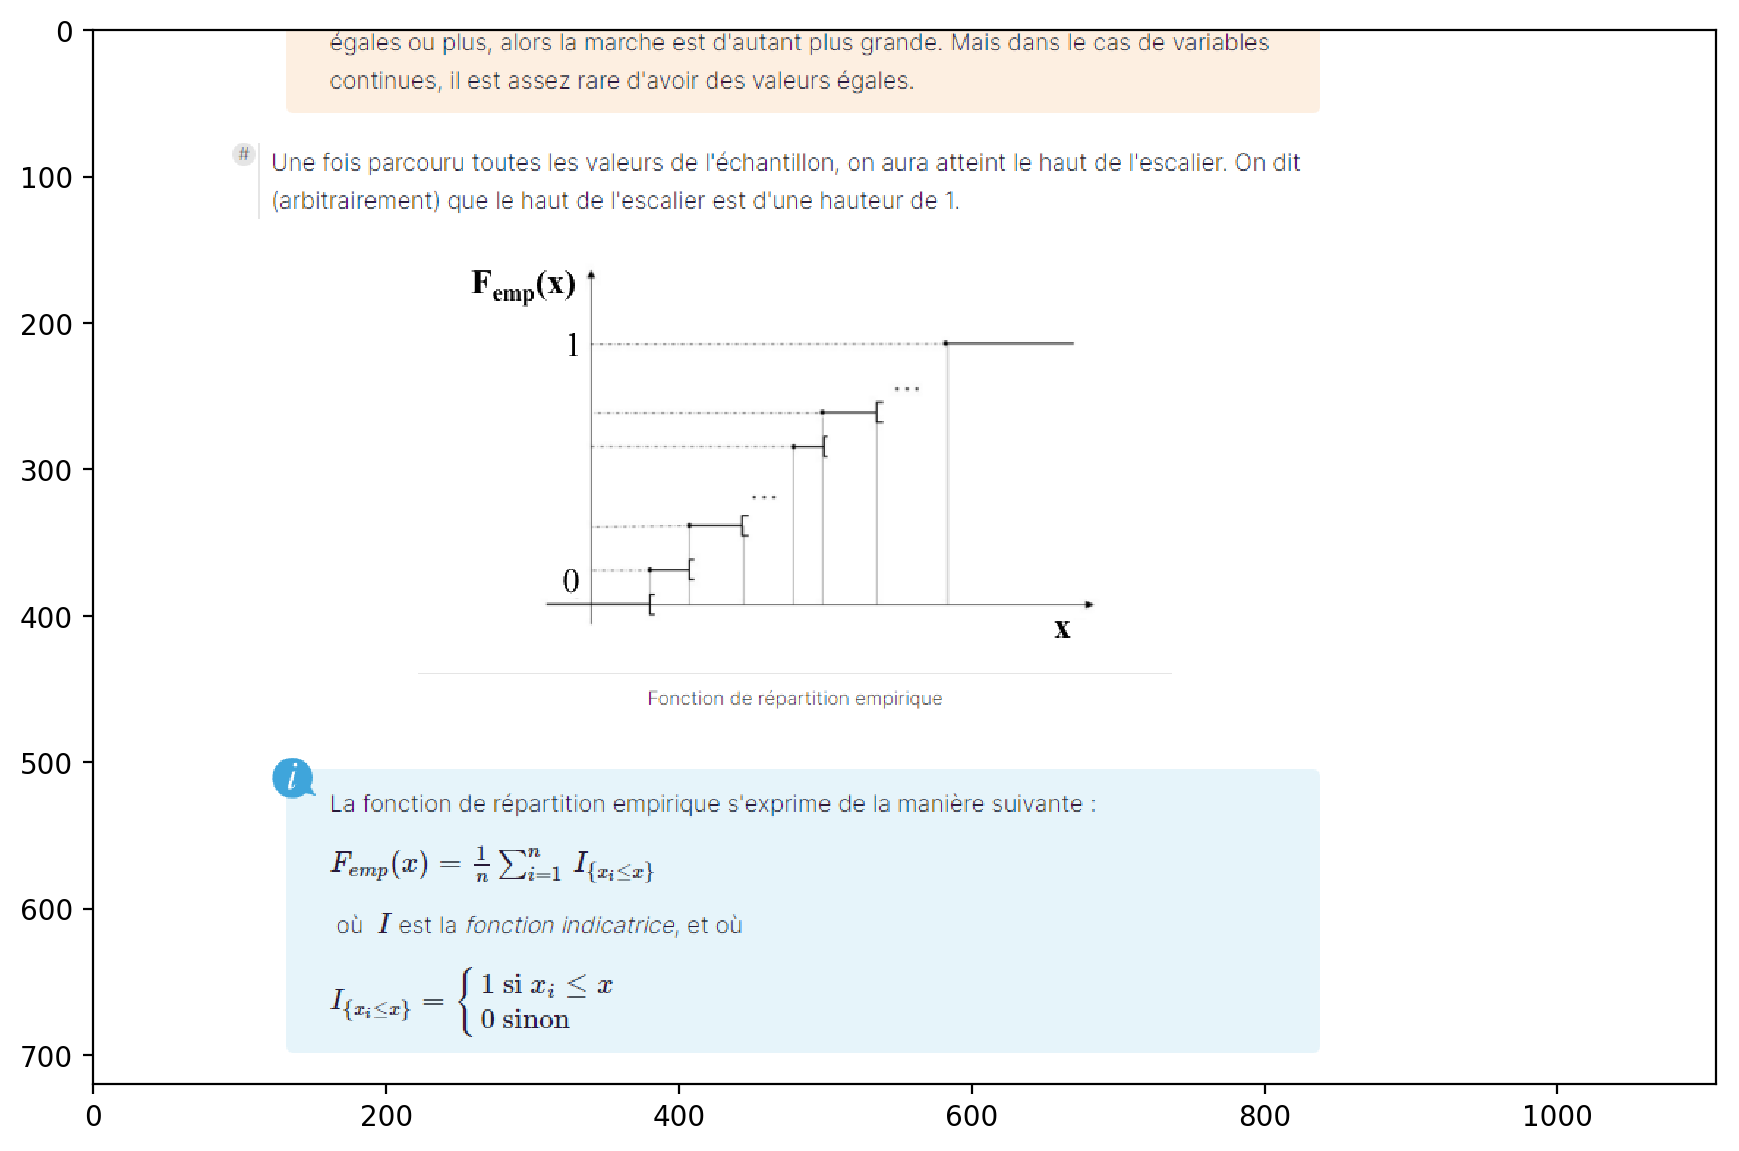

In [60]:
img1 = mpimg.imread('rep.png')
# Obtenir les dimensions de l'image
height, width, _ = img.shape

# Configurer la taille de la figure pour qu'elle corresponde à celle de l'image
fig = plt.figure(figsize=(width/30, height/50), dpi=200)
imgplot = plt.imshow(img1)
plt.show()

## Distribution en effectif/frequences

Comptage des effectifs par modalités

In [61]:
effqmois=data['quart_mois'].value_counts()
effqmois

1    86
2    76
3    75
4    71
Name: quart_mois, dtype: int64

Réccupération de l'index

In [62]:
modqmois=effqmois.index ##L'index nous donne donc les différentes modalités contenues dans notre variablet
modqmois

Int64Index([1, 2, 3, 4], dtype='int64')

Creation d'un tableau contenant les modalités de quart_mois

In [63]:
tabqmois= pd.DataFrame(modqmois, columns=["quart_mois"])
tabqmois

,quart_mois
0,1
1,2
2,3
3,4


Création d'une nouvelle colonne contenant les valeurs de effqmois

In [64]:
tabqmois["n"]=effqmois.values

In [65]:
tabqmois

,quart_mois,n
0,1,86
1,2,76
2,3,75
3,4,71


Création de la colonne des fréquences

In [66]:
tabqmois['f']=tabqmois["n"]/len(data)
tabqmois

,quart_mois,n,f
0,1,86,0.279221
1,2,76,0.246753
2,3,75,0.243506
3,4,71,0.230519


In [67]:
###trier le tableau selon les modalités de la variable
tabqmois.sort_values("quart_mois")

,quart_mois,n,f
0,1,86,0.279221
1,2,76,0.246753
2,3,75,0.243506
3,4,71,0.230519


In [68]:
##tableaux en frequences cumulés
tabqmois["F"]=tabqmois["f"].cumsum()
tabqmois

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


La représentation sous forme de tableau est une bonne alternative à une représentation graphique. 

Pour une variable qualitative, nous pouvons reprendre la distribution empirique représentant pour chaque modalité, l'effectif et la fréquence.

Pour une variable quantitative discrète, la représentation est très similaire à celle d'une qualitative, en y ajoutant la fréquence cumulée.

Dans le cas d'une quantitative continue, on regroupera au préalable les différentes valeurs en classe (discrétisation), ce qui nous renvoie directement dans la représentation d'une quantitative discrète.

### Analyse univariée

Dans cette partie, nous allons effectuer des analyses univariées. Une analyse univariée est une analyse effectuée sur une variable à la fois. Voici quelques exemples d'analyse univariée :

Faire une étude sur répartition d'âge de la population chinoise en 2010. Nous pourrions pour cela représenter cette dernière comme vu lors des chapitres précédents, ou encore calculer la moyenne d'âge de cette population.

OpenClassrooms souhaite évaluer les performances des étudiants au quiz de la fin de la partie 1 de ce cours, on pourrait commencer par calculer le taux de réussite global.

Vous cherchez à évaluer l'évolution de l'érosion des sols de la région des Hauts-de France. On pourrait pour cela regarder l'indice d'érosion des sols.

Quel est le point commun entre la moyenne d'âge de la population chinoise en 2010, le taux de réussite au quiz de fin de la partie 1 de ce cours, et l'indice d'érosion des sols de la région des Hauts-de-France ? o_O

Réponse : ce sont tous des statistiques !

Formellement, une statistique, c'est un indicateur numérique calculé à partir d'un échantillon. La moyenne d'âge est calculée à partir des habitants d'un pays, le taux de réussite à un quiz est calculé à partir des réponses données par les étudiants, et l'indice d'érosion des sols est calculé à partir de relevés effectués sur des parcelles de terrain.

Autrement dit, dès que l'on calcule un nombre à partir d'un échantillon, on calcule une statistique !

Une statistique est utile car elle nous permet de résumer un grand échantillon en un seul nombre ! Certes, vous vous doutez bien qu'il y a une grande perte d'information quand on calcule une statistique : on peut calculer le taux de réussite à partir des réponses des étudiants, mais on ne peut pas retrouver les réponses des étudiants uniquement avec le taux de réussite !

Ainsi, une statistique est un indicateur, plus ou moins efficace, d'une certaine propriété d'un échantillon.

On trouve également le terme d'indice statistique. Un indice statistique, c'est une statistique construite à partir d'une certaine vision, à partir de connaissances d'un domaine (par ex. : l'économie). En quelque sorte, un indice est une statistique "entourée" d'une certaine philosophie. À la différence d'un indice, un indicateur est quant à lui très neutre, comme une moyenne, par exemple.

Sur une même population, on peut bien sûr calculer plusieurs indicateurs. Chacun d'entre eux nous donnera une indication sur une caractéristique différente de la population. Par exemple, la moyenne d'une classe à un examen nous indiquera si l'examen a été bien réussi ou pas. Mais sur cette même population, l'écart-type des notes (nous verrons cette notion prochainement) nous indiquera s'il y a de grandes disparités de notes parmi les étudiants.

Il ne faut jamais faire confiance à 100 % à un indicateur. Vous vous imaginez bien que résumer une réalité complexe en un seul nombre, c'est forcément faire l'impasse sur certains aspects importants de cette réalité. Ainsi, quand on utilise un indicateur, il faut toujours savoir ce qu'il mesure, et ce qu'il ne mesure pas !

### Mesures de tendance centrale 

#### Le mode
La plupart du temps, je mets entre 40 et 45 min.

Quand votre ami vous dit cela, il vous donne une mesure de tendance centrale qui s'appelle le mode.

Pour les variables qualitatives, ou pour les variables quantitatives discrètes, le mode est la modalité ou la valeur la plus fréquente. Dans notre relevé bancaire, le mode de la variable categ est "Autre", car la modalité "Autre" est présente 212 fois dans l'échantillon, et toutes les autres modalités ("loyer", "courses", etc.) sont présentes moins de fois.

Pour les variables quantitatives continues, on travaille dans le cas agrégé, en regroupant les valeurs par classes. La classe modale est la classe la plus fréquente. Votre ami a découpé sa variable en tranches de 5 minutes, et a déterminé que la tranche la plus fréquente était [40min;45min[
 .

En Python, le calcul du mode tient en une ligne. Voici un exemple avec la variable montant :

In [69]:
data['montant'].mode()

0   -1.6
dtype: float64

#### moyenne
Vous répondez donc à votre ami : Oui, mais je ne peux pas me contenter de la durée la plus fréquente : car si la deuxième durée la plus fréquente est de 65 à 70 minutes, il faut que je parte beaucoup plus tôt ! Il répond alors :

Oui, tu as raison. En fait je mets en moyenne 60 minutes par trajet, car il y a souvent des embouteillages.

Cela change tout : heureusement que vous lui avez demandé de préciser, vous seriez arrivé en retard ! Ici, votre ami vous a répondu en termes de moyenne.

La moyenne, vous la connaissez tous. Pour calculer la moyenne de valeurs, on additionne celles-ci, puis on divise le résultat par le nombre de valeurs.

Il est courant d'associer la notion de moyenne à la notion d'équilibre et de centre de gravité. Pourquoi ? Imaginez que vous ayez 10 valeurs numériques. Vous prenez un bâton, que vous graduez. Sur cette graduation, vous marquez au feutre l'emplacement de vos 10 valeurs, puis vous fixez au bâton une balle sur chacune des 10 marques. Après avoir calculé la moyenne des 10 valeurs, vous l'inscrivez également sur votre bâton. Si vous souhaitez faire tenir votre bâton en équilibre, à l'horizontale, il vous faudra trouver son centre de gravité. Vous me voyez venir : le centre de gravité sera pile-poil là où vous aurez placé la moyenne des 10 valeurs !

In [70]:
data['montant'].mean()

2.8725649350649354

#### Médiane 
Derrière le problème de bâton déséquilibré, vous aurez reconnu le concept d'outlier. Comme nous venons de le voir, la moyenne est une mesure peu robuste aux outliers.

Alors, à propos de votre trajet à parcourir, vous demandez à votre ami : Quand tu me dis que tu mets en moyenne 60 min, j'imagine que tu considères dans ton calcul les rares fois durant lesquelles il y avait de la neige, et que tu as mis 4 h à faire la route ? Ce sont des outliers, autant ne pas les prendre en compte car c'est l'été, et il n'y aura pas de neige ! Ce à quoi il vous répond :

Oui effectivement. Je vais alors formuler la chose autrement : disons que la moitié des trajets que j'ai effectués ont pris plus de 55 min, et ceux l'autre moitié ont pris moins de 55 min.

 Ici, votre ami vous parle en termes de médiane.

La médiane, (notée Med), est la valeur telle que le nombre d’observations supérieures à cette valeur est égal au nombre d’observations inférieures à cette valeur.

En gros, pour trouver la médiane de vos n
 valeurs, il faut commencer par les trier. Une fois triées, on appelle x(1)
 la première valeur, x(2)
 la deuxième valeur, ... , et x(n)
 la dernière valeur. La médiane, c'est la valeur qui sera exactement au milieu du classement, soit :

Med=x(n+12)

Ainsi, sur n=999
 trajets, la médiane est x(500)
 = 55 min.

Votre calcul marche bien car 999 est impair. Mais s'il y a 1 000 trajets, la médiane est-elle la 500e valeur ou la 501e valeur ? Si on choisit la 500e, alors il y a 499 valeurs en dessous et 500 valeurs au-dessus. Mais si on choisit la 501e, alors il y a 500 valeurs en dessous et 499 valeurs au-dessus : dans les 2 cas, c'est déséquilibré !

Effectivement. Dans ce cas, on coupe la poire en deux : on place la médiane au centre de la 500e et de la 501e valeur. Ainsi, s'il y a eu 1 000 trajets, et que la 500e valeur vaut x(500)
 = 54 min 30 sec, et que la 501e vaut x(501)
  = 55 min 30 sec, alors on coupe en deux et on prend 55 min.

Plus formellement, si n
 est pair, la médiane vaut :

Med=12(x(n2)+x(n2+1))

Voilà comment calculer la médiane des montants :

In [71]:
data['montant'].median()

-9.5999999999999996

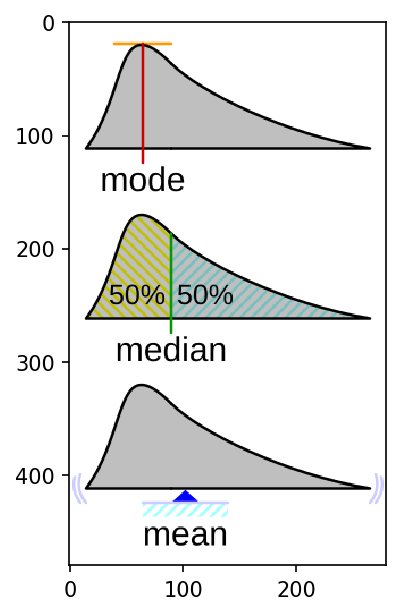

In [72]:
img = mpimg.imread('visu.png')
# Obtenir les dimensions de l'image
height, width, _ = img.shape

# Configurer la taille de la figure pour qu'elle corresponde à celle de l'image
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img)
plt.show()

In [73]:
### On va maintenant calculer tout cela pour les différentes types d'opérations bancaires 
effopp=data['categ'].value_counts()
effopp

AUTRE                  212
COURSES                 39
TRANSPORT               21
RESTAURANT              16
FACTURE TELEPHONE        7
COTISATION BANCAIRE      7
LOYER                    6
Name: categ, dtype: int64

In [74]:
moda=effopp.index

In [75]:
# Initialisation des listes pour stocker les résultats
mean_values = []
mode_values = []
median_values = []

In [76]:
for category, count in effopp.items():
    # Filtrage des données pour la catégorie actuelle
    filtered_data = data[data['categ'] == category]['montant']
       # Calcul de la moyenne, du mode et de la médiane
    mean = np.mean(filtered_data)
    mode = filtered_data.mode().values[0]  # Prend le premier mode si plusieurs existent
    median = np.median(filtered_data)
    
    # Ajout des résultats à leurs listes respectives
    mean_values.append(mean)
    mode_values.append(mode)
    median_values.append(median)

# Création d'un DataFrame pour afficher les résultats
results_df = pd.DataFrame({
    'categ': effopp.index,
    'mean': mean_values,
    'mode': mode_values,
    'median': median_values
})

# Affichage des résultats
print(results_df)

                 categ        mean    mode  median
0                AUTRE   23.433208   -1.60   -8.31
1              COURSES  -16.341282  -60.16  -12.24
2            TRANSPORT  -52.997143  -73.00  -53.10
3           RESTAURANT  -10.332500   -9.20  -10.10
4    FACTURE TELEPHONE  -12.045714   -7.02   -7.02
5  COTISATION BANCAIRE   -1.885714   -1.92   -1.92
6                LOYER -345.000000 -345.00 -345.00


### Indicateurs de dispersion

au chapitre précédent, votre ami vous a donné une estimation de la durée du trajet. Mais il vous a donné des mesures de tendance centrale, comme par exemple la moyenne, qui est de 60 minutes par trajet.

Ce qui vous manque maintenant, c'est de savoir si les durées des trajets que votre ami a effectués sont très "resserrées" autour de 60 min (exemple :  [58, 60, 62, 59, 57...] ), ou bien si elles s'en écartent beaucoup (exemple :  [40, 70, 78, 43...] ).

Quel intérêt ?

Si les valeurs sont très resserrées autour de 60 minutes, alors prévoyez de partir 75 minutes à l'avance. Ainsi, il est probable que vous arriverez 5 ou 10 minutes avant votre entretien. Mais si les valeurs sont très écartées, alors prévoyez plutôt de partir 100 minutes à l'avance, car il est tout à fait possible que le trajet dure 80 minutes !

J'ai compris ! Mesurer l'espacement des valeurs... j'imagine qu'il y a une mesure statistique pour cela, non ?

Tout à fait ! :D Il y en a même plusieurs. On les appelle les mesures de dispersion.

Essayons de construire notre propre indicateur de dispersion, pas à pas. Pour illustrer, prenons les valeurs suivantes (70, 60, 50, 55, 55, 65, 65), et donnons-leur à chacune un nom : xi , avec i allant de 1 à 7. Ainsi, nos valeurs portent les noms de x1 à x7

 .

Formellement, on écrit  (x1,...,xn)=(70,60,50,55,55,65,65)
 avec n=7

 .

Remarquons que la moyenne de ces valeurs vaut 60, on la note x¯¯¯=60

, et on prononce "x barre".

Facile de faire une mesure de dispersion ! Prenons toutes nos valeurs, et calculons pour chacune d'entre elles l'écart qu'elles ont avec la moyenne. Puis additionnons tous ces écarts !

C'est un bon début. Comme notre moyenne est de 60, les écarts des xi
 à la moyenne sont : (x1−x¯¯¯,...,x7−x¯¯¯)=(10,0,−10,−5,−5,5,5). Sauf que... si nous faisons la somme de ceux-ci, on obtient 0 ! On peut même le démontrer mathématiquement : quelle que soit la dispersion de vos valeurs, la somme des écarts à la moyenne vaudra toujours 0. Pas très efficace donc...

Si ça vaut 0, c'est parce qu’il y a des nombres positifs et des nombres négatifs. Évitons cela, et mettons-les tous au carré. Un nombre mis au carré, c'est toujours positif, n'est-ce pas ?

Ici, on a fait la somme de tous les $$((x_i - \bar{x})^2)$$, avec $$(i)$$ allant de 1 à 7. Mathématiquement, on note cette somme comme ceci :

$$
\sum_{i=1}^{7} (x_i - \bar{x})^2
$$


Bon. Il y a encore un problème. Ici, on a 7 valeurs, tout simplement parce que nous sommes un peu paresseux, et nous n'en avons relevé que 7. Mais en statistiques, plus on fait de relevés, plus on a une idée précise de ce que l'on décrit. Ainsi, on aurait dû retenir 10, 100 ou même 1 000 valeurs !

Mais avec 1 000 valeurs, notre mesure exploserait ! Il passerait de 300 avec 7 valeurs à peut-être 40 000 000 000 avec 1 000 valeurs. C'est problématique.

Alors, plutôt que de calculer la somme, et avoir un indicateur qui explose, prenons plutôt la moyenne. Ainsi, qu'il y ait 7 valeurs ou 1 000 valeurs, la moyenne n'explosera pas.

Bonne idée. La moyenne de (100,0,100,25,25,25,25) est 42,86.

Mahtématiquement on diras que l'on prends la moyenne des ecarts quadratiques

### Variance empirique.

 $$ (1/n) \sum_{i=1}^{7} (x_i - \bar{x})^2
$$

Que l'on peut réecrire   $$ (1/n) \sum_{i=1}^{n} (x_i )^2 -\bar{x}
$$

Pour calculer la variance en Python, cela se fait très facilement ! Il suffit d'utiliser la méthode .var() sur la variable considérée. Par exemple avec la variable montant de notre jeu de données de transactions bancaires :

In [77]:
data['montant'].var()

31007.638040630954

Pour la variance empirique biaisée.

Aussi, vous trouverez souvent une version "corrigée" de la variance empirique, que l'on qualifie de non biaisée. En effet, quand on se plonge dans les calculs, on s'aperçoit que la variance empirique donne des valeurs qui (en moyenne) sont inférieures à la variance de la variable aléatoire. Il s'agit de la notion de biais d'un estimateur. Un estimateur sans biais est meilleur qu'un estimateur biaisé.

Pour corriger ce biais, on a créé la variance empirique corrigée, ou variance empirique sans biais. Elle est souvent notée s′2
 , et est égale à s′2=nn−1v
 , où v
 est la variance empirique, et n
 la taille de l'échantillon. Quand la taille de l'échantillon est grande, la variance empirique et la variance empirique corrigée sont presque égales.

Voici comment calculer la variance empirique corrigée en Python 

In [78]:
data['montant'].var(ddof=0)

30906.963891148385

Pour corriger ce biais, on a créé la variance empirique corrigée, ou variance empirique sans biais. Elle est souvent notée $$( s'^2 )$$, et est égale à :

$$[ s'^2 = \frac{n}{n-1}v ]$$

où $$( v )$$ est la variance empirique, et $$( n )$$ la taille de l'échantillon. Quand la taille de l'échantillon est grande, la variance empirique et la variance empirique corrigée sont presque égales.

L'écart-type empirique, c'est juste la racine carrée de la variance empirique. On l'appelle en anglais *standard deviation*, souvent abrégé *std*. En fait, quand on calcule la variance empirique des temps de trajet, le résultat a pour unité la minute², ce qui n'est pas très intelligible. En prenant la racine carrée, l'unité redevient la minute. Ici, notre écart-type vaut 6,55 minutes. On le note $$ s$$.

$$s = \sqrt{v} $$

Voilà comment calculer l'écart-type de la variable montant :

In [79]:
data['montant'].std()

176.08985785851198

Mais lorsque vous faites un trajet, un écart-type de 6,55 minutes sur un trajet de 1 heure (1h en moyenne), ce n'est pas la même chose qu'un écart-type de 6,55 minutes sur un trajet de 24 heures (24h en moyenne) ! Pour remédier à cela, on a donc créé le coefficient de variation qui est l'écart-type empirique divisé par la moyenne :

$$CV=𝑠/𝑥$$
Le calcul de ce dernier en Python est tout aussi simple :

In [80]:
data['montant'].std()/data['montant'].mean()

61.300566510790262

### L'écart interquartile

Vous vous souvenez de la médiane ? C'est la valeur au-dessous de laquelle se trouvent la moitié des valeurs.
Un quartile, c'est la même chose, mais avec la proportion d'un quart. Il existe 3 quartiles, notés $( Q_1 )$ (premier quartile), $ Q_2$ (deuxième quartile) et $Q_3$ (troisième quartile). Ainsi :
$ \frac{1}{4} $ des valeurs se trouvent en dessous de $ Q_1 $ et $ \frac{3}{4}$ au-dessus ;
$ \frac{2}{4}$ se trouvent en dessous de $Q_2$, et $ \frac{2}{4} $ au-dessus $Q_2$ est la médiane !) ;
$\frac{3}{4}$ se trouvent en dessous de $Q_3$, et $\frac{1}{4}$ au-dessus.

La généralisation de ce concept s'appelle le quantile d'ordre α
. Ainsi, la médiane est le quantile d'ordre 0,5, Q1 le quantile d'ordre 0,25, Q3 le quantile d'ordre 0,75. Il y a également les déciles (quantiles d'ordre 0.1, 0.2, etc.), ou les centiles, aussi appelés percentiles (quantiles d'ordre 0,01, 0.02, etc.).

### La boîte à moustaches (boxplot)

Boîte à moustaches, quel nom rigolo ! :lol: Les anglophones l'appellent boxplot.

Elle permet de représenter schématiquement une distribution, en incluant sa dispersion. La boîte est délimitée par Q1
 et Q3
 , et on représente souvent la médiane à l’intérieur de la boîte. On dessine ensuite des moustaches à cette boîte, qui vont de la valeur minimale à la valeur maximale... à condition que la moustache (d'un côté ou de l'autre) ne mesure pas plus de 1,5 fois l'écart inter-quartiles. Si certaines valeurs sont au-dessous de  Q1−1.5IQ
 ou au-dessus de Q3+1.5IQ
 , alors on les considère comme des outliers, et on ne les inclut pas dans la moustache :

Les boîtes à moustaches et les histogrammes ont la même vocation : donner un aperçu d'une distribution empirique. La boîte à moustaches est plus grossière que l'histogramme, mais elle permet de comparer plus facilement la distribution de plusieurs variables (deux boîtes à moustaches sont plus simples à comparer que 2 hisogrammes

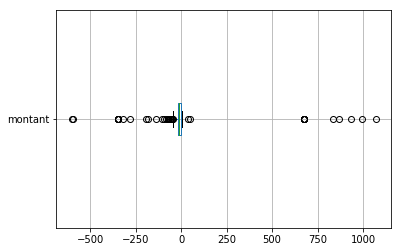

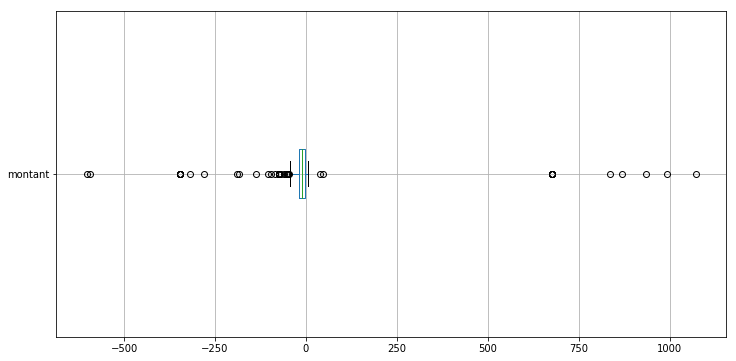

In [83]:
data.boxplot(column="montant", vert=False)
plt.figure(figsize=(12, 6)) 
data.boxplot(column="montant", vert=False)
plt.show()

### Ecart moyen absolu

Quand au début du chapitre, nous avons dit :

> Mettons-les tous au carré. Un nombre mis au carré, c'est toujours positif, n'est-ce pas ?

... peut-être vous êtes-vous dit :

> On peut prendre la valeur absolue aussi plutôt que le carré, non ?

Tout à fait. Quand on fait cela, on calcule l'écart moyen absolu.

Il y a deux versions : l'une où on mesure les écarts à la moyenne, l'autre où on mesure les écarts à la médiane.

Voici la version avec la médiane :

$\text{EMA} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \text{Med}| $

Si on souhaite une mesure plus robuste, on définit également le MAD qui est la médiane des écarts absolus par rapport à la médiane.

Les mesures de dispersion permettent de compléter les mesures de tendance centrales, en précisant la façon dont les valeurs se répartissent autour de ces dernières.

La variance est la somme des différences à la moyenne au carré, divisée par l'effectif total.

L'écart-type correspond à la racine carrée de la variance.

L'écart moyen absolu est similaire à la variance, à la différence que le calcul fait intervenir la valeur absolue plutôt que le passage au carré.

Une représentation graphique intéressante pour représenter la dispersion d'une variable quantitative est la boîte à moustaches, ou boxplot. Cette dernière se construit à partir des différents quartiles.

## Mesures de forme


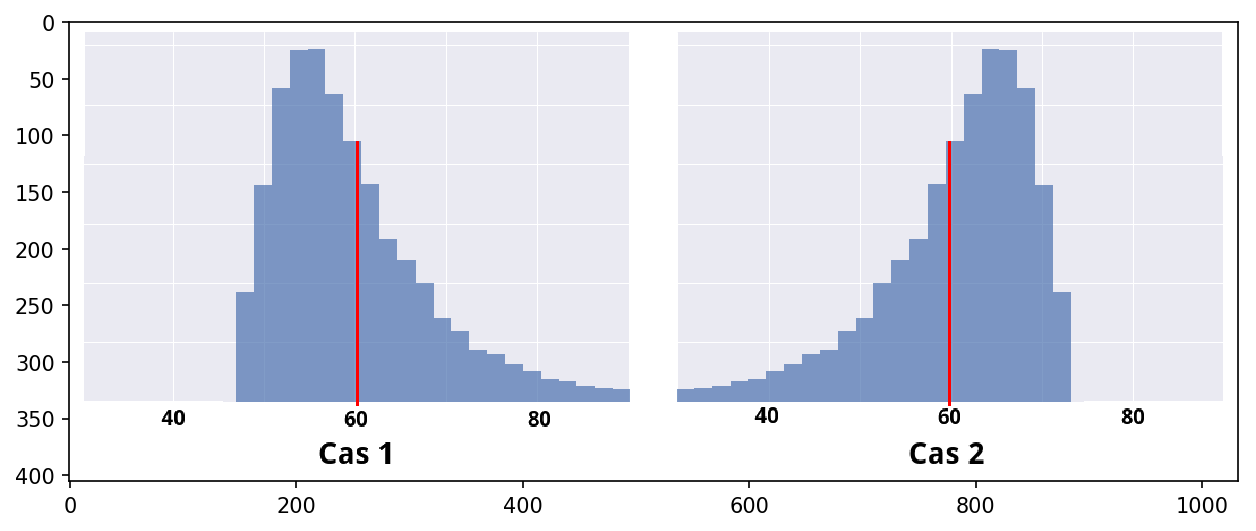

In [89]:
img4 = mpimg.imread('dis.png')
height, width, _ = img4.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img4)
plt.show()

Bon, votre ami vous a donné la moyenne des temps de trajet, ainsi que l’écart-type. Vous êtes déjà plus serein. Mais... il y a quelque chose que vous n'avez pas prévu. Regardez ces 2 distributions :

Elles ont la même moyenne empirique (60 minutes), et le même écart-type. Cependant, le cas 1 est plus "risqué" que le cas 2. En effet, dans le cas 2, il est très peu probable que votre trajet dure plus de 75 minutes : pas de risque d'être en retard ! Par contre, dans le cas 1, il est tout à fait possible que votre trajet dure 80 minutes, ou même beaucoup plus.

Vous remarquez donc que connaître la moyenne et l’écart-type ne suffit pas ici. Ce qu'il vous faut connaître, c'est la forme de la distribution : est-ce qu'elle s'étale plutôt vers la gauche ou plutôt vers la droite ?

Construisons notre propre indicateur de forme ! Nous souhaitons savoir si la distribution s'étale plutôt à gauche ou à droite de la moyenne.

Ceci est équivalent à savoir si la majorité des valeurs est plus petite ou plus grande que la moyenne.

Je vous propose de reprendre celui que nous avons construit au chapitre précédent. Au départ, nous avions eu cette idée :

> Prenons toutes nos valeurs, et calculons pour chacune d'entre elles l'écart qu'elles ont avec la moyenne. Puis additionnons tous ces écarts !

L'écart entre une valeur et la moyenne, nous l'avons écrit $(x_i - \bar{x})$. Si cet écart est positif, cela signifie que $ x_i $ est supérieur à la moyenne ; s'il est négatif, $x_i $ est inférieur à la moyenne.

En additionnant tous ces écarts, nous nous sommes aperçus que la somme valait toujours 0. Nous avons donc mis cette quantité au carré : $ x_i - \bar{x})^2 $. Avec le carré, cette grandeur est toujours positive. Si elle est toujours positive, on perd l'information qui nous dit si $x_i$ est supérieur ou inférieur à la moyenne. Or ici, nous voulons garder cette information !

Bon, si le carré ne convient pas, mettons-la au cube pour voir !

Bien vu ! Quand on met l'écart au cube, on obtient $x_i - \bar{x})^3$. Contrairement au carré, le cube conserve le signe de $x_i - \bar{x}$. Ensuite, prenons la moyenne de tous ces écarts au cube, on obtient :

$\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3 $

Nous avons atteint notre objectif : cette grandeur sera négative si la majorité des valeurs est plus petite que la moyenne, et positive sinon !

Mais nous pouvons faire encore mieux. Regardez ces deux distributions :

![La distribution dans le cas A est plus étendue que celle dans le cas B](dis2.png)

Elles ont la même forme, mais pas le même écart-type (la distribution A est plus étendue que B, A a un écart-type 2 fois supérieur à B). Comme elles ont la même forme, on voudrait que notre indicateur donne la même valeur pour ces deux distributions.

Mais actuellement, ce n'est pas le cas. Dans le cas A, les écarts à la moyenne sont 2 fois plus importants que dans le cas B. Comme on met ces écarts au cube, notre indicateur sera donc \( 2^3 \) fois plus grand pour A que pour B. Or nous les souhaitons égaux. Pour corriger cela, il faut annuler l'effet de l'écart-type. On va donc diviser notre indicateur par l'écart-type mis au cube :

$\frac{1}{n} \sum_{i=1}^{n} \frac{(x_i - \bar{x})^3}{s^3}$

### Le skewness de forme

Devinez quoi ! L'indicateur que nous venons de créer est utilisé par les statisticiens et s'appelle le skewness empirique. En général, on a l'habitude de nommer le skewness $\gamma_1$ et son numérateur $\mu_3$ :

$\gamma_1 = \frac{\mu_3}{s^3}$

avec 

$\mu_3 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3 $

Le skewness est une mesure d'asymétrie. L’asymétrie d’une distribution traduit la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale. On interprète cette mesure de cette manière :

- Si $\gamma_1 = 0$, alors la distribution est symétrique.
- Si $\gamma_1 > 0$, alors la distribution est étalée à droite.
- Si $\gamma_1 < 0$, alors la distribution est étalée à gauche.

![Relation entre la forme de la distribution et le skewness](dis2.png)

L'étude de l'asymétrie d'une distribution, c'est chercher qui de la médiane ou de la moyenne est la plus grande. Une distribution est dite symétrique si elle présente la même forme de part et d’autre du centre de la distribution. Dans ce cas : $\text{Mode} = \text{Med} = \bar{x}$.

Une distribution est étalée à droite (ou oblique à gauche, ou présentant une asymétrie positive) si : $ \text{Mode} < \text{Med} < \bar{x} $.

De même, elle est étalée à gauche (ou oblique à droite) si $\text{Mode} > \text{Med} > \bar{x} $.

Le calcul du skewness se fait très facilement en Python. Voici un exemple avec la variable montant de notre jeu de données de transactions bancaires :


In [90]:
data['montant'].skew()

3.3618450105098843

### Le Kurtosis empirique

Le kurtosis empirique n'est pas une mesure d'asymétrie, mais c'est une mesure d'aplatissement. L’aplatissement peut s’interpréter à la condition que la distribution soit symétrique. En fait, on compare l'aplatissement par rapport à la distribution la plus célèbre, appelée distribution normale (parfois "courbe de Gauss" ou "Gaussienne"). Vous l'avez probablement déjà vue, elle ressemble à cela

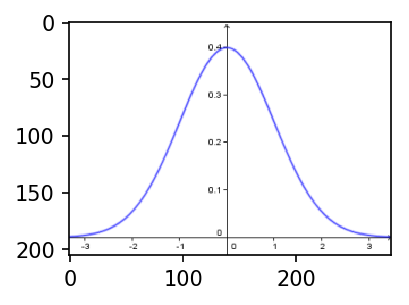

In [91]:
img5=mpimg.imread('norm.png')
height, width, _ = img5.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img5)
plt.show()

Bien sûr ! Les termes $\mu_3$ et $\mu_4$ sont effectivement des moments d'ordre 3 et 4 respectivement. Voici une explication détaillée :

### Moments d'ordre 3 et 4

1. **Moment d'ordre 3 $\mu_3$ :**
   Le moment d'ordre 3 est défini comme suit pour une série de données $x_1, x_2, \ldots, x_n$ avec une moyenne $ \bar{x} $ :
   $\mu_3 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3$
   
   Il mesure l'asymétrie de la distribution des données autour de leur moyenne. Si \( \mu_3 > 0 \), cela indique que la distribution est étalée à droite (skewness positif) ; si \( \mu_3 < 0 \), la distribution est étalée à gauche (skewness négatif).

2. **Moment d'ordre 4 (\( \mu_4 \)) :**
   Le moment d'ordre 4 est défini comme suit :
   $\mu_4 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4$
   
   Il mesure la concentration des valeurs autour de la moyenne et est utilisé pour calculer le kurtosis, qui indique à quel point une distribution est « lourde » ou « légère » par rapport à la distribution normale. La formule du kurtosis est donnée par :
   $\gamma_2 = \frac{\mu_4}{s^4} - 3$
   où $s$ est l'écart-type.

### Interprétation

-$\mu_3$ et $\mu_4$ sont des mesures numériques qui fournissent des informations sur la forme de la distribution des données.
- $\mu_3$ est utilisé pour calculer le skewness $\gamma_1$, qui indique l'asymétrie de la distribution.
- $\mu_4 $ est utilisé pour calculer le kurtosis $\gamma_2 $, qui mesure la « queue » de la distribution par rapport à une distribution normale.

Ces moments sont des outils essentiels en statistique pour caractériser et comprendre la nature des distributions de données observées.

En statistique, lorsque l'on parle de la "queue" d'une distribution, cela fait référence à la partie de la distribution où se trouvent les valeurs extrêmes par rapport à la moyenne. Plus précisément :

1. **Queue de distribution longue (ou épaisse) :**
   - Une distribution avec une queue longue présente un nombre significatif de valeurs qui s'éloignent considérablement de la moyenne, souvent plus que ce que l'on pourrait attendre d'une distribution normale.
   - Cela peut indiquer la présence de valeurs aberrantes (outliers) ou une variabilité plus importante dans les données.
   - Un kurtosis élevé (positif) indique une queue de distribution longue.

2. **Queue de distribution courte (ou fine) :**
   - Une distribution avec une queue courte signifie que les valeurs sont généralement plus proches de la moyenne et qu'il y a moins de valeurs extrêmes.
   - Cela peut indiquer une distribution plus concentrée autour de la moyenne et moins sujette aux valeurs aberrantes.
   - Un kurtosis faible (négatif) indique une queue de distribution courte.

En résumé, la "queue" d'une distribution se réfère à la région où se situent les valeurs extrêmes par rapport à la moyenne, et le kurtosis est une mesure qui quantifie la forme de cette queue par rapport à une distribution normale. Un kurtosis élevé (positif) indique une distribution avec des queues plus épaisses, tandis qu'un kurtosis faible (négatif) indique des queues plus fines.

In [96]:
data['montant'].kurtosis()

17.271904828267701

Il s’interprète comme ceci :

Si γ2=0
 , alors la distribution a le même aplatissement que la distribution normale.

Si γ2>0
 , alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.

Si γ2<0
 , alors les observations sont moins concentrées : la distribution est plus aplatie.

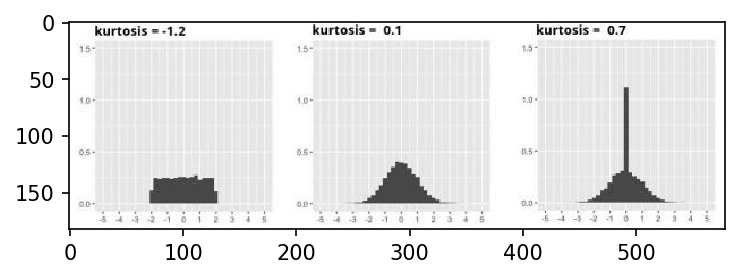

In [98]:
img6=mpimg.imread('kurtosis.jpeg')
height, width, _ = img6.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img6)
plt.show()

In [101]:
data['solde_avt_ope'].kurtosis()

0.12914086318246509

In [102]:
data['quart_mois'].kurtosis()

-1.372438561844638

ce qui confirme l'idée que l'on dépense plus en début de mois.

Les mesures de forme sont des mesures permettant de déterminer si la majeure partie des valeurs est plus petite ou plus grande que la moyenne.

Le skewness est une mesure d'asymétrie, qui correspond à l'étude de la régularité (ou non) avec laquelle les observations se répartissent autour de la valeur centrale.

Le kurtosis empirique est une mesure d'aplatissement de la distribution, comparativement à l'aplatissement d'une distribution normale.

### Mesures de concentration

Bonne nouvelle, nous en avons fini avec cette histoire d’entretien d'embauche et de cet ami qui, au lieu de vous dire clairement combien de temps il faut prévoir pour que vous arriviez à l'heure, vous parle en termes de médiane, moyenne, variance, skewness et tout le tralala !

Revenons sur nos relevés bancaires, et étudions nos dépenses.

Une dépense, c'est une somme d'argent. Cela tombe bien, car les mesures de concentration sont le plus souvent utilisées pour des sommes d'argent ! Étudier la concentration d'argent, c'est regarder si l'argent est réparti de manière égalitaire ou pas.

Ce que l'on va regarder, c'est si tout l'argent que vous dépensez se concentre en quelques opérations bancaires, ou si au contraire, il est bien réparti parmi les opérations. Dire que votre argent se concentre sur quelques opérations signifie que généralement, vous faites de très nombreuses petites dépenses, et que parfois, il vous arrive de faire quelques dépenses énormes.

Au contraire, l'argent que vous dépensez est bien réparti si toutes vos opérations bancaires (sortantes) ont à peu près le même montant.

Pour visualiser cela, nous utilisons la courbe de Lorenz.

#### Courbes de lorrentz

La hauteur de l'escalier est la somme des hauteurs des marches. La somme des hauteurs des marches correspond à la somme de tous les revenus des individus. Par exemple, si 10.000 € ont été distribués parmi la population, la hauteur de l'escalier sera de 10 m (si on considère que 1 m correspond à 1.000 €).

La courbe de Lorenz représente tout simplement cet escalier, à cela près que la hauteur de l'escalier est ramenée à 1, et que la longueur de l'escalier (projetée au sol) est aussi ramenée à

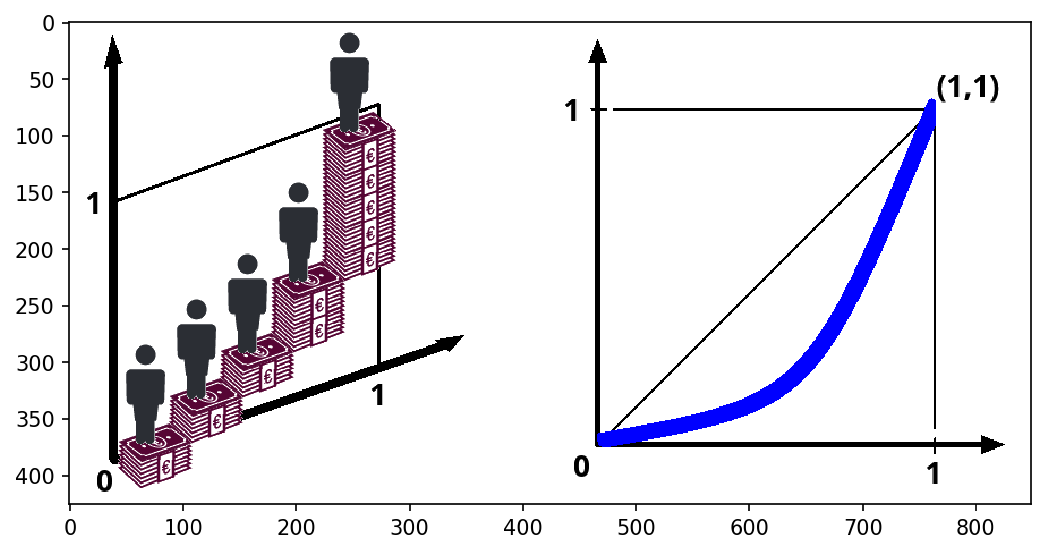

In [104]:
img7=mpimg.imread('lorenz.png')
height, width, _ = img7.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img7)
plt.show()

Que se passe-t-il si tous les gens reçoivent la même somme d'argent ?

Dans ce cas, la répartition est la plus égalitaire possible. L'escalier se présente comme ceci (à gauche) :

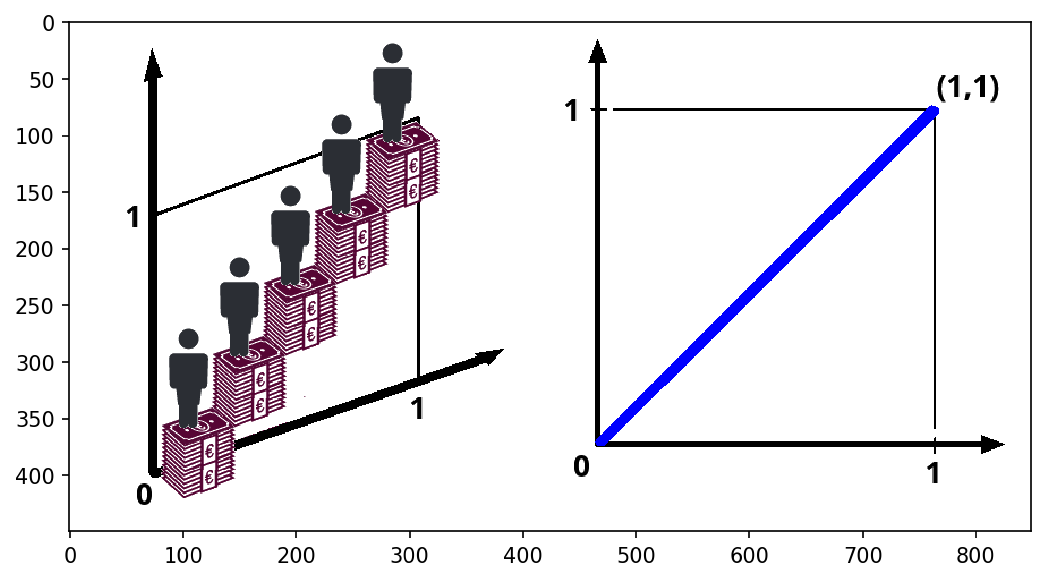

In [106]:
img8=mpimg.imread('lorenz1.png')
height, width, _ = img8.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img8)
plt.show()

On voit que les marches sont régulières, et que toutes les personnes sont alignées sur une droite appelée première bissectrice, c'est-à-dire qu'elle passe par les points (0,0) et (1,1). Elle est représentée en bleu sur le graphique de droite.

Et si une seule personne concentre en sa possession l'ensemble de la richesse ?

Nous sommes dans l’extrême inverse du cas précédent. Ici, la répartition est la plus inégalitaire possible :

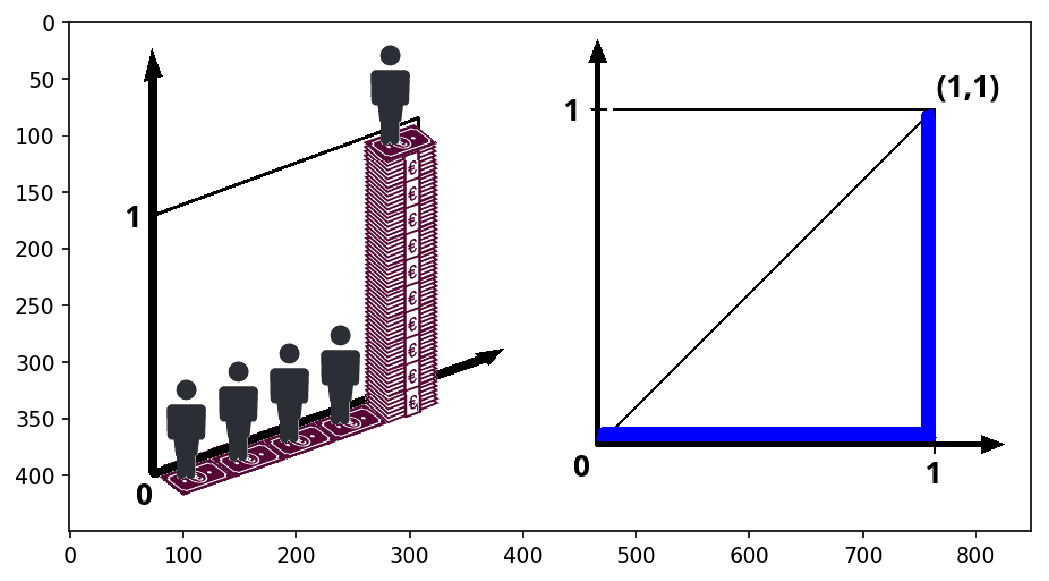

In [107]:
img9=mpimg.imread('lorenz2.png')
height, width, _ = img9.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img9)
plt.show()

Ici, la courbe de Lorenz ne suit plus du tout la première bissectrice, mais elle s'en éloigne au maximum !

En résumé, plus la courbe de Lorenz est proche de la première bissectrice, plus la répartition est égalitaire.

Voici le code permettant d'afficher la courbe de Lorenz :

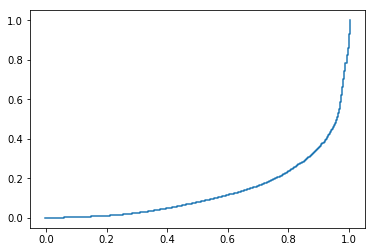

In [108]:
depenses = data[data['montant'] < 0]#On sélectionne les dépenses dans un nouveau fichier
dep = -depenses['montant'].values#on les transforme en valeurs positives dans dep
n = len(dep)#taille
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

On y sélectionne tout d'abord le sous-échantillon de travail que l'on appelle  depenses  . Comme évoqué plus haut, il faut trier les individus dans l'ordre croissant des valeurs de la variable ; nous le faisons ici grâce à  np.sort(dep)  , car  dep  contient les observations de la variable montant.

Ensuite, nous calculons la somme cumulée grâce à  np.cumsum()  . Pour normaliser et faire en sorte que le haut de la courbe soit à 1, on divise le tout par  dep.sum()  . La variable  lorenz  contient les ordonnées des points, mais il nous faut maintenant leurs abscisses : celles-ci s'étendent de 0 à 1 (comme évoqué précédemment) à intervalle réguliers. C'est ce que produit  np.linspace(0-1/n,1+1/n,len(lorenz)) 

Ce code Python permet de générer une courbe de Lorenz pour les dépenses, ce qui est utilisé en économie pour visualiser la répartition relative d'une quantité entre les individus ou les catégories. Voici une explication détaillée ligne par ligne :

```python
depenses = data[data['montant'] < 0]  # Sélectionne les dépenses dans un nouveau dataframe 'depenses'
dep = -depenses['montant'].values  # Transforme les montants des dépenses en valeurs positives dans 'dep'
n = len(dep)  # Nombre total d'observations (taille de 'dep')

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(np.sort(dep)) / dep.sum()  # Calcule la somme cumulée des dépenses triées, normalisée par la somme totale des dépenses
lorenz = np.append([0], lorenz)  # Ajoute 0 au début de la courbe de Lorenz pour commencer à l'origine

# Création des axes pour la courbe de Lorenz
xaxis = np.linspace(0 - 1/n, 1 + 1/n, n + 1)
# Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0.
# Le premier segment commence à 0 - 1/n, et le dernier termine à 1 + 1/n.

# Affichage de la courbe de Lorenz
plt.plot(xaxis, lorenz, drawstyle='steps-post')
plt.show()
```

### Explication détaillée :

1. **Sélection des dépenses :**
   ```python
   depenses = data[data['montant'] < 0]
   ```
   - `data` est un DataFrame contenant les données.
   - `data['montant'] < 0` crée un masque booléen pour sélectionner les lignes où la colonne 'montant' est négative, donc les dépenses.
   - `depenses` contient uniquement les lignes où les montants sont négatifs.

2. **Transformation des montants en valeurs positives :**
   ```python
   dep = -depenses['montant'].values
   ```
   - `depenses['montant'].values` récupère les valeurs de la colonne 'montant' des dépenses sélectionnées.
   - `-` avant `depenses['montant'].values` transforme chaque valeur en son opposé pour obtenir des valeurs positives.
   - `dep` contient maintenant les dépenses transformées en valeurs positives.

3. **Calcul de la courbe de Lorenz :**
   ```python
   lorenz = np.cumsum(np.sort(dep)) / dep.sum()
   ```
   - `np.sort(dep)` trie les valeurs positives des dépenses.
   - `np.cumsum(...)` calcule la somme cumulée des valeurs triées.
   - `dep.sum()` donne la somme totale des dépenses.
   - `lorenz` est un tableau des valeurs normalisées de la somme cumulée des dépenses triées, représentant la courbe de Lorenz.

4. **Préparation des axes pour la courbe de Lorenz :**
   ```python
   xaxis = np.linspace(0 - 1/n, 1 + 1/n, n + 1)
   ```
   - `np.linspace(start, stop, num)` génère `num` valeurs uniformément espacées entre `start` et `stop`.
   - `start = 0 - 1/n` et `stop = 1 + 1/n` pour couvrir l'intervalle complet de la courbe de Lorenz.
   - `n + 1` segments pour représenter chaque individu et un segment supplémentaire pour l'origine.

5. **Affichage de la courbe de Lorenz :**
   ```python
   plt.plot(xaxis, lorenz, drawstyle='steps-post')
   plt.show()
   ```
   - `plt.plot(xaxis, lorenz, drawstyle='steps-post')` trace la courbe de Lorenz avec un style d'affichage escalier postérieur.
   - `plt.show()` affiche le graphique.

### Interprétation :
La courbe de Lorenz montre la distribution cumulative des dépenses. Si la courbe de Lorenz est une ligne droite diagonale parfaite de l'angle inférieur gauche au coin supérieur droit, cela signifie que la répartition des dépenses est parfaitement égale entre les individus. Plus la courbe de Lorenz est éloignée de cette ligne diagonale, plus il y a d'inégalité dans la répartition des dépenses.

#### Médiale

Nous avons dit que la courbe de Lorenz est un escalier de hauteur 1. Le salaire médial, c'est simplement le salaire de la personne qui se trouve à la moitié de la hauteur : 0,5.

La valeur du salaire médial n'est pas directement visible sur la courbe de Lorenz, mais on peut y voir la personne qui a le salaire médial. De même, la personne qui a le salaire médian est située exactement à 0,5 sur l'axe horizontal. 

On savait que 50 % des salaires sont inférieurs au salaire médian, et 50 % sont supérieurs. Maintenant on sait que la somme des salaires inférieurs au salaire médial vaut 50 % de la somme de tous les salaires, et évidemment, la somme des salaires supérieurs au salaire médial vaut 50 % de la somme de tous les salaires.

#### Indice de gini

Bien sûr ! Voici comment mettre cette formule en markdown :

Le **coefficient de Gini** résume la disparité économique représentée par la courbe de Lorenz. Il mesure l'aire entre la première bissectrice (qui représente une répartition équitable) et la courbe de Lorenz elle-même. Si $S $ représente cette aire, alors le coefficient de Gini $\text{gini}$ est calculé comme suit :

$\text{gini} = 2 \times S$

Dans cette formule :

$S$ est l'aire entre la première bissectrice et la courbe de Lorenz.
$\text{gini}$ donne une mesure de l'inégalité économique : plus il est proche de 0, plus la distribution est équitable, tandis que plus il est proche de 1, plus la distribution est inéquitable.

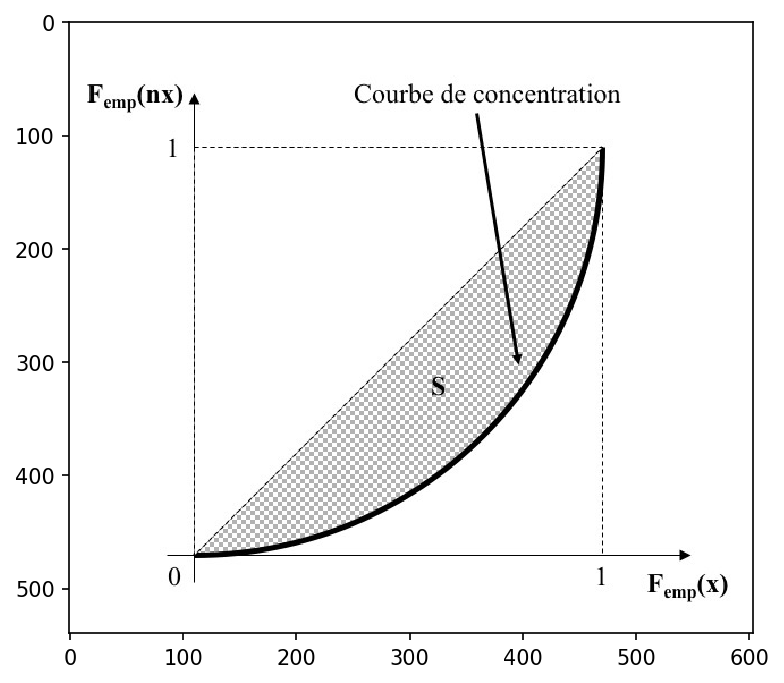

In [109]:
img10=mpimg.imread('gini.jpeg')
height, width, _ = img10.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img10)
plt.show()

Plus la distribution du revenu est concentrée, plus la fraction la plus riche de la population reçoit une grande partie des revenus, et plus la fraction la plus pauvre reçoit une petite partie des revenus. À l'inverse, dans une distribution du revenu parfaitement égalitaire, 10 % de la population reçoit exactement 10 % des revenus totaux.

In [110]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.72043868137391853

Les mesures de concentration permettent d'évaluer si une variable est également répartie (ou non) entre différents individus.

La courbe de Lorenz permet de représenter la répartition d'une variable au sein d'une population, notamment si elle est égalitaire ou non.

Le coefficient de GINI permet d'évaluer de façon chiffrée cette répartition. Il correspond à deux fois l'aire sous la courbe de Lorenz.

On arrive à la fin de cette partie sur l'analyse univariée ! Avant de commencer la prochaine partie, n'oubliez pas de valider vos acquis avec le quiz. ;)

Vous êtes maintenant capable d’étudier toutes les variables l’une après l’autre. Bravo, vous êtes donc un pro de l’analyse univariée.

J’ai étudié toutes les variables, c'est tout bon ! Mais alors pourquoi il reste des chapitres à ce cours ? :o

Eh bien non, ce n’est pas fini. Dans cette troisième partie, nous allons étudier les relations entre deux variables. C’est l’analyse bivariée. Pour certains chapitres, il faudra vous accrocher. Mais si vous êtes arrivé jusqu'ici, vous ne devriez normalement pas avoir trop de soucis. De plus, c'est à partir d'ici que l'analyse des relevés de comptes devient intéressante !

### Analyse bivariée

Pourquoi étudier les relations entre variables ?

Petit exemple. Vous travaillez pour un site web de e-commerce. Vous avez accès à la base de données des clients du site, ainsi qu'aux données de navigation sur le site. Grâce aux données de navigation, vous pouvez savoir quel client a consulté quelle page sur le site, combien de temps il a passé sur chaque page, etc. Dans le but de créer un algorithme de recommandation (qui proposera de nouveaux produits aux clients), vous décidez de faire une petite étude préliminaire.

Grâce aux données de navigation, vous pouvez sélectionner un échantillon de clients qui consultent souvent les derniers albums musicaux de variété française. Vous décidez alors de déterminer l'intérêt qu'ils portent au nouvel album d'un chanteur populaire, en modélisant cet intérêt par un score allant de 0 à 10 sur une échelle continue :

Si un client donné n'a jamais visité la page qui présente ce nouvel album, vous lui attribuez le score intermédiaire de 5.

S'il a souvent visité la page de cet album, qu'il y est resté longtemps, et qu'il a finalement acheté l'album, vous lui attribuez le score de 10. 

Au contraire, s'il a consulté la page, qu'il n'y est pas resté longtemps, et qu'il n'a pas acheté l'album lors de sa dernière commande sur le site, alors c'est qu'il semble ne pas aimer ce nouvel album. Vous lui attribuez donc le score de 0. 

Vous connaissez l'âge de chaque client. Vous obtenez donc un échantillon de clients caractérisés par 2 variables : l'âge et le niveau d'intérêt.

Vous décidez donc d'étudier ces 2 variables séparément, avec des histogrammes :

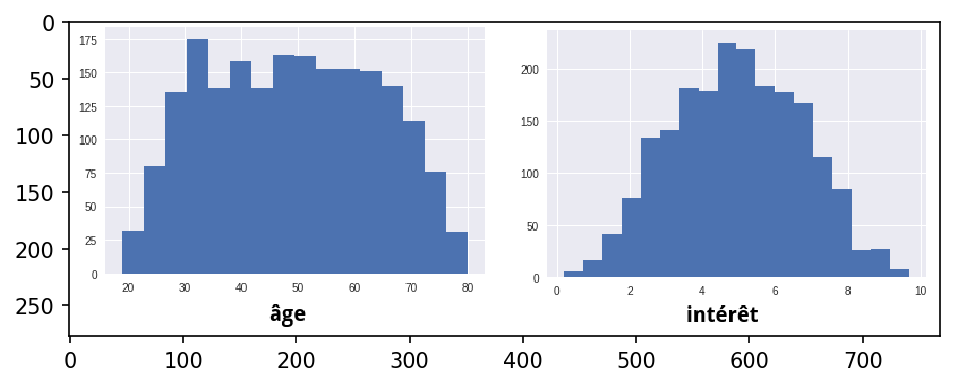

In [111]:
img11=mpimg.imread('age.png')
height, width, _ = img11.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img11)
plt.show()

Ces histogrammes montent que les âges sont assez bien répartis sur cet échantillon : il y a à peu près autant de personnes jeunes que de personnes plus âgées. Quant au niveau d'intérêt, il y a également autant de personnes qui s'intéressent au nouvel album que de personnes qui n'y portent pas d'intérêt.

Bon. C’est déjà bien de savoir cela, mais nous allons voir que nous pouvons faire beaucoup mieux !

Maintenant, plaçons sur un graphique en 2 dimensions les individus de notre échantillon. Chaque point de ce graphique représente une personne. La position de chaque point peut être repérée selon 2 axes : l’axe des abscisses (horizontal), et l’axe des ordonnées (vertical). L’abscisse d’un point, c’est un nombre. Si ce nombre est grand, alors ce point sera très à droite du graphique, mais s’il est proche de 0, alors il sera très à gauche. C’est pareil pour l’ordonnée du point : si elle est élevée, le point sera très haut, mais si elle est proche de 0, le point sera très bas.

Ici, on place la variable âge en abscisse et celle du niveau d'intérêt en ordonnée. Un point qui sera en haut à droite représentera donc une personne plutôt âgée très intéressée par le nouvel album. Au contraire, un point qui sera en bas à gauche représentera une personne jeune n'aimant pas l'album.

En fait, plusieurs cas sont possibles. Voici 2 exemples un peu extrêmes :

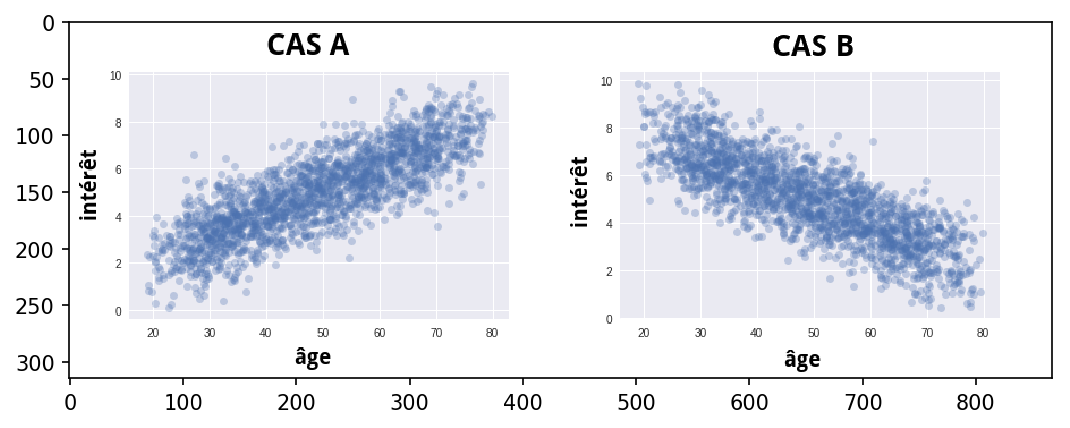

In [112]:
img12=mpimg.imread('age2.png')
height, width, _ = img12.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img12)
plt.show()

Dans le cas A, beaucoup de personnes âgées aiment ce nouvel album, et beaucoup de personnes jeunes ne l'aiment pas. Ainsi, votre algorithme de recommandation devra conseiller ce nouvel album aux personnes plutôt âgées, et ne pas le recommander aux personnes jeunes (mieux vaudra leur proposer des produits qu'elles sont plus susceptibles d'aimer).

Dans le cas B, c’est l’inverse. Il faut conseiller cet album aux personnes jeunes et ne pas le faire pour les personnes âgées.

Chacun de ces 2 graphiques est appelé diagramme de dispersion ou scatterplot, en anglais.

Vous l’aurez compris, on obtient en général beaucoup plus d’informations en étudiant les relations entre 2 variables qu’en étudiant séparément 2 variables ! Sans l’analyse bivariée, vous auriez été incapable de savoir à qui recommander (ou non) l'album !

Ici, étudier la relation entre les 2 variables, c’est se poser la question suivante : "Sachant qu’une personne est plutôt jeune (ou plutôt âgée), a-t-elle plus de chances d’aimer ce nouvel album ?"

#### Autre exemple

Un autre exemple : un célèbre site de formations en ligne publie des cours, dans lesquels les étudiants doivent répondre à des quiz. Pour réussir un quiz, il faut 70 % de réponses correctes. Pour un quiz de 8 questions, il faut donc répondre correctement à au moins 6 questions pour réussir.

L’échantillon des étudiants ayant répondu au quiz est un échantillon à 8 variables. Elles sont toutes binaires (réponse bonne/réponse fausse). Pour l’un des quiz du cours intitulé Initiez-vous à l’algèbre relationnelle avec SQL, voici ces 8 variables représentées :

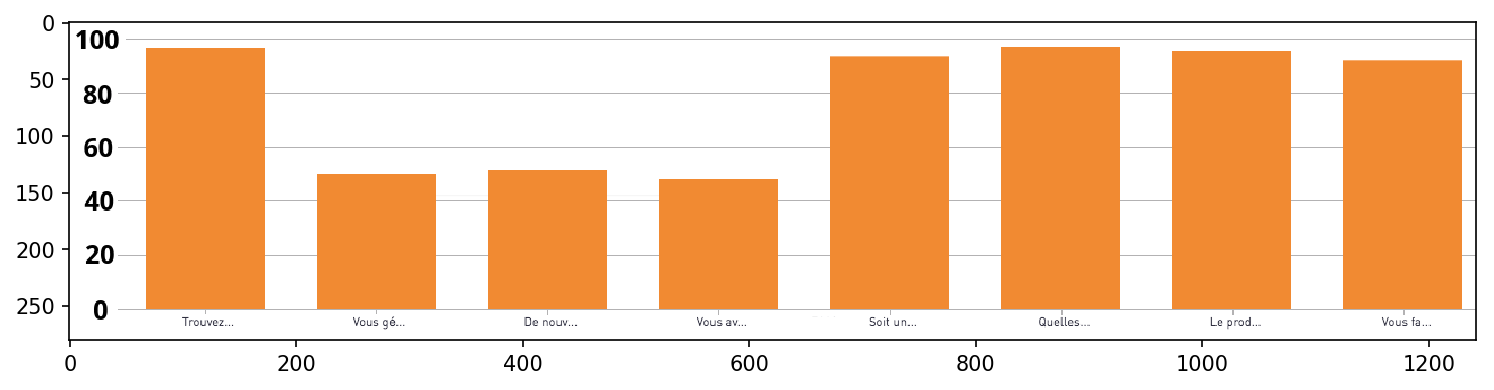

In [113]:
img13=mpimg.imread('questions.png')
height, width, _ = img13.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img13)
plt.show()

Considérons que ces 8 questions sont numérotées de 1 à 8, de gauche à droite.

5 questions sur 8 ont un taux de réussite proche de 100 %. Les 3 autres questions ont un taux de réussite proche de 50 %. Ce graphique montre 8 analyses univariées. Mais ici, il nous faudrait étudier les relations entre ces variables. En effet, parmi les 50 % d’étudiants qui ont raté la question 2, je ne sais pas combien ont réussi la question 3, et c’est problématique car :

Si les 50 % qui ont raté la question 2, les 50 % qui ont raté la 3, et les 50 % qui ont raté la 4 sont les mêmes étudiants, alors cela signifie que 50 % d’étudiants au total ont raté le test (avec chacun 3 réponses fausses). Le taux de réussite globale au test est donc de 50 %, et il faudrait alors simplifier l’énoncé du quiz.

Si cependant les 50 % qui ont raté la question 2 sont tous parmi les 50 % qui ont réussi la question 3, alors ceux-ci auront probablement tous réussi le quiz (quel que soit leur résultat à la question 4, ils auront presque tous un score global de 6/8 ou 7/8). Ainsi, le taux de réussite globale du quiz sera proche de 100 %, ce qui est un bon taux !

Ici, étudier les relations entre les variables, c’est se demander par exemple : "Sachant qu’un individu a eu faux à la question 2, a-t-il de grandes chances d’avoir répondu faux, ou vrai, à la question 3 ?"

En résumé
L'analyse bivariée est une analyse menée entre deux variables.

Elle permet d'établir des recommandations métier pertinentes sur les individus à partir de la compréhension du comportement d'une variable par rapport à une autre.

 Commençons l'analyse bivariée par la recherche des corrélations dans le chapitre suivant ! Vous êtes prêt ?

### Correlation

Vous l’aurez compris, étudier les relations entre les variables, c’est important.

Pour être plus formel, la notion de relation entre variables est appelée corrélation. Dire que deux variables sont corrélées signifie que si on connaît la valeur d’une variable, alors il est possible d’avoir une indication (plus ou moins précise) sur la valeur d’une autre variable.

Dans le chapitre précédent, on étudiait déjà des corrélations, en se posant la question : connaissant l'âge d'un individu, peut-on avoir une indication plus précise de la valeur de la variable "intérêt pour un album donné" ?

#### Causalité

Dès que l’on parle de corrélation, il y a une erreur, très fréquente, à ne JAMAIS commettre : celle de dire qu’il y a un lien de cause à effet d’une variable sur l’autre.

S’il y a corrélation entre une variable A
 et une variable B
 , est-ce A
 qui est la cause de B
 , ou B
 qui est la cause de A
 ? Il est souvent impossible de le savoir sans effectuer une expérimentation. Le plus souvent, c’est un troisième (ou plusieurs) facteur C
 (qui n’est d’ailleurs pas toujours observé) qui est la cause de A
 et de B .

Il est aussi possible que 2 variables soient corrélées sans qu’il n’y ait aucun lien entre elles. On les appelle les corrélations fallacieuses (spurious correlations, en anglais).

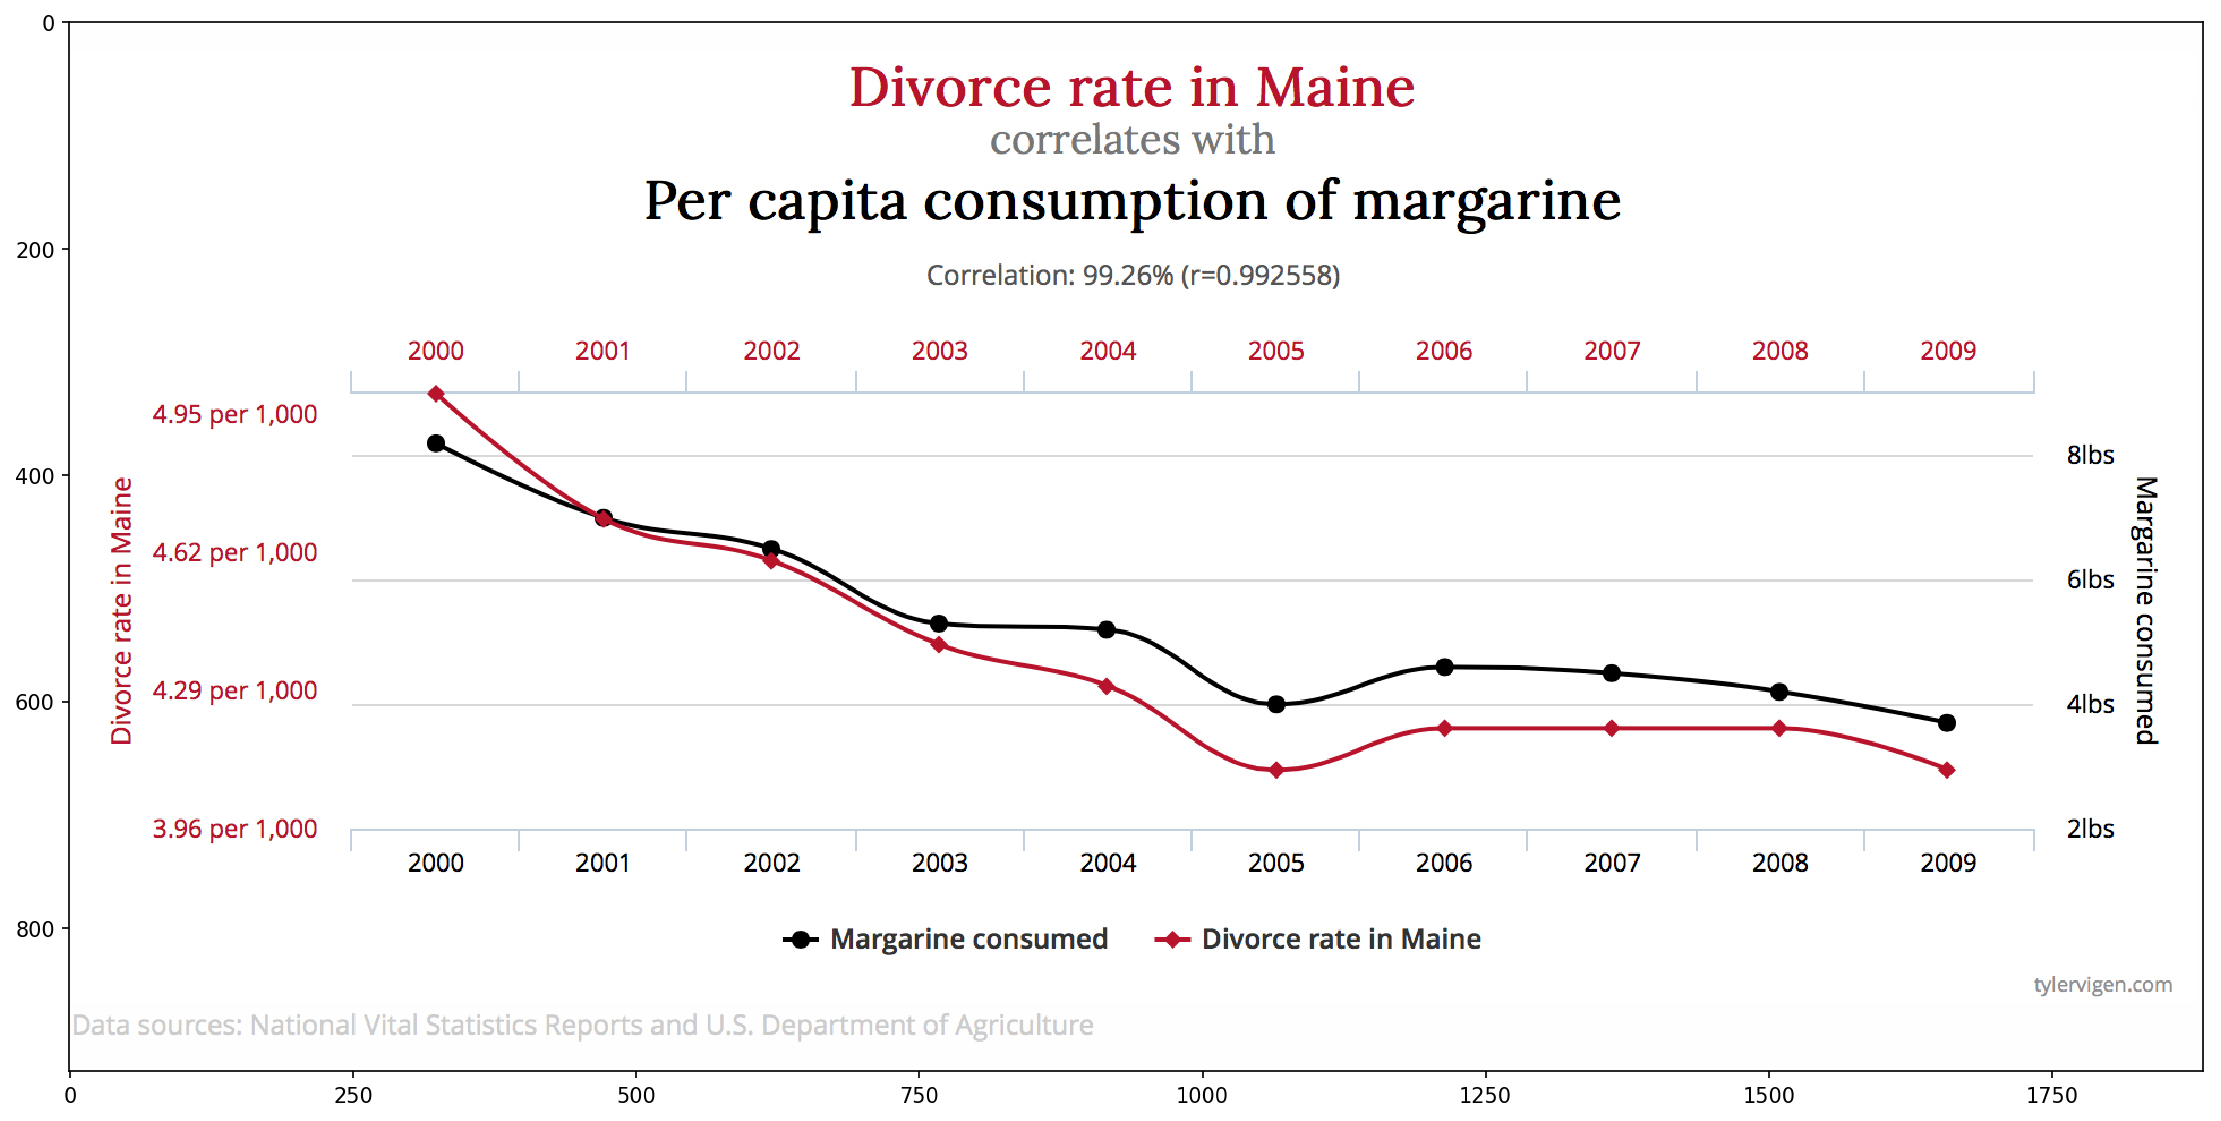

In [114]:
img14=mpimg.imread('corr.jpeg')
height, width, _ = img14.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img14)
plt.show()

Pour en voir d’autres, rendez-vous sur ce site (en anglais). Certaines sont amusantes !

En fait, pour avoir le droit d’établir un lien de cause à effet entre des variables, il faut construire une expérimentation qui respecte certaines conditions. Ces conditions ne sont en général pas vérifiées lorsque votre échantillon ne provient pas de cette expérimentation conçue spécialement.

Si vous aimez les paradoxes mathématiques, il y en a un qui traite du lien de cause à effet, c’est le paradoxe de Simpson. Tout bon Data Analyst devrait être conscient de ce paradoxe. Une vidéo très bien expliquée et très compréhensible a été réalisée par la superbe chaîne YouTube Science Étonnante.

À la minute 7:58 de cette vidéo, vous apprendrez par exemple que si 2 variables sont corrélées, agir sur la valeur de l'une des variables ne fait pas forcément changer la seconde. ;)

Vous verrez, ce paradoxe vous bluffera !

Comme souvent dans ce cours, je vais une fois de plus faire appel à votre imagination. Il est toujours bon d’avoir de l’imagination.

Aujourd’hui, il vous prend la soudaine envie de faire des statistiques sur les habitants de votre ville. Vous souhaitez connaître leur boisson préférée parmi celles-ci : café, thé, eau, ou autre.

Vous réalisez donc votre enquête en vous rendant dans les cafés pour observer discrètement les clients et noter la boisson qu’ils ont commandée. Vous souhaitez rassembler un échantillon de 100 personnes. Pour chacune d’elle, vous avez noté la boisson commandée et le nom du café dans lequel vous l’avez observée. On appellera ces deux variables nom café et boisson préférée. Voici la distribution que vous obtenez pour la variable boisson préférée :

café : 50 personnes sur 100, soit fcafe
 = 50 % ;

thé : 30 personnes sur 100, soit fthe
 = 30 % ;

autres boissons : 20 personnes sur 100, soit fautre
 = 20 %.

Vous continuez votre enquête en vous rendant dans un café où il y a 10 clients. Combien de personnes vous attendez-vous à voir face à un thé ?

Intuitivement, vous vous attendez à trouver 3 personnes qui ont commandé un thé car vous savez qu’en général, 30 % des personnes commandent un thé. Vous avez donc réalisé le calcul suivant : 30%*10 = 3. De même, vous vous attentez à voir 5 personnes avec un café, et 2 personnes avec d’autres boissons.

À votre grande surprise, il y a en fait 9 personnes avec du thé, et seulement 1 avec un café ! Cela diffère beaucoup de ce à quoi vous vous attentiez : il y a 90 % de personnes qui boivent du thé. C'est peut-être un hasard, alors vous décidez de revenir régulièrement pour savoir si ce 90 % se confirme de jour en jour ou pas. Effectivement, ce pourcentage reste à peu près constant même après de nombreuses observations !

Mais vous comprenez vite pourquoi en regardant le nom du café : "Salon de thé Chez Luc". Vous êtes dans un café un peu spécial : c’est un salon de thé ! Les clients qui fréquentent cet endroit sont donc principalement des amateurs de thé.

On dit alors que le fait d’aimer le thé et le fait de fréquenter le salon de thé Chez Luc ne sont pas indépendants. Si deux événements ne sont pas indépendants, alors on s’attend à trouver une corrélation entre ceux-ci. Vous souvenez-vous de la question que l'on se pose pour les corrélations : Sachant que l'on connaît la valeur d'une variable, peut-on avoir une indication un peu plus précise sur la valeur d'une autre variable ?

Sachant qu’une personne fréquente le café Salon de thé Chez Luc, peut-on avoir une indication un peu plus précise sur sa boisson préférée ?

La réponse est oui ! Sans connaître la valeur de la variable nom café, alors on suppose que la variable boisson préférée suivra cette distribution : 50 % pour le café, 30 % pour le thé et 20 % pour les autres boissons. MAIS, si on connaît la valeur de la variable nom café (ici : Salon de thé Chez Luc), alors on peut avoir une meilleure indication sur la variable boisson préférée ; ici on s'attendra à trouver bien plus que 30%*10=3 personnes devant une tasse de thé.

Appelons I
 l'événement "préférer le thé" et J
 l'événement "être au salon de thé Chez Luc". Voici ce qu'il faut retenir :

Si deux événements I
 et J
 sont indépendants, alors on s'attend à ce que le nombre d'individus qui satisfont à la fois I
 et J
 (appelons ce nombre nij
 ) soit égal à fi∗nj
 (c'est le calcul que vous aviez fait en entrant dans le bar : 30%*10=3). Au contraire, plus nij
 sera différent de fi∗nj
 , plus on aura de raison de penser que I
 et J
 ne sont pas indépendants.

Quand vous avez vu que nab
 était en fait égal à 9, vous vous êtes dit que le fait d'être au salon de thé Chez Luc n'était pas indépendant du fait d'aimer le thé

#### Tableau en contingence

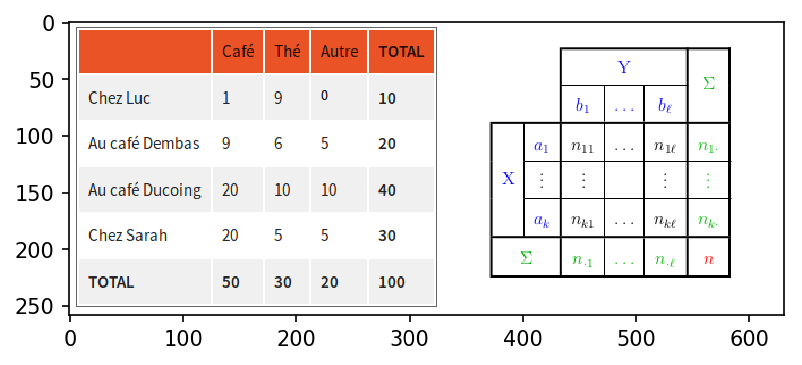

In [115]:
img15=mpimg.imread('cont.png')
height, width, _ = img15.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img15)
plt.show()

Chacune des valeurs du tableau de contingence (hors colonnes TOTAL) est appelée effectif conjoint nij
 .

L'ensemble effectifs conjoints est appelé distribution conjointe empirique de (nom café, boisson préférée).

La dernière ligne (TOTAL) est appelée distribution marginale empirique de boisson préférée, et la dernière colonne (TOTAL) est appelée distribution marginale empirique de nom café.

L'ensemble des effectifs conjoints de la première ligne (Chez Luc) est appelé distribution conditionnelle empirique de boisson préférée étant donné que nom café = Chez Luc.


**Jusqu'à maintenant, nous avons vu 2 manières de présenter des données en analyse bivariée : le diagramme de dispersion (scatterplot), et le tableau de contingence.**

**La première est adaptée quand les 2 variables sont quantitatives, et la seconde est adaptée quand les 2 variables sont qualitatives.**

### Représentez la relation entre deux variables quantitatives

#### Le diagramme de dispersion

Posons-nous la question suivante :

Êtes-vous moins dépensier lorsque vous avez peu d'argent sur votre compte ?

Vous l'aurez deviné, les 2 variables à étudier sont : montant et solde_avt_operation. Rechercher une corrélation entre ces variables revient à dire : "Sachant que le solde de votre compte est petit, peut-on s'attendre à ce que le montant de l'opération soit lui aussi petit ?" (ou l'inverse).

Je vous invite donc à tracer le diagramme de dispersion entre le solde avant opération et le montant des dépenses, et analyser ce qui en ressort.

Si vous avez correctement réussi à tracer le graphique (pas de panique si ce n'est pas le cas : vous trouverez un exemple de code dans le notebook joint ^^), les points sont assez dispersés et nombreux :  il est donc difficile d'y voir très clair. C'est souvent le cas, lorsque l'on travaille avec des jeux de données comportant de nombreux individus. Pour remédier à cela, il existe une représentation qui peut s'avérer plus adéquate.

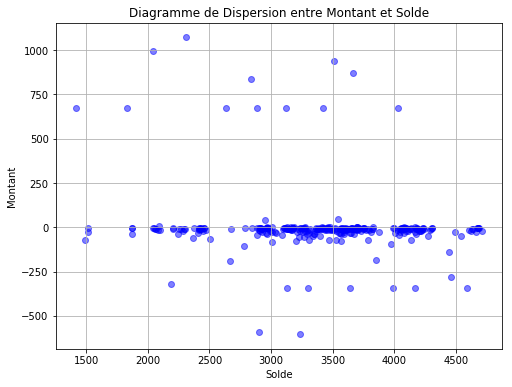

In [117]:
# Supposons que 'data' est votre DataFrame contenant les données
# Assurez-vous que 'montant' et 'solde' sont des colonnes dans votre DataFrame

plt.figure(figsize=(8, 6))  # Définit la taille de la figure (facultatif)

# Tracer le scatterplot
plt.scatter(data['solde_avt_ope'], data['montant'], alpha=0.3, color='blue')

# Ajouter des labels et un titre
plt.ylabel('Montant')
plt.xlabel('Solde')
plt.title('Diagramme de Dispersion entre Montant et Solde')

# Afficher la grille (facultatif)
plt.grid(True)

# Afficher le plot
plt.show()


Pour tracer un diagramme de dispersion (scatterplot) entre deux variables, telles que 'montant' et 'solde', vous pouvez utiliser Python avec la bibliothèque matplotlib. Voici comment procéder :

Assurez-vous d'avoir importé les bibliothèques nécessaires :

```python
import matplotlib.pyplot as plt
import pandas as pd
```

Supposons que vous avez un DataFrame appelé `data` qui contient vos données, et vous voulez tracer un scatterplot entre les colonnes 'montant' et 'solde'. Voici le code pour cela :

```python
# Supposons que 'data' est votre DataFrame contenant les données
# Assurez-vous que 'montant' et 'solde' sont des colonnes dans votre DataFrame

plt.figure(figsize=(8, 6))  # Définit la taille de la figure (facultatif)

# Tracer le scatterplot
plt.scatter(data['montant'], data['solde'], alpha=0.5, color='blue')

# Ajouter des labels et un titre
plt.xlabel('Montant')
plt.ylabel('Solde')
plt.title('Diagramme de Dispersion entre Montant et Solde')

# Afficher la grille (facultatif)
plt.grid(True)

# Afficher le plot
plt.show()
```

#### Explication du code :

1. **Import des bibliothèques :**
   - `matplotlib.pyplot` est utilisé pour tracer des graphiques.
   - `pandas` est utilisé pour gérer les données sous forme de DataFrame.

2. **Définition de la figure :**
   ```python
   plt.figure(figsize=(8, 6))
   ```
   - Définit la taille de la figure du graphique. Cette ligne est facultative et peut être ajustée selon vos besoins.

3. **Tracé du scatterplot :**
   ```python
   plt.scatter(data['montant'], data['solde'], alpha=0.5, color='blue')
   ```
   - `plt.scatter()` trace le diagramme de dispersion. `data['montant']` et `data['solde']` sont les variables que vous voulez comparer.
   - `alpha=0.5` définit la transparence des points (0 = transparent, 1 = opaque).
   - `color='blue'` définit la couleur des points du scatterplot.

4. **Ajout de labels et de titre :**
   ```python
   plt.xlabel('Montant')
   plt.ylabel('Solde')
   plt.title('Diagramme de Dispersion entre Montant et Solde')
   ```
   - `plt.xlabel()` et `plt.ylabel()` ajoutent des labels aux axes x et y respectivement.
   - `plt.title()` ajoute un titre au graphique.

5. **Affichage de la grille :**
   ```python
   plt.grid(True)
   ```
   - `plt.grid(True)` ajoute une grille au graphique. Cette ligne est facultative.

6. **Affichage du plot :**
   ```python
   plt.show()
   ```
   - `plt.show()` affiche le graphique.

En utilisant ce code, vous pouvez visualiser le diagramme de dispersion entre les variables 'montant' et 'solde' de votre DataFrame `data`. Assurez-vous que vos données sont correctement chargées dans `data` et que les noms de colonnes ('montant' et 'solde') correspondent à vos données réelles.

#### Une alternative au diagramme de dispersion

Pour découper la variable quantitative 'solde' en 7 tranches et créer un boxplot pour la variable 'montant' pour chaque tranche, vous pouvez suivre ces étapes en utilisant Python avec les bibliothèques matplotlib et pandas :

Assurez-vous d'avoir importé les bibliothèques nécessaires :

```python
import matplotlib.pyplot as plt
import pandas as pd
```

Supposons que vous avez un DataFrame appelé `data` qui contient vos données, avec les colonnes 'montant' et 'solde'. Voici comment procéder :

### Découper 'solde' en 7 tranches (quantiles) :

```python
# Supposons que 'data' est votre DataFrame contenant les données
# Assurez-vous que 'solde' est une colonne dans votre DataFrame

# Calcul des quantiles pour découper 'solde' en 7 tranches
data['solde_quantiles'] = pd.qcut(data['solde'], q=7, labels=False)

# q=7 spécifie le nombre de quantiles (tranches) à créer
# labels=False pour indiquer que nous voulons utiliser des indices numériques pour les tranches

# Afficher les quantiles (facultatif)
print(data['solde_quantiles'].unique())
```

### Créer un boxplot pour chaque tranche de 'solde' :

```python
# Tracer un boxplot pour chaque tranche de 'solde'

plt.figure(figsize=(10, 6))  # Définit la taille de la figure (facultatif)

# Tracer le boxplot
data.boxplot(column='montant', by='solde_quantiles', figsize=(10, 6))

# Ajouter des labels et un titre
plt.xlabel('Tranches de Solde')
plt.ylabel('Montant')
plt.title('Boxplot de Montant pour chaque Tranche de Solde')

# Afficher le plot
plt.show()
```

### Explication du code :

1. **Calcul des quantiles :**
   ```python
   data['solde_quantiles'] = pd.qcut(data['solde'], q=7, labels=False)
   ```
   - `pd.qcut()` découpe la colonne 'solde' en 7 tranches (quantiles) égales.
   - `q=7` spécifie le nombre de tranches.
   - `labels=False` indique que les tranches seront numérotées de manière séquentielle.

2. **Tracé du boxplot :**
   ```python
   data.boxplot(column='montant', by='solde_quantiles', figsize=(10, 6))
   ```
   - `data.boxplot()` trace un boxplot de la colonne 'montant'.
   - `column='montant'` spécifie la variable pour laquelle le boxplot est tracé.
   - `by='solde_quantiles'` divise les données en groupes basés sur les tranches de 'solde_quantiles'.
   - `figsize=(10, 6)` définit la taille du graphique.

3. **Ajout de labels et de titre :**
   ```python
   plt.xlabel('Tranches de Solde')
   plt.ylabel('Montant')
   plt.title('Boxplot de Montant pour chaque Tranche de Solde')
   ```
   - `plt.xlabel()` et `plt.ylabel()` ajoutent des labels aux axes x et y respectivement.
   - `plt.title()` ajoute un titre au graphique.

4. **Affichage du plot :**
   ```python
   plt.show()
   ```
   - `plt.show()` affiche le graphique.

En utilisant ce code, vous pouvez visualiser la distribution du 'montant' pour chaque tranche de 'solde' découpée en 7 quantiles. Assurez-vous que vos données sont correctement chargées dans `data` et que les noms de colonnes ('montant' et 'solde') correspondent à vos données réelles.

In [121]:
# Calcul des quantiles pour découper 'solde' en 7 tranches
data['solde_quantiles'] = pd.qcut(data['solde_avt_ope'], q=7, labels=False)

# Afficher la description statistique de chaque tranche
quantiles_description = data.groupby('solde_quantiles')['solde_avt_ope'].describe()
print(quantiles_description)


                 count         mean         std      min        25%       50%  \
solde_quantiles                                                                 
0                 44.0  2196.643864  304.404241  1416.81  2054.2650  2277.845   
1                 44.0  2960.463636   97.986687  2676.69  2907.0425  2963.705   
2                 44.0  3222.465909   63.947274  3128.23  3170.5900  3222.325   
3                 44.0  3455.564773   62.649358  3351.80  3409.1300  3452.465   
4                 44.0  3637.905455   45.565101  3564.74  3595.9475  3645.170   
5                 44.0  3941.578636  141.929504  3709.28  3793.9775  4000.170   
6                 44.0  4352.485227  209.273342  4121.67  4181.1000  4239.230   

                       75%      max  
solde_quantiles                      
0                2424.0600  2664.21  
1                3010.6925  3127.43  
2                3273.3400  3349.57  
3                3507.9650  3563.87  
4                3676.4075  3708.06  
5   

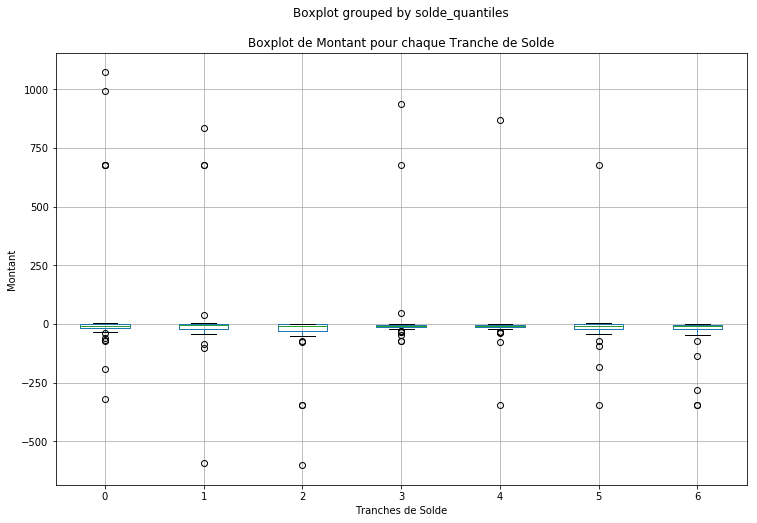

In [131]:
# Charger les données et calculer les quantiles si nécessaire
# Assurez-vous d'avoir 'montant' et 'solde_quantiles' dans votre DataFrame

# Tracer un boxplot pour chaque tranche de 'solde'

# Tracer le boxplot avec figsize spécifié
data.boxplot(column='montant', by='solde_quantiles', figsize=(12, 8))

# Ajouter des labels et un titre
plt.xlabel('Tranches de Solde')
plt.ylabel('Montant')
plt.title('Boxplot de Montant pour chaque Tranche de Solde')

# Afficher le plot
plt.show()


In [134]:


# Calculer les quantiles pour découper 'solde' en tranches de 500
data['solde_tranches'] = pd.cut(data['solde_avt_ope'], bins=range(1500, 4501, 500), labels=False)

# Afficher la description statistique de chaque tranche
tranches_description = data.groupby('solde_tranches')['solde_avt_ope'].describe()
print(tranches_description)


                count         mean         std      min        25%      50%  \
solde_tranches                                                                
0.0               6.0  1745.376667  179.407267  1513.81  1594.5925  1850.62   
1.0              33.0  2286.858182  149.776556  2040.36  2191.5800  2305.15   
2.0              34.0  2884.820882  112.509029  2508.62  2886.1000  2916.37   
3.0              89.0  3273.873371  135.494935  3009.16  3163.9300  3268.79   
4.0              78.0  3673.191026  114.809031  3507.94  3589.9975  3657.58   
5.0              53.0  4161.146792  109.846528  4005.47  4078.9200  4143.24   

                      75%      max  
solde_tranches                      
0.0             1869.9400  1871.58  
1.0             2423.5800  2473.41  
2.0             2964.1125  2991.24  
3.0             3397.5700  3494.88  
4.0             3726.3575  3994.87  
5.0             4218.2400  4490.46  


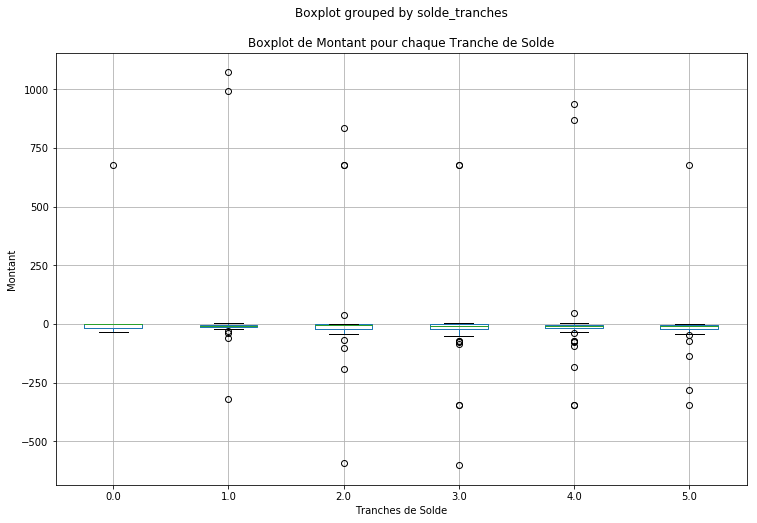

In [135]:
# Charger les données et calculer les quantiles si nécessaire
# Assurez-vous d'avoir 'montant' et 'solde_quantiles' dans votre DataFrame

# Tracer un boxplot pour chaque tranche de 'solde'

# Tracer le boxplot avec figsize spécifié
data.boxplot(column='montant', by='solde_tranches', figsize=(12, 8))

# Ajouter des labels et un titre
plt.xlabel('Tranches de Solde')
plt.ylabel('Montant')
plt.title('Boxplot de Montant pour chaque Tranche de Solde')

# Afficher le plot
plt.show()


#### REDO

Text(0,0.5,'montant de dépense')

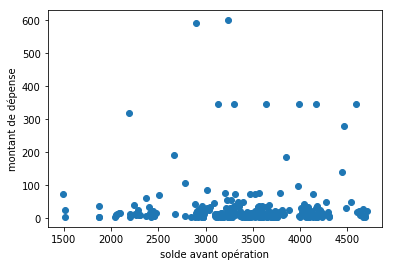

In [140]:
depenses=data[data.montant<0]#on stocke dans dépense les individus dans data négatifs 
plt.plot(depenses['solde_avt_ope'],-depenses['montant'],'o')#on construit le graphe
plt.xlabel("solde avant opération")
plt.ylabel("montant de dépense")

In [149]:
taille_classe = 500 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(depenses["solde_avt_ope"]), taille_classe)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(depenses["solde_avt_ope"], tranches) # associe chaque solde à son numéro de classe

numpy.arange([start, ]stop, [step, ]dtype=None, *, device=None, like=None)
Return evenly spaced values within a given interval.

arange can be called with a varying number of positional arguments:

arange(stop): Values are generated within the half-open interval [0, stop) (in other words, the interval including start but excluding stop).

arange(start, stop): Values are generated within the half-open interval [start, stop).

arange(start, stop, step) Values are generated within the half-open interval [start, stop), with spacing between values given by step.

For integer arguments the function is roughly equivalent to the Python built-in range, but returns an ndarray rather than a range instance.

When using a non-integer step, such as 0.1, it is often better to use numpy.linspace.

See the Warning sections below for more information.

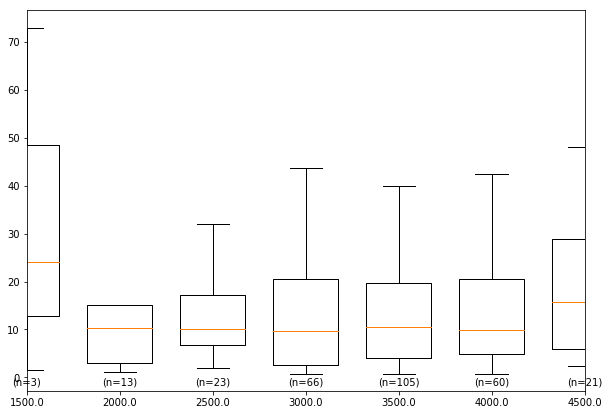

In [150]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = -depenses.loc[indices==ind,"montant"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

Pour calculer le coefficient de Pearson et la covariance, 2 lignes suffisent !

In [156]:
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])
data['montant'].corr(data['solde_avt_ope'], method='pearson')

484.959541545


-0.16728549695360867



C'est bien beau les graphiques, mais je sens que vous êtes en manque de calcul ! Il nous faut un indicateur numérique qui puisse nous dire si les variables sont corrélées ou pas.

Ici, on veut savoir si quand on a un solde $X$ petit, on a aussi un montant $Y$ petit. Mais petit par rapport à quoi ? Ici, quand on dit "petit", c'est par rapport aux autres valeurs, donc on veut dire "plus petit que la moyenne". Prenons une opération bancaire (= un individu) au hasard, et notons $x$ la valeur du solde avant opération, et $y$ le montant de l'opération. Pour mesurer si $x$ est plus petit que la moyenne $\overline{x}$, on peut calculer :

$[ x - \overline{x} ]$

Cette quantité sera négative si $x$ est inférieur à $\overline{x}$, et positive dans le cas contraire. De même, on peut calculer $(y - \overline{y})$ pour comparer $y$ à la moyenne $\overline{y}$. Maintenant, multiplions-les !

$a = (x - \overline{x})(y - \overline{y}) $

Si $x$ est plus petit que la moyenne et que $y$ est plus petit que la moyenne, alors les deux termes seront négatifs. Quand on multiplie deux nombres négatifs, on obtient un nombre positif. C'est aussi valable dans l'autre sens : si $x$ est supérieur à la moyenne et $y$ aussi, alors $a$ sera aussi un nombre positif.

OK, avec cette multiplication, on obtient la quantité $a$ pour une seule opération bancaire (un seul individu). Mais si les montants sont vraiment petits quand le solde est petit (et inversement), alors les $a$ de toutes les opérations seront positifs ! Et si on fait la moyenne de tous ces $a$, alors on obtiendra encore un nombre positif. La moyenne de tous ces $a$ s'écrit comme ceci :

$s_{X,Y} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y}) $

Au contraire, s'il n'y a pas de corrélation entre le solde et le montant, alors quand $x$ sera petit, $y$ ne sera pas forcément petit. $y$ sera parfois petit, parfois grand, donc $(y - \overline{y})$ sera tantôt positif, tantôt négatif. Ainsi, $a$ sera elle aussi tantôt positive, tantôt négative. Au final, la moyenne de tous les $a$ sera proche de 0.

Résumons : Si $x$ est petit quand $y$ est petit (et inversement), alors $s_{X,Y}$ sera positif. Si $X$ et $Y$ ne sont au contraire pas corrélés, $s_{X,Y}$ sera plutôt proche de 0. Pour les motivés, vous pouvez aussi déduire que si $x$ est grand quand $y$ est petit (et inversement), alors $s_{X,Y}$ sera négatif. Dans ce dernier cas, il y a corrélation certes, mais on dit que c'est une corrélation négative.



#### La covariance empirique et le coefficient de corrélation

Voici le texte modifié avec les notations en dollar pour Jupyter Notebook :

---

Devinez quoi ! L'indicateur que nous venons de construire est très utilisé en statistiques ; il s'appelle la **covariance empirique de $X$ et $Y$**. Ce terme vous rappelle la variance empirique ? C'est normal : elles sont similaires. Effectivement, si vous calculez la covariance empirique de $X$ et $X$, vous retombez sur la formule de la variance empirique de $X$, qui s'écrit :

$s^2_X = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline{x})^2 $

Magique !

Très rapidement, voici deux propriétés de la covariance empirique :

1. $ s_{X,Y} = s_{Y,X} $. C'est la propriété de symétrie.
2. Si on crée une nouvelle variable $Z$ à partir de 2 variables $U$ et $V$ dont on connaît la covariance empirique, et que $Z = aU + bV$, alors $ s_{X,Z} = a s_{X,U} + b s_{X,V} $. C'est la propriété de bilinéarité.

Pour ramener la covariance empirique à une valeur qui soit comprise entre -1 et 1, alors on peut la diviser par le produit des écarts-types. Cette normalisation nous permet de faire des comparaisons. Ce qui nous donne :

$ r_{X,Y} = \frac{s_{X,Y}}{s_X s_Y} $

Ce coefficient $r$ est appelé **coefficient de corrélation**, ou **coefficient de corrélation linéaire**, ou encore **coefficient de corrélation de Pearson**.

Pourquoi "linéaire" ?

Parce que malheureusement, il ne détecte les relations que lorsqu'elles sont linéaires, c'est-à-dire lorsque les points sont plutôt bien alignés sur une ligne droite. Sur le graphique ci-dessous, les deux schémas du haut montrent des points bien alignés : leur $r$ est donc proche de 1 ou de -1. Sur le 4e graphique en revanche, il n'y a pas vraiment de corrélation (connaître la valeur du $x$ d'un point ne nous donne aucune indication sur la valeur de $y$) : $r$ est donc proche de 0. Cependant sur le 3e graphique, il y a une forte corrélation, mais sa forme n'est pas linéaire, et $r$ est donc malheureusement proche de 0.

---
---

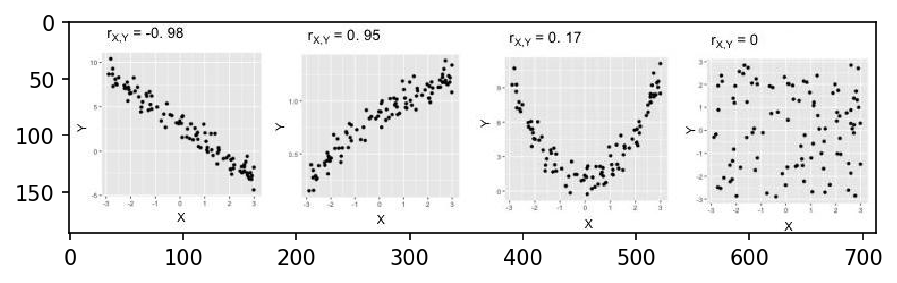

In [157]:
img16=mpimg.imread('corr2.jpeg')
height, width, _ = img16.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img16)
plt.show()

In [158]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(depenses["solde_avt_ope"],-depenses["montant"])[0])
print(np.cov(depenses["solde_avt_ope"],-depenses["montant"],ddof=0)[1,0])

0.0100688191338
484.959541545


Le coefficient de corrélation linéaire se calcule grâce à la méthode  st.pearsonr. On lui donne ensuite les 2 variables à étudier.

Remarquez que dans ce chapitre, on préfère ramener les dépenses en montants positifs, d'où le signe  -  devant  depenses["montant"].

Un couple de valeurs est renvoyé, le coefficient de corrélation est la premier élément de ce couple, d'où le  [0]  à la fin de la ligne 4.

La méthode  np.cov  renvoie la matrice de covariance, que vous n'avez pas à connaître à ce niveau. Cette matrice est en fait un tableau, et dans ce dernier, c'est la valeur située sur la 2e ligne à la 1e colonne, d'où le  [1,0].

Il est intéressant de faire une représentation graphique pour avoir un aperçu visuel d'une corrélation.

Le graphique le plus adapté dans le cas de deux variables quantitatives est un diagramme de dispersion, qui n'est autre qu'un nuage de points (ou scatter plot, en anglais).

Le coefficient de corrélation de Pearson ou coefficient de corrélation linéaire permet de compléter numériquement l'analyse de la corrélation.

Ce dernier n'est pertinent que pour évaluer une relation linéaire. Il prend des valeurs entre -1 et 1, et le signe du coefficient indique le sens de la relation.

### Analysez deux variables quantitatives par régression linéaire

Nous avons étudié au chapitre précédent la corrélation entre 2 variables quantitatives. Allons un peu plus loin à présent avec 2 autres variables également quantitatives : attente et montant.

La variable attente (que nous allons créer très prochainement) d’une opération donne le nombre de jours écoulés entre celle-ci et la précédente opération de catégorie COURSES. Si vous faites vos courses tous les 7 jours en moyenne, alors la moyenne de attente sera de 7.

Que s’attend-on à trouver ?

En théorie, plus vous attendez pour aller faire les courses, plus vous aurez besoin d’acheter de provisions. On s’attend donc à ce que plus la valeur de attente est grande, plus la valeur du montant soit grande.

$ Y = \overline{x} + \epsilon $

In [159]:
import datetime as dt

# Selection du sous-échantillon
courses = data[data.categ == "COURSES"]

# On trie les opérations par date
courses = courses.sort_values("date_operation")

# On ramène les montants en positif
courses["montant"] = -courses["montant"]

# calcul de la variable attente
r = []
last_date = dt.datetime.now()
for i,row in courses.iterrows():
    days = (row["date_operation"]-last_date).days
    if days == 0:
        r.append(r[-1])
    else:
        r.append(days)
    last_date = row["date_operation"]
courses["attente"] = r
courses = courses.iloc[1:,]

# on regroupe les opérations qui ont été effectués à la même date
# (courses réalisées le même jour mais dans 2 magasins différents)
a = courses.groupby("date_operation")["montant"].sum()
b = courses.groupby("date_operation")["attente"].first()
courses = pd.DataFrame({"montant":a, "attente":b})

Ce code permet de créer une nouvelle variable, appelée "attente", pour mesurer le nombre de jours écoulés entre deux opérations de la catégorie "COURSES". Ensuite, il regroupe les opérations effectuées le même jour. Voici une explication détaillée du processus :

1. **Sélection du sous-échantillon :**
   ```python
   courses = data[data.categ == "COURSES"]
   ```
   Sélectionne uniquement les lignes de données où la catégorie de la transaction est "COURSES".

2. **Tri des opérations par date :**
   ```python
   courses = courses.sort_values("date_operation")
   ```
   Trie les transactions par date croissante.

3. **Ramène les montants en positif :**
   ```python
   courses["montant"] = -courses["montant"]
   ```
   Convertit les montants négatifs en positifs, ce qui est courant pour les opérations de dépense.

4. **Calcul de la variable "attente" :**
   ```python
   r = []
   last_date = dt.datetime.now()
   for i,row in courses.iterrows():
       days = (row["date_operation"]-last_date).days
       if days == 0:
           r.append(r[-1])
       else:
           r.append(days)
       last_date = row["date_operation"]
   courses["attente"] = r
   courses = courses.iloc[1:,]
   ```
   - Initialise une liste `r` pour stocker les valeurs d'attente.
   - `last_date` est initialisé à la date et l'heure actuelles.
   - Pour chaque ligne de la DataFrame triée :
     - Calcule la différence en jours entre la date de l'opération actuelle (`row["date_operation"]`) et `last_date`.
     - Si la différence est de 0 jours (c'est-à-dire que c'est le même jour), utilise la dernière valeur d'attente calculée.
     - Sinon, ajoute le nombre de jours calculé à `r`.
     - Met à jour `last_date` à la date de l'opération actuelle.
   - Associe la liste `r` à une nouvelle colonne `attente`.
   - Supprime la première ligne avec `courses = courses.iloc[1:,]` pour éliminer la première ligne, qui pourrait avoir une attente incorrecte.

5. **Regroupement des opérations par date :**
   ```python
   a = courses.groupby("date_operation")["montant"].sum()
   b = courses.groupby("date_operation")["attente"].first()
   courses = pd.DataFrame({"montant":a, "attente":b})
   ```
   - Regroupe les transactions par date :
     - `a` contient la somme des montants des transactions pour chaque date.
     - `b` contient la première valeur d'attente pour chaque date.
   - Crée une nouvelle DataFrame `courses` à partir des séries `a` et `b`, avec les colonnes "montant" et "attente".

Ce code permet de générer une DataFrame où chaque ligne représente une date d'opération avec le montant total dépensé ce jour-là et le nombre de jours écoulés depuis la dernière opération "COURSES".

### Modélisons !

Mais nous allons faire mieux que cela : calculer le prix moyen des produits que vous consommez en 1 jour, ainsi que la vitesse à laquelle vous accumulez du stock dans vos placards ! Pour cela, nous allons utiliser un modèle. Vous allez voir, c’est très puissant.

Pour le modèle que nous allons créer, nous allons faire plusieurs suppositions. Tout d’abord, nous supposons qu’à chaque fois que vous faites les courses, vous achetez 3 types de produits :

Les produits que vous consommerez avant la prochaine fois que vous irez faire les courses (produits alimentaires, d’hygiène, etc.).

Les produits qui ne seront pas consommés durant la durée de l’étude (la durée de l’étude étant la période entre votre 1er ticket de caisse enregistré dans l’échantillon et le dernier) : ce sont vos stocks de long terme (boîtes de conserves, produits surgelés, etc.).

Les produits qui ne sont pas des consommables (ex. : une fourchette, une serpillière, etc.), que vous n’achetez que très rarement.

Ensuite, nous supposons que vous consommez chaque jour des produits, et que le prix des produits que vous consommez en 1 jour est à peu près constant.

Appelons $a$
 le prix moyen des produits consommés en un jour (ceux de type 1), et $b$
 le prix moyen des produits de types 2 et 3 rassemblés, que vous achetez à chaque course. Enfin, appelons $x$
 le nombre de jours que vous avez attendu depuis vos dernières courses, et y
 le montant du ticket de caisse.

Quel sera le prix de votre prochain ticket de caisse ?

Il sera égal au nombre de jours d’attente multiplié par le prix moyen ce que vous consommez en 1 jour. Mais en plus, il faut ajouter le prix moyen des produits de types 2 et 3. Ceci donne cette formule :

$y=a.x+b$

C'est un peu simpliste ton truc, mon prochain ticket ne vaudra pas exactement ce montant. Je ne consomme pas tous les jours exactement la même somme d'argent, et je n'achète pas à chaque fois la même quantité de stock ! Et imagine que j'aie envie de me faire plaisir en m'achetant des produits plus chers !

C'est vrai, c'est simpliste ! Cette équation n'est pas exacte. D'ailleurs, vous aurez peut-être remarqué qu'il s'agit d'une équation d'une droite (remémorez-vous les fonctions affines). Équation de droite signifie que si je prends tous les $x$
 possibles compris entre (par exemple) 0 et 5, puis que je calcule tous leurs $y$
 associés, avant de les placer sur un graphique avec les $x$
 sur l'axe horizontal et les $y$
 sur l'axe vertical, alors tous les points seront parfaitement alignés ! Essayons donc d'afficher le diagramme de dispersion avec $X = attente$ et $Y = montant$, et regardons si tous les points sont alignés :

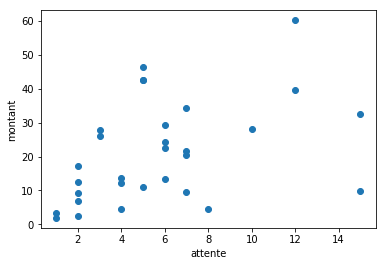

In [160]:
plt.plot(courses['attente'],courses['montant'], "o")
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Ils sont loin d'être alignés ! Cela signifie que l'équation $y=a˙x+b$
 n'est pas tout à fait exacte : elle est simpliste. En écrivant cette équation, j’admets que je commettrai une certaine erreur entre la valeur que j'aurai prédite et la vraie valeur du prochain ticket. Mais je peux intégrer cette erreur à l'équation, en l'appelant $ϵ$
 (epsilon) :

$Y=a.X+b+ϵ$

Ce modèle est l'un des plus utilisés en statistiques. C'est la régression linéaire.

In [161]:
import statsmodels.api as sm

Y = courses['montant']
X = courses[['attente']]
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['attente'],result.params['intercept']

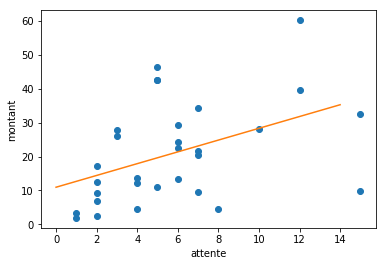

In [162]:
plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Régression linéaire sans les outliers :

attente      3.030823
intercept    5.411480
dtype: float64


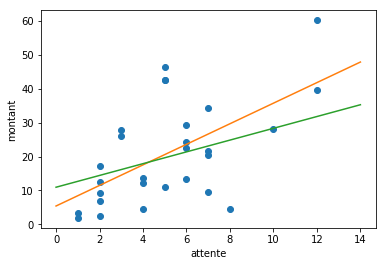

In [163]:
courses = courses.loc[courses['attente'] < 15, :]

Y = courses['montant']
X = courses[['attente']]
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a_new,b_new = result.params['attente'],result.params['intercept']

print(result.params)

plt.plot(courses.attente,courses.montant, "o")
plt.plot(np.arange(15),[a_new*x+b_new for x in np.arange(15)])
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plt.xlabel("attente")
plt.ylabel("montant")
plt.show()

Ce code effectue une régression linéaire entre la variable "attente" et "montant" à partir des données contenues dans le DataFrame `courses`. Voici une explication détaillée ligne par ligne :

1. **Filtrage des données** :
   ```python
   courses = courses.loc[courses['attente'] < 15, :]
   ```
   Cette ligne filtre le DataFrame `courses` pour inclure uniquement les lignes où la variable "attente" est inférieure à 15 jours.

2. **Définition des variables dépendante et indépendante** :
   ```python
   Y = courses['montant']
   X = courses[['attente']]
   X['intercept'] = 1.
   ```
   - `Y` : Variable dépendante, qui est la colonne "montant" des courses.
   - `X` : Variables indépendantes, qui est la colonne "attente" des courses. Elle est ensuite étendue pour inclure une colonne "intercept" qui contient toutes des 1. Cette colonne est nécessaire pour estimer l'ordonnée à l'origine dans le modèle de régression linéaire.

3. **Régression linéaire avec statsmodels** :
   ```python
   result = sm.OLS(Y, X).fit()
   ```
   - `sm.OLS(Y, X)` : Crée un modèle de régression linéaire ordinaire (OLS) où `Y` est la variable dépendante et `X` est la matrice de variables indépendantes.
   - `.fit()` : Estime les coefficients du modèle en utilisant la méthode des moindres carrés ordinaires (OLS).

4. **Extraction des coefficients du modèle** :
   ```python
   a_new, b_new = result.params['attente'], result.params['intercept']
   ```
   - `result.params` : Contient les coefficients estimés du modèle. `'attente'` et `'intercept'` sont les noms des colonnes dans `X` pour lesquelles les coefficients sont estimés.

5. **Affichage du résultat de la régression** :
   ```python
   plt.plot(courses.attente, courses.montant, "o")
   ```
   - Trace un nuage de points (diagramme de dispersion) où chaque point représente une observation de "attente" (axe des x) et "montant" (axe des y) dans le DataFrame `courses`.

6. **Tracé des modèles de régression** :
   ```python
   plt.plot(np.arange(15), [a_new * x + b_new for x in np.arange(15)])
   plt.plot(np.arange(15), [a * x + b for x in np.arange(15)])
   ```
   - Trace deux lignes correspondant aux modèles de régression :
     - `a_new * x + b_new` : Modèle de régression linéaire basé sur les coefficients estimés à partir des données filtrées.
     - `a * x + b` : Modèle de régression linéaire basé sur les coefficients initiaux, non mis à jour par le filtrage.

7. **Personnalisation de l'affichage** :
   ```python
   plt.xlabel("attente")
   plt.ylabel("montant")
   plt.show()
   ```
   - Ajoute des étiquettes aux axes x et y du graphique, puis affiche le graphique.

En résumé, ce code utilise la régression linéaire pour modéliser la relation entre la variable "attente" et "montant" des courses. Il filtre les données pour exclure les observations où "attente" est supérieur ou égal à 15 jours, puis trace un diagramme de dispersion des données observées avec deux modèles de régression linéaire superposés pour illustrer la relation entre ces variables.

En début de chapitre, nous avons fait des suppositions. En gros, on a supposé qu'il existait un lien linéaire entre attente et montant, c'est-à-dire un lien de type $y=ax+b$
 . Mais cette supposition est-elle réaliste ? Après avoir appliqué un modèle, il faut toujours analyser sa qualité.

Imaginons que j'aie effacé par erreur le montant d'une opération bancaire de catégorie COURSES.

Je pourrais combler cette valeur manquante par la moyenne des montants des opérations. C'est la solution la plus basique qui soit, et vous vous imaginez qu'elle n'est pas très bonne ! Elle n'est pas très bonne car autour de la moyenne, les valeurs des montants varient, parfois de beaucoup.

Je peux alors faire mieux : je peux regarder la valeur de la variable attente de cette opération. Avec le modèle de régression linéaire que j'ai construit, je peux estimer la valeur du montant (grâce à l'équation y = ax+b). Vous vous en doutez, cette estimation sera meilleure que la précédente. En effet, quand nous avons cherché à minimiser l'erreur de modèle, nous avons en fait cherché à minimiser les variations des valeurs de montant autour de la droite de régression.

Les variations autour de la moyenne sont donc plus grandes que les variations autour de la droite de régression.

Si on avait trouvé un modèle parfait, alors il n'y aurait plus d'erreur, et donc plus de variations entre les valeurs prédites et les valeurs réelles. Dans ce cas, on dirait que le modèle a réussi à expliquer la totalité des variations. Les variations autour de la moyenne sont mesurées par la variance. Un modèle parfait aurait expliqué 100 % de la variation.

Ce pourcentage est calculé grâce à la formule de décomposition de la variance (analysis of variance, en anglais : ANOVA).

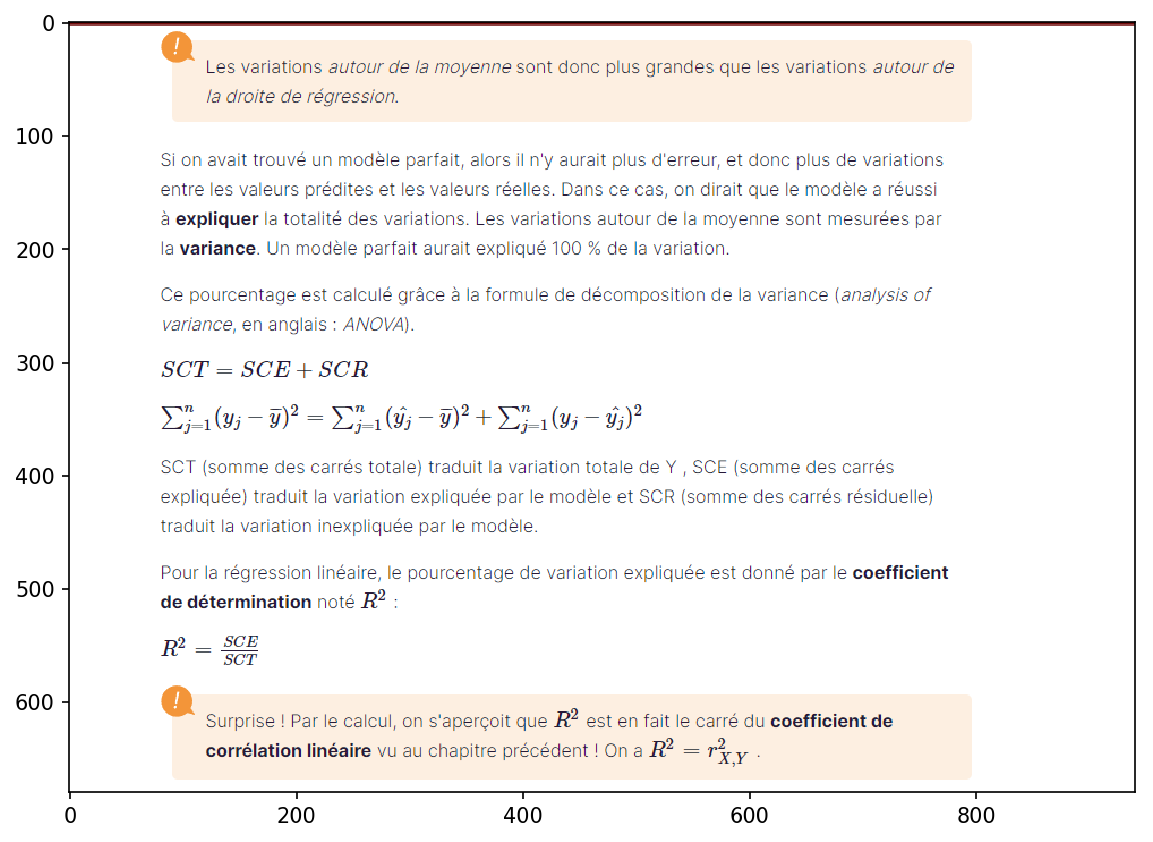

In [164]:
img17=mpimg.imread('corr.png')
height, width, _ = img17.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img17)
plt.show()

Ces résultats signifient que je ne consomme que 1.74 € par jour, cela me paraît peu ! De plus, 10.94 € de stock à chaque course, c'est énorme !

C'est vrai... à y regarder de plus près, on voit qu'il a 2 points qui "sortent du lot", on les appelle des outliers. En connaissant mes propres habitudes de consommation, je sais que je ne fais jamais les courses à plus de 15 jours d'intervalle. Ces deux points, pour lesquels attente = 15 jours, correspondent en fait à des retours de vacances (durant lesquelles je n'ai pas fait de courses). Comme je ne souhaite pas que ceux-ci interfèrent dans mon calcul, je les écarte.

Une fois écartés, j'obtiens ces nouvelles estimations :

  a^=3.03

 b^=5.41

Les 2 droites de régression (une pour chaque estimation) d'équation y=ax+b
Les 2 droites de régression (une pour chaque estimation) d'équation y=ax+b
Ce résultat est bien différent du précédent. Avec seulement 2 individus écartés, les résultats changent beaucoup. On dit donc que le traitement statistique que nous venons d'appliquer (la régression linéaire avec estimation par la méthode des moindres carrés) est peu robuste aux outliers.

 C'est d'ailleurs le cas également du coefficient de corrélation linéaire rX,Y
 du chapitre précédent : il est peu robuste. En fait, ce n'est pas un hasard s'il l'est lui aussi. En effet, le coefficient de corrélation linéaire et la régression linéaire sont très liés ! Pour découvrir pourquoi, continuez votre lecture par la section ci-dessous ! ;)

### ANOVA

#### BDéfinissez quelles questions se poser

En fonction des couples de variables que nous utiliserons, la méthode d'analyse sera la même, mais nous pourrons répondre à différentes questions intéressantes :

Les dépenses que vous faites le week-end sont-elles plus grosses qu'en semaine ? (Variables montant et weekend).

Les dépenses que vous faites en début de mois sont-elles plus grosses qu'en fin de mois ? (montant et quart_mois).

Le montant d'une opération est-il différent d'une catégorie de dépense à l'autre ? (montant et categ).

Vos paiements en carte bancaire sont-ils toujours petits, et vos virements importants ? (type et montant).

Le solde de votre compte est-il plus petit en fin de mois qu'en début de mois ? (solde_avt_operation et quart_mois).

Voici le code qui permet de représenter une variable quantitative et une variable qualitative. Tout d'abord, créez le sous-échantillon sur lequel vous souhaitez travailler en adaptant ce code, notamment les variables X et Y selon la question que vous aurez choisie parmi celles ci-dessus.

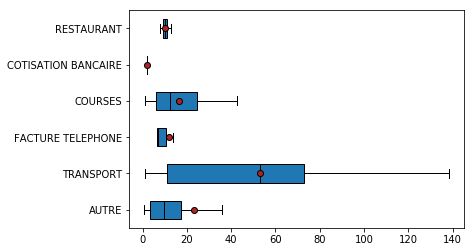

In [166]:
X = "categ" # qualitative
Y = "montant" # quantitative

# On ne garde que les dépenses
sous_echantillon = data.loc[data["montant"] < 0, :].copy()
# On remet les dépenses en positif
sous_echantillon["montant"] = -sous_echantillon["montant"]
# On n'étudie pas les loyers car trop gros:
sous_echantillon = sous_echantillon.loc[sous_echantillon["categ"] != "LOYER", :] 
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Les points rouges au milieu de chaque boîte à moustaches représentent la moyenne des valeurs.

On voit ici que les montants sont très différents d'une catégorie à l'autre. Par exemple, les montants des dépenses de transport sont plus élevés et plus dispersés que ceux des factures téléphoniques. Mais vérifions maintenant cette affirmation par les chiffres, grâce à une modélisation.

Voici à présent le code permettant de calculer $\eta^2$ (eta carré ou eta squared, en anglais). Je vous propose ici de faire le calcul à la main ;) :

In [167]:
X = "categ" # qualitative
Y = "montant" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.0275228003018415

On va aller plus loin en analysant la corrélation entre la variable quart_mois créée précédemment et le montant des achats. En effet, il serait intéressant de déterminer si certains jours sont plus "propices" à la dépense que d'autres et pourquoi pas, essayer de dégager les raisons !

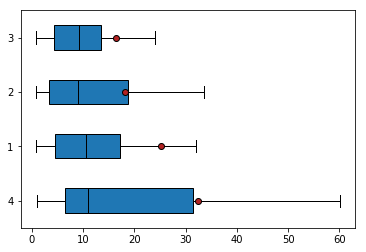

0.011398038009310869

In [168]:
X = "quart_mois" # qualitative
Y = "montant" # quantitative

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

eta_squared(sous_echantillon[X],sous_echantillon[Y])

Revenons sur la démarche que nous avons eue au chapitre précédent. Pour voir s'il existait une corrélation (linéaire) entre 2 variables, nous avons supposé que cette corrélation existait, puis nous avons appliqué un modèle sur cette supposition. Nous avons ensuite estimé les paramètres a
 et b
 . Enfin, nous avons vérifié la supposition de départ en évaluant la qualité du modèle. Si ce modèle est de bonne qualité, alors c'est qu'il y a une forte corrélation entre X et Y. En bonus, nous avons profité de la formule de la régression linéaire Y=aX+b+ϵ
 pour interpréter a
 comme la somme d'argent consommée en 1 jour, et b
 comme la somme d'argent de vos stocks et produits non consommables.

Ici, nous utiliserons la même démarche.

On pourrait reprendre la formule de la régression linéaire ci-dessus, sauf qu'elle implique de multiplier X
 par a
 . Or cette fois-ci, X est qualitative, comme notre variable categ. Multiplier une variable qualitative par un nombre n'a aucun sens (ex. : "TRANSPORT" * 3 n'a aucun sens !).

Nous allons faire autrement. Nous allons donc faire la supposition que vos opérations bancaires ont un montant de référence en commun appelé μ
 . Ensuite, on considère que le montant de l'opération s'ajuste en fonction de la catégorie i
 de dépense (loyer, transport, courses, etc.). Si une catégorie a des montants qui sont en général inférieurs à μ
 , alors cet ajustement αi
 sera négatif. Dans le cas contraire, il sera positif. On ajoute la contrainte que la somme de tous les αi
 soit égale à 0.

Par exemple, un loyer est en général assez onéreux : son αloyer
 sera donc positif.

Comme au chapitre précédent, tu commettras toujours une erreur de prédiction, car au sein d'une même catégorie, les montants ne sont pas tous les mêmes !

C'est bien vrai. Comme pour le modèle de la régression linéaire, on aura ici aussi un terme d'erreur ϵ
 :

Y=αi+μ+ϵ

Comme dans le chapitre précédent, on peut laisser l'ordinateur estimer tous les αi
 et μ
 , sauf qu'ici, les calculs mathématiques qui nous disent quels sont les αi
 et μ
 qui minimisent l'erreur ϵ
 donnent des résultats très intuitifs :

Le montant de référence μ
 est estimé par la moyenne de tous les montants. On appelle cette estimation μ^

Pour une catégorie i
 , αi
 est estimé en calculant l'écart entre μ^
 et la moyenne yi¯¯¯¯
 des montants de la catégorie i
 , c'est-à-dire : αi^=yi¯¯¯¯−μ^

Ce modèle est très utilisé en statistiques inférentielles, et est appelé analyse de la variance, en anglais ANalysis Of VAriance (ANOVA).

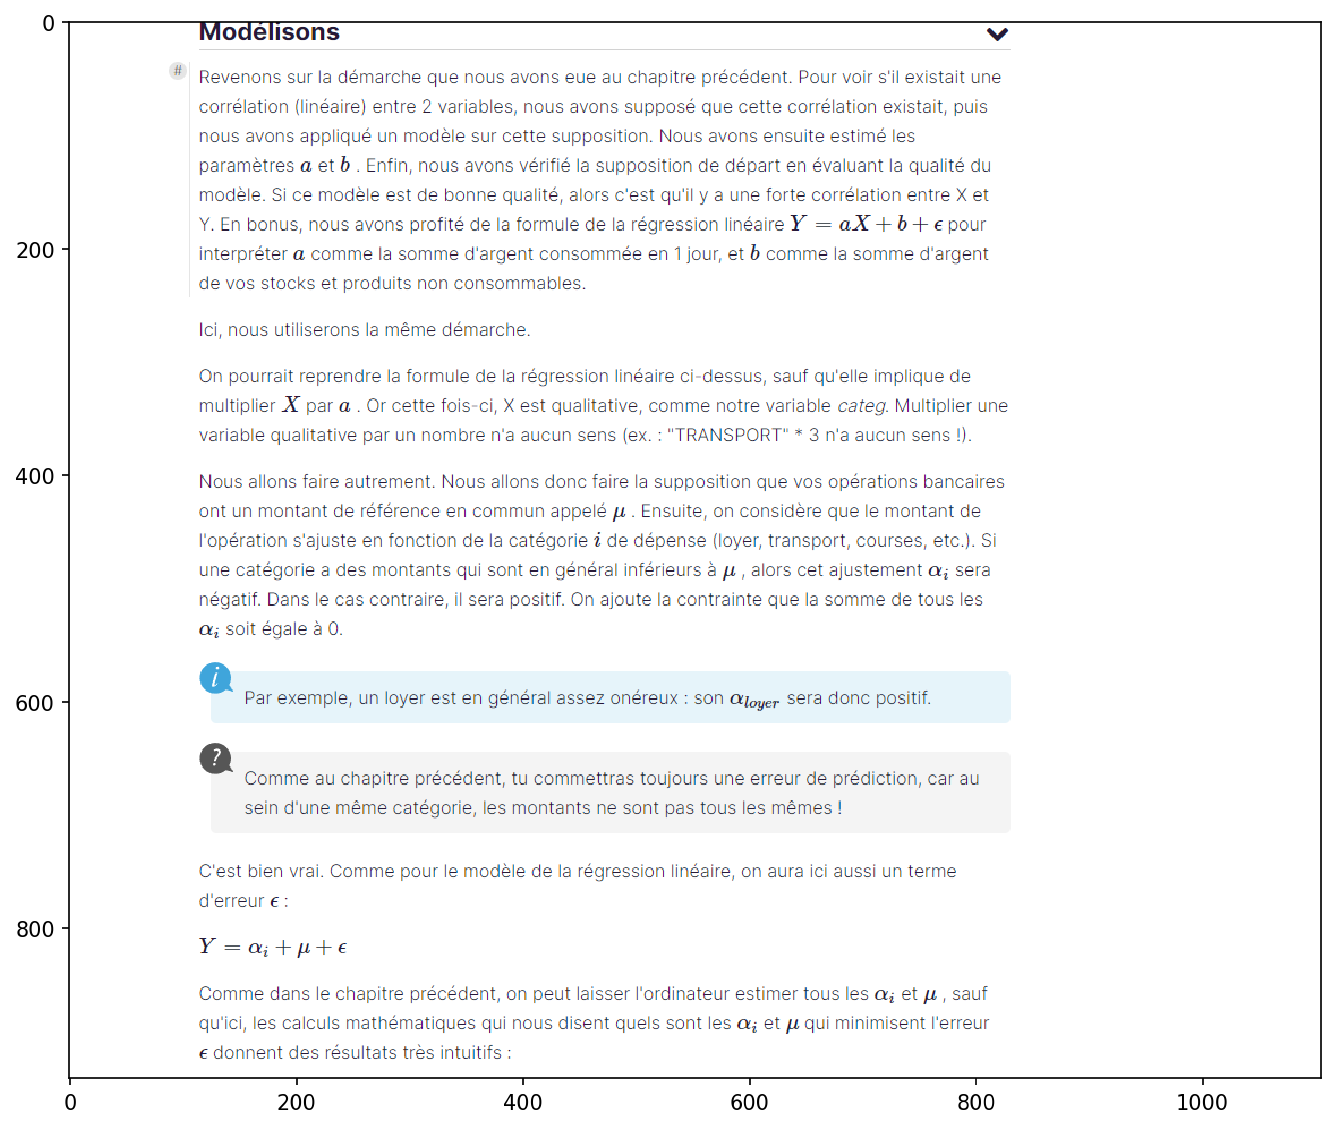

In [169]:
img18=mpimg.imread('ano1.png')
height, width, _ = img18.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img18)
plt.show()

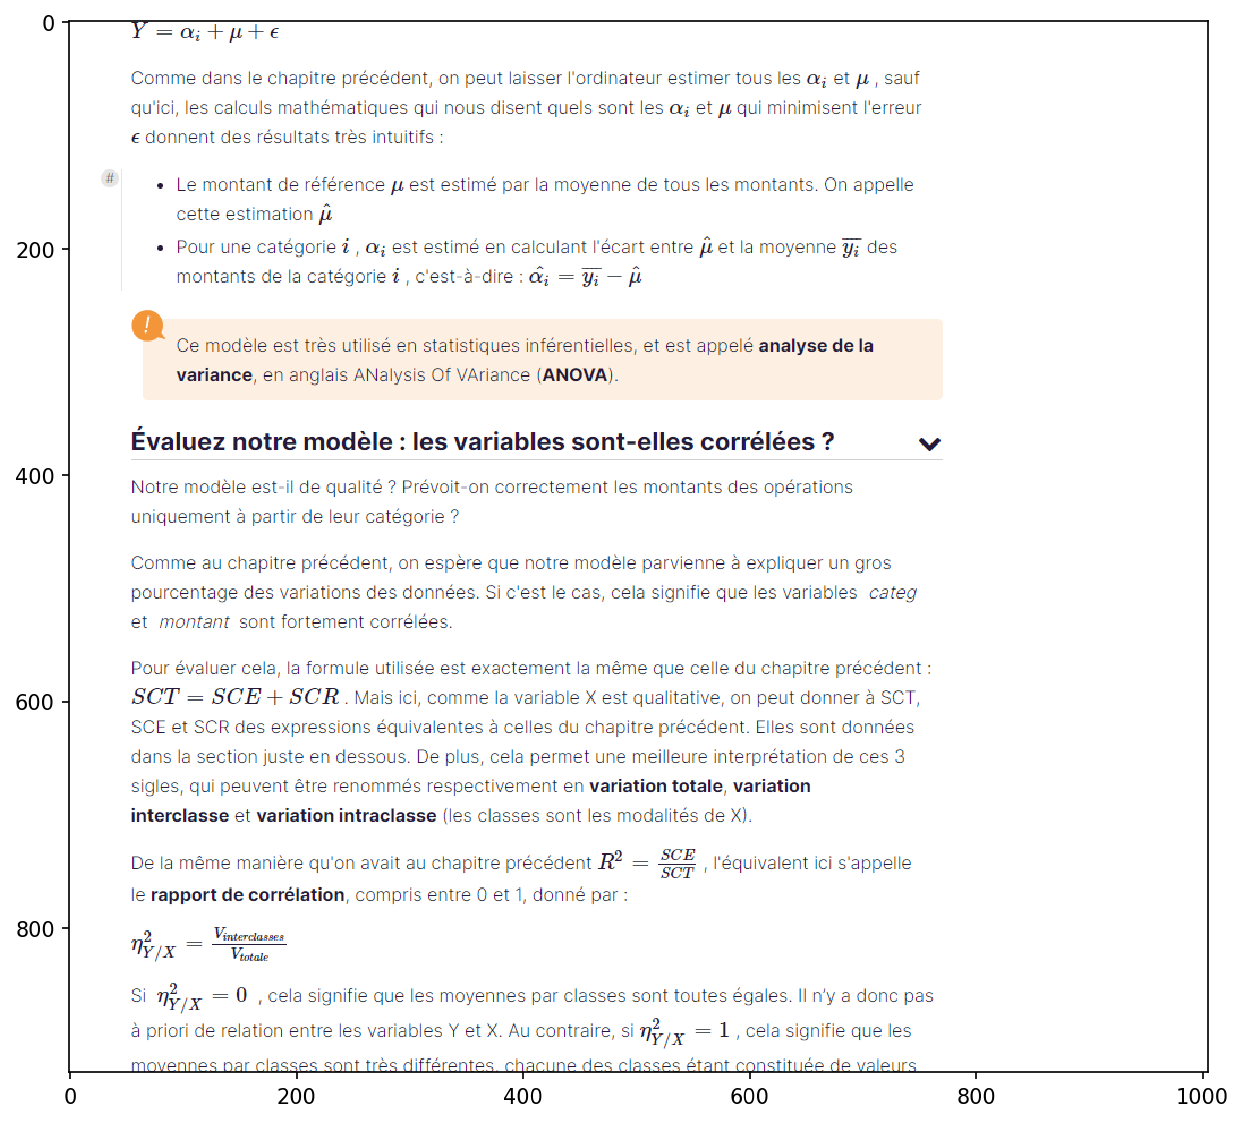

In [170]:
img19=mpimg.imread('ano2.png')
height, width, _ = img19.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img19)
plt.show()

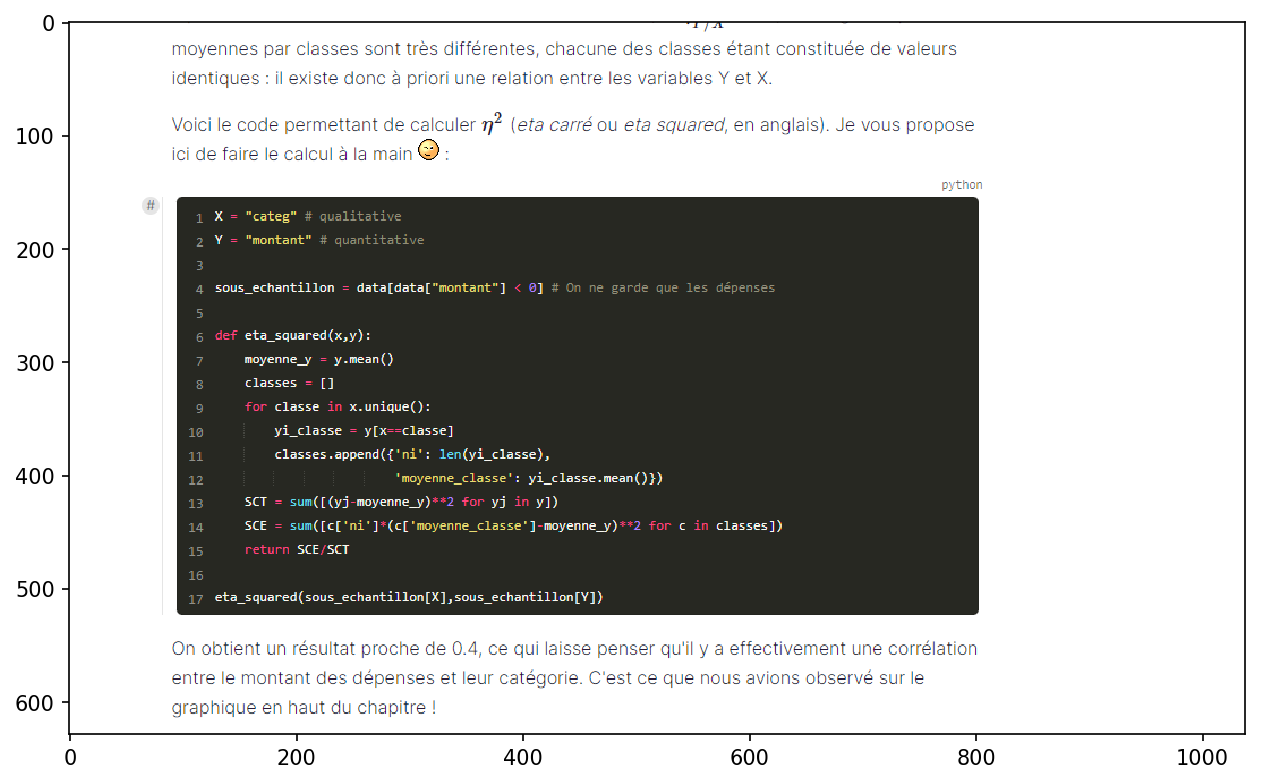

In [171]:
img20=mpimg.imread('ano3.png')
height, width, _ = img20.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img20)
plt.show()

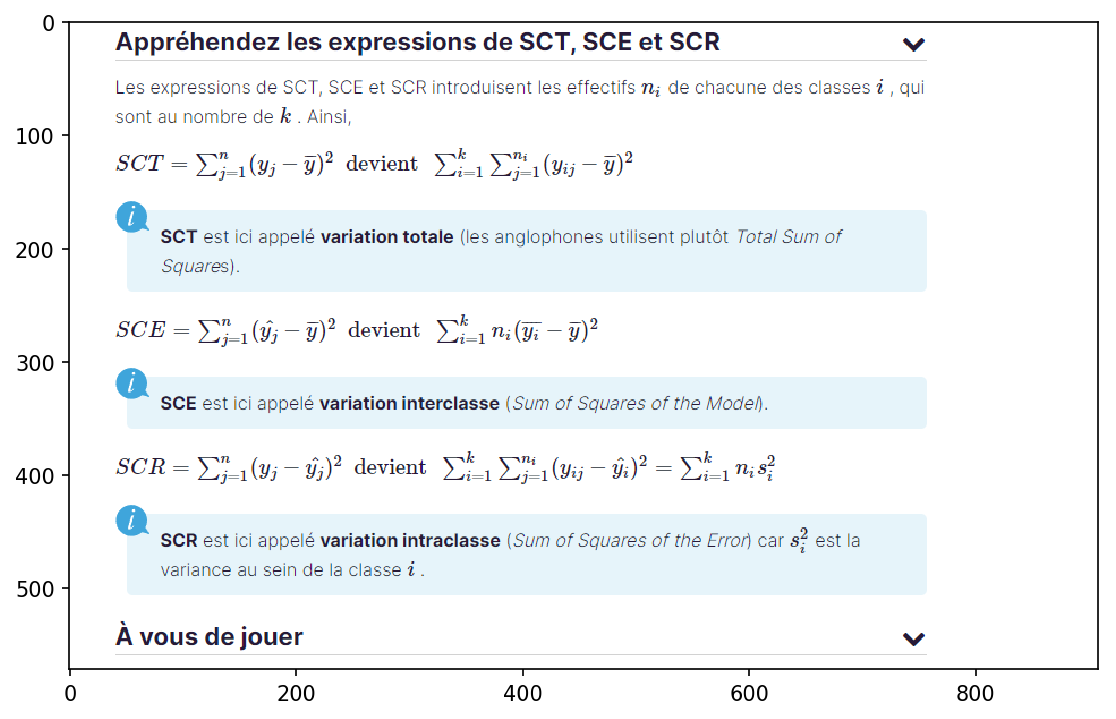

In [172]:
img21=mpimg.imread('ano4.png')
height, width, _ = img21.shape
fig = plt.figure(figsize=(width / 100, height / 100), dpi=150)
imgplot = plt.imshow(img21)
plt.show()

### Deux var quali avec chi2

La méthode d'analyse sera la même pour répondre à toutes les questions suivantes. La seule chose qui change, ce sont les 2 variables étudiées :

Avez-vous les mêmes catégories de dépenses le week-end et en semaine ? (Variables categ et weekend).

Avez-vous plus d'entrées d'argent en début de mois ou en fin de mois ? (sens et quart_mois).

Vos dépenses sont-elles plus grandes en début de mois qu'en fin de mois ? (tranche_depense et quart_mois).

Le montant d'une opération est-il différent d'une catégorie de dépense à l'autre ? (tranche_depense et categ).

Vos paiements en carte bancaire sont-ils toujours petits, et vos virements importants ? (type et tranche_depense).

Y a-t-il des catégories d'opérations qui arrivent toujours au même moment du mois, comme votre loyer, par exemple ? (categ et quart_mois).

Y a-t-il certaines catégories d'opérations qui s'effectuent toujours selon le même mode de paiement, par exemple par virement bancaire ? (type et categ).

Certaines questions sont identiques à celles du chapitre précédent. Dans ce dernier, on utilisait la variable quantitative montant, mais ici, on utilise la variable agrégée  tranche_depense, qui représente la même grandeur, mais qui est qualitative.

In [173]:
X = "quart_mois"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,AUTRE,COTISATION BANCAIRE,COURSES,FACTURE TELEPHONE,LOYER,RESTAURANT,TRANSPORT,Total
quart_mois,,,,,,,,
1,55.0,7.0,6.0,6.0,NaN,3.0,9.0,86
2,45.0,NaN,11.0,1.0,6.0,7.0,6.0,76
3,60.0,NaN,7.0,NaN,NaN,4.0,4.0,75
4,52.0,NaN,15.0,NaN,NaN,2.0,2.0,71
Total,212.0,7.0,39.0,7.0,6.0,16.0,21.0,308


Adaptez les 2 variables qualitatives que vous souhaitez étudier en  lignes 1 et 2. Le tableau de contingence se calcule grâce à la méthode  pivot_table. Chaque case du tableau de contingence compte un nombre d'individus. Ce comptage se fait grâce à la fonction  len.

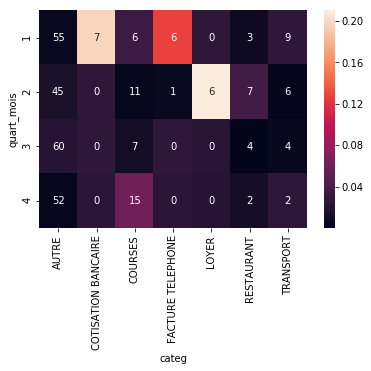

In [174]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()